ESignature:

Electronic signatures aren’t exactly a novelty. They have been around since the American Civil War, during which contracts were signed through Morse. In a modern setting, an e-Sign refers to a unique, digitised, encrypted personal identifier. This is, in essence, different from the ‘wet’ signatures created by hand. The e-Sign is meant to complete transactions, loops, and agreements electronically.

In India, the e-Sign has been granted legal status by amendments to various laws, namely the Information Technology Act, Indian Evidence Act and the Negotiable Instruments Act. Early adopters in the financial sector have started using e-Sign to get customers to sign loan and card applications, and loan agreements.

In [1]:
#importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Uploading and splitting Dataset 
df = pd.read_excel(r'C:\Users\Giridhar\Desktop\E-signing of loan\financial_data 3.xlsx')
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [5]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622973,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [6]:
#missing value analysis
df.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [7]:
df['e_signed'].value_counts()

1    9639
0    8269
Name: e_signed, dtype: int64

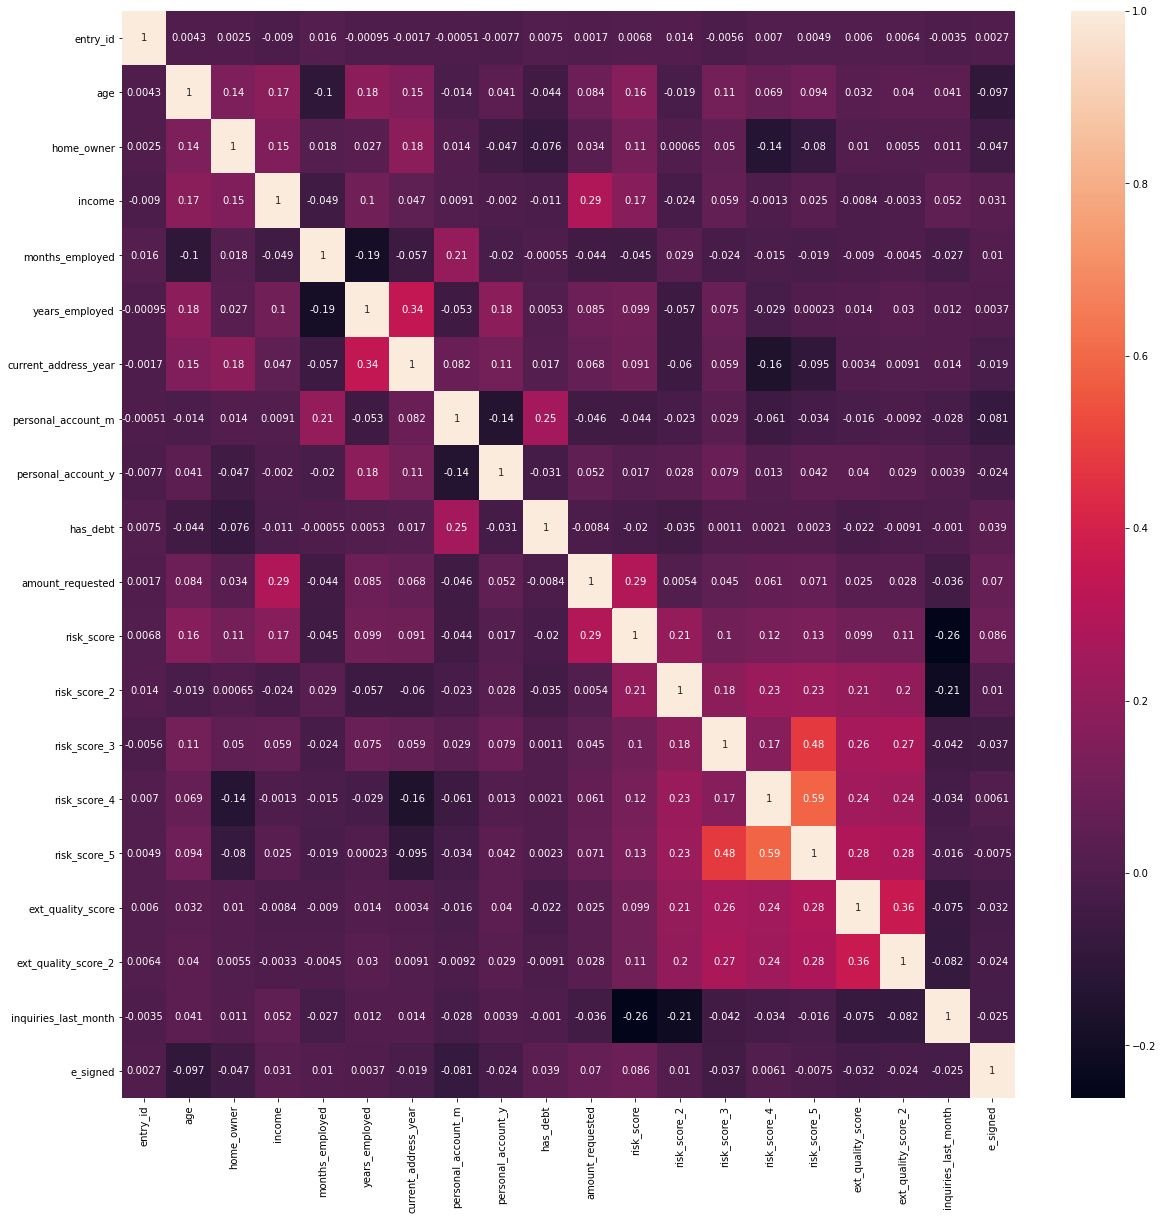

In [8]:
#Correlation Analysis
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

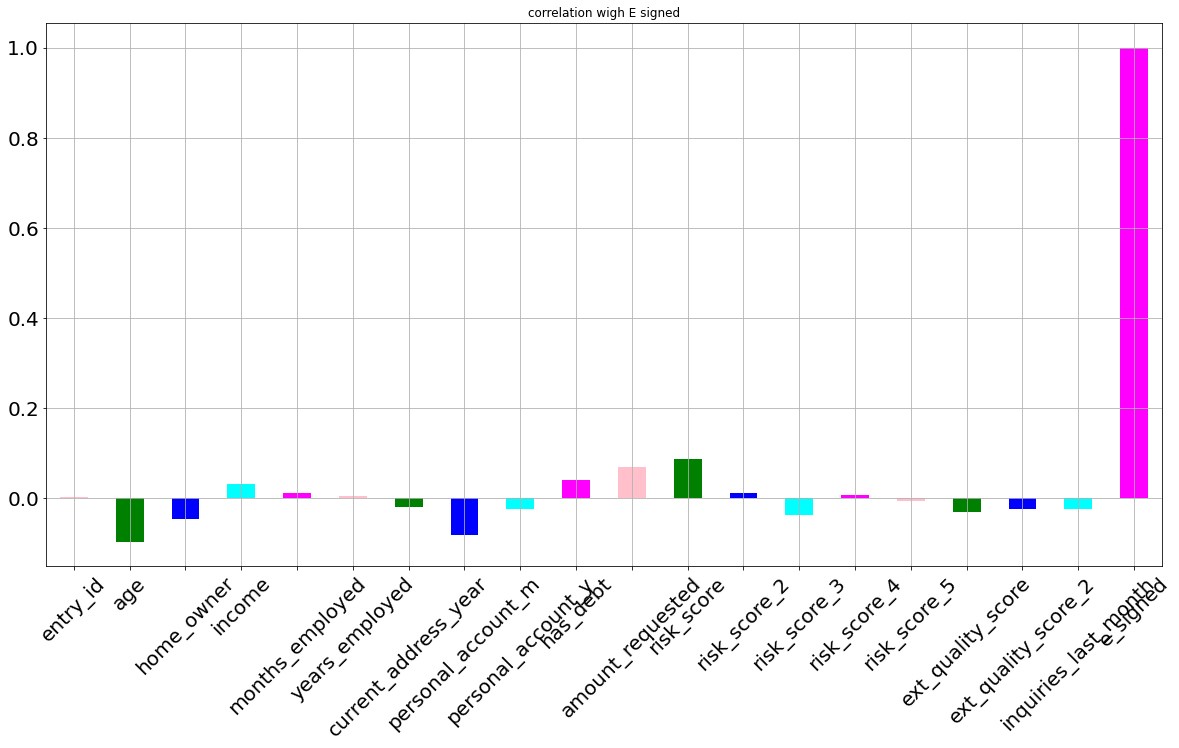

In [9]:
#Correlation of independent variable with dependent variable

df.corrwith(df.e_signed).plot.bar(figsize=(20,10),title="correlation wigh E signed",
                                             fontsize=20,rot=45,grid= True,color=['pink','green',
                                                                                  'blue','cyan','magenta'])

In [10]:
#Initiatizig into new variable and creating the dummy variable for categorical data
data=df
dummy=pd.get_dummies(data["pay_schedule"])
dummy=dummy.drop(labels=["bi-weekly"],axis=1)
data=data.drop(["pay_schedule"],axis=1)
data=pd.concat([data,dummy],axis=1)
data

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,monthly,semi-monthly,weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,0,3245,0,5,3,2,6,1,...,0.928196,0.664112,0.838012,0.727705,0.627705,2,0,1,0,0
17904,9442442,46,0,6525,0,2,1,3,3,1,...,0.970832,0.699241,0.844724,0.774918,0.474918,3,0,0,0,0
17905,9857590,46,0,2685,0,5,1,1,8,1,...,0.918141,0.687981,0.939101,0.472045,0.672045,9,0,0,0,1
17906,8708471,42,0,2515,0,3,5,6,1,1,...,0.885684,0.456448,0.686823,0.406568,0.406568,3,1,0,0,0


In [11]:
data.drop(columns = ["entry_id"])

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,monthly,semi-monthly,weekly
0,40,1,3135,0,3,3,6,2,1,550,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,61,0,3180,0,6,3,2,7,1,600,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,23,0,1540,6,0,0,7,1,1,450,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,40,0,5230,0,6,1,2,7,1,700,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,33,0,3590,0,5,2,2,8,1,1100,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,31,0,3245,0,5,3,2,6,1,700,...,0.928196,0.664112,0.838012,0.727705,0.627705,2,0,1,0,0
17904,46,0,6525,0,2,1,3,3,1,800,...,0.970832,0.699241,0.844724,0.774918,0.474918,3,0,0,0,0
17905,46,0,2685,0,5,1,1,8,1,1200,...,0.918141,0.687981,0.939101,0.472045,0.672045,9,0,0,0,1
17906,42,0,2515,0,3,5,6,1,1,400,...,0.885684,0.456448,0.686823,0.406568,0.406568,3,1,0,0,0


In [12]:
X = data.iloc[:, 0:21].values
Y = data.iloc[:, 21].values

In [13]:
#Transforming the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()

In [14]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.25,
                                                    random_state = 0)

In [15]:
#Fitting and transforming our data
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [16]:
X_train.shape

(13431, 21)

Building ANN without Feature Engineering 

In [17]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()

In [18]:
#Adding the layers in ANN
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))


classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))


classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1344/1344 [==============================] - 1s 482us/step - loss: 0.3642 - accuracy: 0.8871
Epoch 2/100
1344/1344 [==============================] - 1s 470us/step - loss: 0.3299 - accuracy: 0.8874
Epoch 3/100
1344/1344 [==============================] - 1s 480us/step - loss: 0.3287 - accuracy: 0.8874
Epoch 4/100
1344/1344 [==============================] - 1s 453us/step - loss: 0.3277 - accuracy: 0.8874
Epoch 5/100
1344/1344 [==============================] - 1s 452us/step - loss: 0.3268 - accuracy: 0.8874
Epoch 6/100
1344/1344 [==============================] - 1s 482us/step - loss: 0.3264 - accuracy: 0.8874
Epoch 7/100
1344/1344 [==============================] - 1s 574us/step - loss: 0.3258 - accuracy: 0.8874
Epoch 8/100
1344/1344 [==============================] - 1s 514us/step - loss: 0.3259 - accuracy: 0.8874
Epoch 9/100
1344/1344 [==============================] - 1s 467us/step - loss: 0.3257 - accuracy: 0.8874
Epoch 10/100
1344/1344 [==============================]

1344/1344 [==============================] - 1s 448us/step - loss: 0.3147 - accuracy: 0.8900
Epoch 79/100
1344/1344 [==============================] - 1s 463us/step - loss: 0.3147 - accuracy: 0.8895
Epoch 80/100
1344/1344 [==============================] - 1s 493us/step - loss: 0.3149 - accuracy: 0.8903
Epoch 81/100
1344/1344 [==============================] - 1s 532us/step - loss: 0.3145 - accuracy: 0.8898
Epoch 82/100
1344/1344 [==============================] - 1s 477us/step - loss: 0.3143 - accuracy: 0.8893
Epoch 83/100
1344/1344 [==============================] - 1s 467us/step - loss: 0.3146 - accuracy: 0.8899
Epoch 84/100
1344/1344 [==============================] - 1s 464us/step - loss: 0.3147 - accuracy: 0.8886
Epoch 85/100
1344/1344 [==============================] - 1s 467us/step - loss: 0.3148 - accuracy: 0.8900
Epoch 86/100
1344/1344 [==============================] - 1s 474us/step - loss: 0.3145 - accuracy: 0.8905
Epoch 87/100
1344/1344 [==============================] - 1

In [20]:
#Predict functioon the test data using the model
pred=classifier.predict(X_test)
y_pred = (pred > 0.5)

Evaluating ANN

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[3942,   44],
       [ 473,   18]], dtype=int64)

In [22]:
accuracy_score(y_test, y_pred)

0.8845208845208845

Feature Engineering 

In [23]:
#Initializing the Empty List
AGE=[]

for i in range(len(df)):
    if(df["age"][i]<=45):
        AGE.append("ADULT")
        
    else:
        AGE.append("SENIOR")

In [24]:
EMPLOYED=[]
for i in range(len(df)):
    x=df["months_employed"][i]+df["years_employed"][i]*12
    EMPLOYED.append(x)

In [25]:
PA=[]
for i in range(len(df)):
    x=df["personal_account_m"][i]+df["personal_account_y"][i]*12
    PA.append(x)

In [26]:
avg_risk=[]
for i in range(len(df)):
    x=(df["risk_score_2"][i]+df["risk_score_3"][i]+df["risk_score_4"][i]+df["risk_score_5"][i])/4
    avg_risk.append(x)

In [27]:
ext_quality=[]
for i in range(len(df)):
    x=(df["ext_quality_score_2"][i]+df["ext_quality_score"][i])/2
    ext_quality.append(x)

In [28]:
#Converting all lists into DataFrame
AGE=pd.DataFrame(AGE)
EMPLOYED=pd.DataFrame(EMPLOYED)
PA=pd.DataFrame(PA)
avg_risk=pd.DataFrame(avg_risk)
ext_quality=pd.DataFrame(ext_quality)

#Concatng all the features
featured=pd.concat([AGE,EMPLOYED,PA,avg_risk,ext_quality],axis=1)

In [29]:
featured.columns=["AGE","EMPLOYED","PA","RISK","QUALITY"]

In [30]:
featured.head()

,AGE,EMPLOYED,PA,RISK,QUALITY
0,ADULT,36,30,0.661151,0.480918
1,SENIOR,72,86,0.789841,0.680720
2,ADULT,6,19,0.691712,0.531712
3,ADULT,72,86,0.793179,0.692552
4,ADULT,60,98,0.688483,0.744634


In [31]:
#Creating Dummy Variable
dummy1=pd.get_dummies(featured["AGE"])
dummy1.head()

,ADULT,SENIOR
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [32]:
#Dropping the AGE Variable since dummy variable is created
featured=featured.drop(["AGE"],axis=1)

#Concating the data and dummy variable
featured=pd.concat([featured,dummy1],axis=1)
featured.head()

,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,36,30,0.661151,0.480918,1,0
1,72,86,0.789841,0.680720,0,1
2,6,19,0.691712,0.531712,1,0
3,72,86,0.793179,0.692552,1,0
4,60,98,0.688483,0.744634,1,0


In [33]:
df2 = pd.concat([data, featured], axis  = 1)

In [34]:
df2.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,e_signed,monthly,semi-monthly,weekly,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,7629673,40,1,3135,0,3,3,6,2,1,...,1,0,0,0,36,30,0.661151,0.480918,1,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0,0,0,1,72,86,0.789841,0.680720,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0,0,0,1,6,19,0.691712,0.531712,1,0
3,5682812,40,0,5230,0,6,1,2,7,1,...,1,0,0,0,72,86,0.793179,0.692552,1,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0,0,1,0,60,98,0.688483,0.744634,1,0


In [35]:
Y2 = df2.iloc[:, 19].values
Y2

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [36]:
#Dropping the unnecessay data from our dataset
df2=df2.drop(labels=["age","months_employed","years_employed","personal_account_m","personal_account_y","risk_score_2","risk_score_3"
                ,"risk_score_4","risk_score_5","ext_quality_score_2","ext_quality_score","entry_id","e_signed"],axis=1)

In [37]:
df2.head()

,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,monthly,semi-monthly,weekly,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,1,3135,3,1,550,36200,10,0,0,0,36,30,0.661151,0.480918,1,0
1,0,3180,3,1,600,30150,9,0,0,1,72,86,0.789841,0.680720,0,1
2,0,1540,0,1,450,34550,7,0,0,1,6,19,0.691712,0.531712,1,0
3,0,5230,1,1,700,42150,8,0,0,0,72,86,0.793179,0.692552,1,0
4,0,3590,2,1,1100,53850,12,0,1,0,60,98,0.688483,0.744634,1,0


In [38]:
df2.shape

(17908, 16)

Random Forest Model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
scale=StandardScaler()
#Transforming the data
X2=scale.fit_transform(df2)

In [41]:
#from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X2,Y2,test_size=0.25,random_state=0)

In [42]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [43]:
#Initializing the object
model=RandomForestClassifier()

In [44]:
#Fitting the model
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [45]:
#Predictions on test data
pred=model.predict(xtest)

In [46]:
accuracy_score(ytest,pred)

0.6202814384632567

SVM

In [47]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(xtrain, ytrain)

SVC(random_state=0)

In [48]:
# Predicting Test Set
y_pred = classifier.predict(xtest)

In [49]:
#Finding the Accuracy Score
acc = accuracy_score(ytest, y_pred)
acc

0.5887871342416797

ANN with Feature Engineering

In [70]:
classifier2 = Sequential()

In [71]:
#Adding the layers in ANN
classifier2.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))


classifier2.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))


classifier2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [72]:
# Fitting the ANN to the Training set
classifier2.fit(xtrain, ytrain, batch_size = 10, epochs = 100)

Epoch 1/100
1344/1344 [==============================] - 1s 461us/step - loss: 0.6812 - accuracy: 0.5533
Epoch 2/100
1344/1344 [==============================] - 1s 451us/step - loss: 0.6742 - accuracy: 0.5819
Epoch 3/100
1344/1344 [==============================] - 1s 434us/step - loss: 0.6712 - accuracy: 0.5857
Epoch 4/100
1344/1344 [==============================] - 1s 433us/step - loss: 0.6697 - accuracy: 0.5888
Epoch 5/100
1344/1344 [==============================] - 1s 449us/step - loss: 0.6684 - accuracy: 0.5919
Epoch 6/100
1344/1344 [==============================] - 1s 452us/step - loss: 0.6676 - accuracy: 0.5934
Epoch 7/100
1344/1344 [==============================] - 1s 444us/step - loss: 0.6670 - accuracy: 0.5927
Epoch 8/100
1344/1344 [==============================] - 1s 436us/step - loss: 0.6660 - accuracy: 0.5933
Epoch 9/100
1344/1344 [==============================] - 1s 440us/step - loss: 0.6653 - accuracy: 0.5956
Epoch 10/100
1344/1344 [==============================]

1344/1344 [==============================] - 1s 448us/step - loss: 0.6427 - accuracy: 0.6232
Epoch 79/100
1344/1344 [==============================] - 1s 432us/step - loss: 0.6429 - accuracy: 0.6204
Epoch 80/100
1344/1344 [==============================] - 1s 434us/step - loss: 0.6423 - accuracy: 0.6250
Epoch 81/100
1344/1344 [==============================] - 1s 439us/step - loss: 0.6432 - accuracy: 0.6216
Epoch 82/100
1344/1344 [==============================] - 1s 439us/step - loss: 0.6426 - accuracy: 0.6198
Epoch 83/100
1344/1344 [==============================] - 1s 442us/step - loss: 0.6427 - accuracy: 0.6192
Epoch 84/100
1344/1344 [==============================] - 1s 441us/step - loss: 0.6426 - accuracy: 0.6265
Epoch 85/100
1344/1344 [==============================] - 1s 442us/step - loss: 0.6420 - accuracy: 0.6207
Epoch 86/100
1344/1344 [==============================] - 1s 437us/step - loss: 0.6419 - accuracy: 0.6204
Epoch 87/100
1344/1344 [==============================] - 1

In [73]:
#Predict functioon the test data using the model
pred=classifier.predict(xtest)
ypred = (pred > 0.5)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)
cm

array([[ 978, 1102],
       [ 739, 1658]], dtype=int64)

In [75]:
accuracy_score(ytest, ypred)

0.5887871342416797

ANN Evaluation and Tuning

In [89]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [90]:
def build_ann():
    model = Sequential()
    model.add(Dense(units = 9, kernel_initializer = 'uniform',   activation = 'relu', input_dim = 16))
    model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model     

In [91]:
model=KerasClassifier(build_fn=build_ann, batch_size=10, epochs=10)
accuracies=cross_val_score(estimator= model, X=xtrain, y=ytrain, cv=10)

Epoch 1/10
1209/1209 [==============================] - 1s 473us/step - loss: 0.6810 - accuracy: 0.5618
Epoch 2/10
1209/1209 [==============================] - 1s 445us/step - loss: 0.6712 - accuracy: 0.5832
Epoch 3/10
1209/1209 [==============================] - 1s 451us/step - loss: 0.6681 - accuracy: 0.5876
Epoch 4/10
1209/1209 [==============================] - 1s 446us/step - loss: 0.6643 - accuracy: 0.5879
Epoch 5/10
1209/1209 [==============================] - 1s 445us/step - loss: 0.6601 - accuracy: 0.6007
Epoch 6/10
1209/1209 [==============================] - 1s 439us/step - loss: 0.6560 - accuracy: 0.6028
Epoch 7/10
1209/1209 [==============================] - 1s 445us/step - loss: 0.6535 - accuracy: 0.6053
Epoch 8/10
1209/1209 [==============================] - 1s 438us/step - loss: 0.6514 - accuracy: 0.6062
Epoch 9/10
1209/1209 [==============================] - 1s 455us/step - loss: 0.6507 - accuracy: 0.6114
Epoch 10/10
135/135 [==============================] - 0s 369us/

1209/1209 [==============================] - 1s 493us/step - loss: 0.6692 - accuracy: 0.5834
Epoch 4/10
1209/1209 [==============================] - 1s 464us/step - loss: 0.6673 - accuracy: 0.5857
Epoch 5/10
1209/1209 [==============================] - 1s 446us/step - loss: 0.6640 - accuracy: 0.5906
Epoch 6/10
1209/1209 [==============================] - 1s 459us/step - loss: 0.6595 - accuracy: 0.5961
Epoch 7/10
1209/1209 [==============================] - 1s 446us/step - loss: 0.6574 - accuracy: 0.5994
Epoch 8/10
1209/1209 [==============================] - 1s 447us/step - loss: 0.6543 - accuracy: 0.6048
Epoch 9/10
1209/1209 [==============================] - 1s 442us/step - loss: 0.6525 - accuracy: 0.6054
Epoch 10/10
135/135 [==============================] - 0s 465us/step - loss: 0.6580 - accuracy: 0.6054
Epoch 1/10
1209/1209 [==============================] - 1s 444us/step - loss: 0.6813 - accuracy: 0.5615
Epoch 2/10
1209/1209 [==============================] - 1s 439us/step - loss

In [92]:
mean=accuracies.mean()
print(mean)

0.6019653856754303


In [93]:
variance=accuracies.std()
print(variance)

0.007728754976173178


In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
def build_ann(optimizer):
    model = Sequential()
    model.add(Dense(units = 9, kernel_initializer = 'uniform',   activation = 'relu', input_dim = 16))
    model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [99]:
model=KerasClassifier(build_fn=build_ann)
parameters={'batch_size':[25,32],
           'epochs':[100,500],
           'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator= model,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10)
grid_search=grid_search.fit(xtrain, ytrain)

Epoch 1/100
484/484 [==============================] - 0s 536us/step - loss: 0.6841 - accuracy: 0.5499
Epoch 2/100
484/484 [==============================] - 0s 470us/step - loss: 0.6731 - accuracy: 0.5819
Epoch 3/100
484/484 [==============================] - 0s 460us/step - loss: 0.6707 - accuracy: 0.5841
Epoch 4/100
484/484 [==============================] - 0s 512us/step - loss: 0.6691 - accuracy: 0.5871
Epoch 5/100
484/484 [==============================] - 0s 530us/step - loss: 0.6679 - accuracy: 0.5883
Epoch 6/100
484/484 [==============================] - 0s 457us/step - loss: 0.6668 - accuracy: 0.5878
Epoch 7/100
484/484 [==============================] - 0s 474us/step - loss: 0.6658 - accuracy: 0.5882
Epoch 8/100
484/484 [==============================] - 0s 453us/step - loss: 0.6645 - accuracy: 0.5889
Epoch 9/100
484/484 [==============================] - 0s 446us/step - loss: 0.6636 - accuracy: 0.5947
Epoch 10/100
484/484 [==============================] - 0s 452us/step - l

484/484 [==============================] - 0s 455us/step - loss: 0.6343 - accuracy: 0.6234
Epoch 78/100
484/484 [==============================] - 0s 434us/step - loss: 0.6343 - accuracy: 0.6257
Epoch 79/100
484/484 [==============================] - 0s 435us/step - loss: 0.6341 - accuracy: 0.6295
Epoch 80/100
484/484 [==============================] - 0s 468us/step - loss: 0.6340 - accuracy: 0.6251
Epoch 81/100
484/484 [==============================] - 0s 470us/step - loss: 0.6336 - accuracy: 0.6253
Epoch 82/100
484/484 [==============================] - 0s 433us/step - loss: 0.6338 - accuracy: 0.6241
Epoch 83/100
484/484 [==============================] - 0s 441us/step - loss: 0.6335 - accuracy: 0.6241
Epoch 84/100
484/484 [==============================] - 0s 437us/step - loss: 0.6329 - accuracy: 0.6261
Epoch 85/100
484/484 [==============================] - 0s 441us/step - loss: 0.6333 - accuracy: 0.6260
Epoch 86/100
484/484 [==============================] - 0s 443us/step - loss:

484/484 [==============================] - 0s 471us/step - loss: 0.6351 - accuracy: 0.6258
Epoch 51/100
484/484 [==============================] - 0s 517us/step - loss: 0.6351 - accuracy: 0.6270
Epoch 52/100
484/484 [==============================] - 0s 474us/step - loss: 0.6347 - accuracy: 0.6232
Epoch 53/100
484/484 [==============================] - 0s 473us/step - loss: 0.6348 - accuracy: 0.6292
Epoch 54/100
484/484 [==============================] - 0s 513us/step - loss: 0.6341 - accuracy: 0.6288
Epoch 55/100
484/484 [==============================] - 0s 443us/step - loss: 0.6340 - accuracy: 0.6238
Epoch 56/100
484/484 [==============================] - 0s 436us/step - loss: 0.6337 - accuracy: 0.6282
Epoch 57/100
484/484 [==============================] - 0s 452us/step - loss: 0.6340 - accuracy: 0.6286
Epoch 58/100
484/484 [==============================] - 0s 445us/step - loss: 0.6337 - accuracy: 0.6271
Epoch 59/100
484/484 [==============================] - 0s 438us/step - loss:

Epoch 29/100
484/484 [==============================] - 0s 432us/step - loss: 0.6425 - accuracy: 0.6257
Epoch 30/100
484/484 [==============================] - 0s 422us/step - loss: 0.6424 - accuracy: 0.6224
Epoch 31/100
484/484 [==============================] - 0s 433us/step - loss: 0.6417 - accuracy: 0.6282
Epoch 32/100
484/484 [==============================] - 0s 427us/step - loss: 0.6417 - accuracy: 0.6271
Epoch 33/100
484/484 [==============================] - 0s 430us/step - loss: 0.6410 - accuracy: 0.6281
Epoch 34/100
484/484 [==============================] - 0s 427us/step - loss: 0.6409 - accuracy: 0.6278
Epoch 35/100
484/484 [==============================] - 0s 455us/step - loss: 0.6404 - accuracy: 0.6243
Epoch 36/100
484/484 [==============================] - 0s 460us/step - loss: 0.6407 - accuracy: 0.6283
Epoch 37/100
484/484 [==============================] - 0s 460us/step - loss: 0.6400 - accuracy: 0.6251
Epoch 38/100
484/484 [==============================] - 0s 439us

484/484 [==============================] - 0s 429us/step - loss: 0.6535 - accuracy: 0.6068
Epoch 8/100
484/484 [==============================] - 0s 429us/step - loss: 0.6519 - accuracy: 0.6066
Epoch 9/100
484/484 [==============================] - 0s 437us/step - loss: 0.6502 - accuracy: 0.6082
Epoch 10/100
484/484 [==============================] - 0s 428us/step - loss: 0.6496 - accuracy: 0.6090
Epoch 11/100
484/484 [==============================] - 0s 439us/step - loss: 0.6485 - accuracy: 0.6100
Epoch 12/100
484/484 [==============================] - 0s 431us/step - loss: 0.6477 - accuracy: 0.6142
Epoch 13/100
484/484 [==============================] - 0s 457us/step - loss: 0.6472 - accuracy: 0.6116
Epoch 14/100
484/484 [==============================] - 0s 435us/step - loss: 0.6469 - accuracy: 0.6104
Epoch 15/100
484/484 [==============================] - 0s 439us/step - loss: 0.6464 - accuracy: 0.6127
Epoch 16/100
484/484 [==============================] - 0s 436us/step - loss: 0

484/484 [==============================] - 0s 496us/step - loss: 0.6366 - accuracy: 0.6250
Epoch 86/100
484/484 [==============================] - 0s 468us/step - loss: 0.6367 - accuracy: 0.6288
Epoch 87/100
484/484 [==============================] - 0s 478us/step - loss: 0.6359 - accuracy: 0.6284
Epoch 88/100
484/484 [==============================] - 0s 439us/step - loss: 0.6362 - accuracy: 0.6241
Epoch 89/100
484/484 [==============================] - 0s 434us/step - loss: 0.6361 - accuracy: 0.6238
Epoch 90/100
484/484 [==============================] - 0s 492us/step - loss: 0.6356 - accuracy: 0.6289
Epoch 91/100
484/484 [==============================] - 0s 437us/step - loss: 0.6361 - accuracy: 0.6254
Epoch 92/100
484/484 [==============================] - 0s 430us/step - loss: 0.6358 - accuracy: 0.6272
Epoch 93/100
484/484 [==============================] - 0s 579us/step - loss: 0.6359 - accuracy: 0.6293
Epoch 94/100
484/484 [==============================] - 0s 613us/step - loss:

Epoch 64/100
484/484 [==============================] - 0s 633us/step - loss: 0.6379 - accuracy: 0.6244
Epoch 65/100
484/484 [==============================] - 0s 597us/step - loss: 0.6385 - accuracy: 0.6225
Epoch 66/100
484/484 [==============================] - 0s 742us/step - loss: 0.6383 - accuracy: 0.6279
Epoch 67/100
484/484 [==============================] - 0s 550us/step - loss: 0.6382 - accuracy: 0.6229
Epoch 68/100
484/484 [==============================] - 0s 729us/step - loss: 0.6380 - accuracy: 0.6277
Epoch 69/100
484/484 [==============================] - 0s 592us/step - loss: 0.6377 - accuracy: 0.6244
Epoch 70/100
484/484 [==============================] - 0s 549us/step - loss: 0.6378 - accuracy: 0.6250
Epoch 71/100
484/484 [==============================] - 0s 542us/step - loss: 0.6376 - accuracy: 0.6261
Epoch 72/100
484/484 [==============================] - 0s 538us/step - loss: 0.6379 - accuracy: 0.6234
Epoch 73/100
484/484 [==============================] - 0s 530us

484/484 [==============================] - 0s 587us/step - loss: 0.6407 - accuracy: 0.6208
Epoch 43/100
484/484 [==============================] - 0s 581us/step - loss: 0.6402 - accuracy: 0.6181
Epoch 44/100
484/484 [==============================] - 0s 562us/step - loss: 0.6403 - accuracy: 0.6176
Epoch 45/100
484/484 [==============================] - 0s 588us/step - loss: 0.6403 - accuracy: 0.6214
Epoch 46/100
484/484 [==============================] - 0s 744us/step - loss: 0.6405 - accuracy: 0.6190
Epoch 47/100
484/484 [==============================] - 0s 682us/step - loss: 0.6402 - accuracy: 0.6191
Epoch 48/100
484/484 [==============================] - 0s 591us/step - loss: 0.6400 - accuracy: 0.6199
Epoch 49/100
484/484 [==============================] - 0s 568us/step - loss: 0.6401 - accuracy: 0.6191
Epoch 50/100
484/484 [==============================] - 0s 564us/step - loss: 0.6399 - accuracy: 0.6211
Epoch 51/100
484/484 [==============================] - 0s 552us/step - loss:

Epoch 21/100
484/484 [==============================] - 0s 536us/step - loss: 0.6441 - accuracy: 0.6200
Epoch 22/100
484/484 [==============================] - 0s 533us/step - loss: 0.6441 - accuracy: 0.6217
Epoch 23/100
484/484 [==============================] - 0s 533us/step - loss: 0.6439 - accuracy: 0.6204
Epoch 24/100
484/484 [==============================] - 0s 545us/step - loss: 0.6437 - accuracy: 0.6198
Epoch 25/100
484/484 [==============================] - 0s 550us/step - loss: 0.6433 - accuracy: 0.6219
Epoch 26/100
484/484 [==============================] - 0s 571us/step - loss: 0.6431 - accuracy: 0.6245
Epoch 27/100
484/484 [==============================] - 0s 613us/step - loss: 0.6429 - accuracy: 0.6231
Epoch 28/100
484/484 [==============================] - 0s 768us/step - loss: 0.6427 - accuracy: 0.6221
Epoch 29/100
484/484 [==============================] - 0s 691us/step - loss: 0.6426 - accuracy: 0.6204
Epoch 30/100
484/484 [==============================] - 0s 773us

484/484 [==============================] - 0s 572us/step - loss: 0.6366 - accuracy: 0.6271
Epoch 100/100
484/484 [==============================] - 0s 560us/step - loss: 0.6364 - accuracy: 0.6257
Epoch 1/100
484/484 [==============================] - 0s 511us/step - loss: 0.6832 - accuracy: 0.5528
Epoch 2/100
484/484 [==============================] - 0s 540us/step - loss: 0.6731 - accuracy: 0.5832
Epoch 3/100
484/484 [==============================] - 0s 519us/step - loss: 0.6702 - accuracy: 0.5864
Epoch 4/100
484/484 [==============================] - 0s 649us/step - loss: 0.6679 - accuracy: 0.5906
Epoch 5/100
484/484 [==============================] - 0s 593us/step - loss: 0.6655 - accuracy: 0.5901
Epoch 6/100
484/484 [==============================] - 0s 542us/step - loss: 0.6637 - accuracy: 0.5935
Epoch 7/100
484/484 [==============================] - 0s 532us/step - loss: 0.6610 - accuracy: 0.5949
Epoch 8/100
484/484 [==============================] - 0s 557us/step - loss: 0.6577

484/484 [==============================] - 0s 616us/step - loss: 0.6289 - accuracy: 0.6320
Epoch 76/100
484/484 [==============================] - 0s 614us/step - loss: 0.6287 - accuracy: 0.6340
Epoch 77/100
484/484 [==============================] - 0s 581us/step - loss: 0.6290 - accuracy: 0.6318
Epoch 78/100
484/484 [==============================] - 0s 543us/step - loss: 0.6287 - accuracy: 0.6317
Epoch 79/100
484/484 [==============================] - 0s 575us/step - loss: 0.6285 - accuracy: 0.6300
Epoch 80/100
484/484 [==============================] - 0s 540us/step - loss: 0.6283 - accuracy: 0.6315
Epoch 81/100
484/484 [==============================] - 0s 536us/step - loss: 0.6284 - accuracy: 0.6321
Epoch 82/100
484/484 [==============================] - 0s 658us/step - loss: 0.6285 - accuracy: 0.6295
Epoch 83/100
484/484 [==============================] - 0s 593us/step - loss: 0.6287 - accuracy: 0.6316
Epoch 84/100
484/484 [==============================] - 0s 571us/step - loss:

Epoch 54/100
484/484 [==============================] - 0s 605us/step - loss: 0.6394 - accuracy: 0.6216
Epoch 55/100
484/484 [==============================] - 0s 565us/step - loss: 0.6396 - accuracy: 0.6228
Epoch 56/100
484/484 [==============================] - 0s 582us/step - loss: 0.6391 - accuracy: 0.6210
Epoch 57/100
484/484 [==============================] - 0s 734us/step - loss: 0.6384 - accuracy: 0.6256
Epoch 58/100
484/484 [==============================] - 0s 870us/step - loss: 0.6386 - accuracy: 0.6221
Epoch 59/100
484/484 [==============================] - 0s 798us/step - loss: 0.6385 - accuracy: 0.6240
Epoch 60/100
484/484 [==============================] - 0s 723us/step - loss: 0.6381 - accuracy: 0.6245
Epoch 61/100
484/484 [==============================] - 0s 670us/step - loss: 0.6382 - accuracy: 0.6248
Epoch 62/100
484/484 [==============================] - 0s 616us/step - loss: 0.6381 - accuracy: 0.6245
Epoch 63/100
484/484 [==============================] - 0s 547us

484/484 [==============================] - 0s 701us/step - loss: 0.6402 - accuracy: 0.6265
Epoch 31/100
484/484 [==============================] - 0s 802us/step - loss: 0.6402 - accuracy: 0.6272
Epoch 32/100
484/484 [==============================] - 0s 729us/step - loss: 0.6399 - accuracy: 0.6255
Epoch 33/100
484/484 [==============================] - 0s 585us/step - loss: 0.6397 - accuracy: 0.6257
Epoch 34/100
484/484 [==============================] - 0s 606us/step - loss: 0.6387 - accuracy: 0.6275
Epoch 35/100
484/484 [==============================] - 0s 778us/step - loss: 0.6394 - accuracy: 0.6244
Epoch 36/100
484/484 [==============================] - 0s 637us/step - loss: 0.6389 - accuracy: 0.62640s - loss: 0.6461 - accu
Epoch 37/100
484/484 [==============================] - 0s 656us/step - loss: 0.6382 - accuracy: 0.6305
Epoch 38/100
484/484 [==============================] - 0s 618us/step - loss: 0.6381 - accuracy: 0.6277
Epoch 39/100
484/484 [==============================]

484/484 [==============================] - 0s 535us/step - loss: 0.6630 - accuracy: 0.5957
Epoch 9/100
484/484 [==============================] - 0s 532us/step - loss: 0.6622 - accuracy: 0.5977
Epoch 10/100
484/484 [==============================] - 0s 550us/step - loss: 0.6614 - accuracy: 0.5972
Epoch 11/100
484/484 [==============================] - 0s 534us/step - loss: 0.6607 - accuracy: 0.6001
Epoch 12/100
484/484 [==============================] - 0s 537us/step - loss: 0.6598 - accuracy: 0.6007
Epoch 13/100
484/484 [==============================] - 0s 549us/step - loss: 0.6594 - accuracy: 0.5997
Epoch 14/100
484/484 [==============================] - 0s 534us/step - loss: 0.6589 - accuracy: 0.5981
Epoch 15/100
484/484 [==============================] - 0s 589us/step - loss: 0.6583 - accuracy: 0.5992
Epoch 16/100
484/484 [==============================] - 0s 565us/step - loss: 0.6576 - accuracy: 0.6014
Epoch 17/100
484/484 [==============================] - 0s 535us/step - loss: 

484/484 [==============================] - 0s 762us/step - loss: 0.6387 - accuracy: 0.6200
Epoch 87/100
484/484 [==============================] - 0s 686us/step - loss: 0.6383 - accuracy: 0.6193
Epoch 88/100
484/484 [==============================] - 0s 752us/step - loss: 0.6385 - accuracy: 0.6198
Epoch 89/100
484/484 [==============================] - 1s 1ms/step - loss: 0.6378 - accuracy: 0.6212
Epoch 90/100
484/484 [==============================] - 0s 999us/step - loss: 0.6379 - accuracy: 0.6195
Epoch 91/100
484/484 [==============================] - 0s 634us/step - loss: 0.6379 - accuracy: 0.6198
Epoch 92/100
484/484 [==============================] - 0s 728us/step - loss: 0.6376 - accuracy: 0.6193
Epoch 93/100
484/484 [==============================] - 0s 660us/step - loss: 0.6372 - accuracy: 0.6225
Epoch 94/100
484/484 [==============================] - 0s 741us/step - loss: 0.6376 - accuracy: 0.6198
Epoch 95/100
484/484 [==============================] - 0s 560us/step - loss: 0

484/484 [==============================] - 0s 566us/step - loss: 0.6344 - accuracy: 0.6246
Epoch 66/100
484/484 [==============================] - 0s 521us/step - loss: 0.6342 - accuracy: 0.6242
Epoch 67/100
484/484 [==============================] - 0s 519us/step - loss: 0.6341 - accuracy: 0.6232
Epoch 68/100
484/484 [==============================] - 0s 553us/step - loss: 0.6338 - accuracy: 0.6252
Epoch 69/100
484/484 [==============================] - 0s 530us/step - loss: 0.6338 - accuracy: 0.6263
Epoch 70/100
484/484 [==============================] - 0s 529us/step - loss: 0.6337 - accuracy: 0.6235
Epoch 71/100
484/484 [==============================] - 0s 537us/step - loss: 0.6334 - accuracy: 0.6291
Epoch 72/100
484/484 [==============================] - 0s 551us/step - loss: 0.6333 - accuracy: 0.6253
Epoch 73/100
484/484 [==============================] - 0s 544us/step - loss: 0.6335 - accuracy: 0.6254
Epoch 74/100
484/484 [==============================] - 0s 600us/step - loss:

Epoch 44/100
484/484 [==============================] - 0s 532us/step - loss: 0.6358 - accuracy: 0.6215
Epoch 45/100
484/484 [==============================] - 0s 534us/step - loss: 0.6353 - accuracy: 0.6205
Epoch 46/100
484/484 [==============================] - 0s 533us/step - loss: 0.6353 - accuracy: 0.6257
Epoch 47/100
484/484 [==============================] - 0s 535us/step - loss: 0.6349 - accuracy: 0.6273
Epoch 48/100
484/484 [==============================] - 0s 536us/step - loss: 0.6345 - accuracy: 0.6278
Epoch 49/100
484/484 [==============================] - 0s 540us/step - loss: 0.6345 - accuracy: 0.6259
Epoch 50/100
484/484 [==============================] - 0s 540us/step - loss: 0.6341 - accuracy: 0.6234
Epoch 51/100
484/484 [==============================] - 0s 527us/step - loss: 0.6340 - accuracy: 0.6268
Epoch 52/100
484/484 [==============================] - 0s 542us/step - loss: 0.6336 - accuracy: 0.6255
Epoch 53/100
484/484 [==============================] - 0s 613us

484/484 [==============================] - 0s 586us/step - loss: 0.6390 - accuracy: 0.6192
Epoch 23/100
484/484 [==============================] - ETA: 0s - loss: 0.6370 - accuracy: 0.62 - 0s 570us/step - loss: 0.6382 - accuracy: 0.6201
Epoch 24/100
484/484 [==============================] - 0s 567us/step - loss: 0.6384 - accuracy: 0.6209
Epoch 25/100
484/484 [==============================] - 0s 636us/step - loss: 0.6369 - accuracy: 0.6240
Epoch 26/100
484/484 [==============================] - 0s 564us/step - loss: 0.6365 - accuracy: 0.6233
Epoch 27/100
484/484 [==============================] - 0s 645us/step - loss: 0.6367 - accuracy: 0.62130s - loss: 0.6369 - accura
Epoch 28/100
484/484 [==============================] - 0s 649us/step - loss: 0.6364 - accuracy: 0.6238
Epoch 29/100
484/484 [==============================] - 0s 575us/step - loss: 0.6362 - accuracy: 0.6248
Epoch 30/100
484/484 [==============================] - 0s 549us/step - loss: 0.6356 - accuracy: 0.6224
Epoch 31/

484/484 [==============================] - 0s 558us/step - loss: 0.6265 - accuracy: 0.6311
Epoch 1/100
484/484 [==============================] - 0s 495us/step - loss: 0.6846 - accuracy: 0.5395
Epoch 2/100
484/484 [==============================] - 0s 531us/step - loss: 0.6755 - accuracy: 0.5750
Epoch 3/100
484/484 [==============================] - 0s 554us/step - loss: 0.6729 - accuracy: 0.5886
Epoch 4/100
484/484 [==============================] - 0s 560us/step - loss: 0.6715 - accuracy: 0.5869
Epoch 5/100
484/484 [==============================] - 0s 546us/step - loss: 0.6701 - accuracy: 0.5892
Epoch 6/100
484/484 [==============================] - 0s 545us/step - loss: 0.6691 - accuracy: 0.5900
Epoch 7/100
484/484 [==============================] - 0s 554us/step - loss: 0.6682 - accuracy: 0.5953
Epoch 8/100
484/484 [==============================] - 0s 575us/step - loss: 0.6671 - accuracy: 0.5932
Epoch 9/100
484/484 [==============================] - 0s 552us/step - loss: 0.6661 -

484/484 [==============================] - 0s 549us/step - loss: 0.6410 - accuracy: 0.6161
Epoch 79/100
484/484 [==============================] - 0s 547us/step - loss: 0.6415 - accuracy: 0.6171
Epoch 80/100
484/484 [==============================] - 0s 549us/step - loss: 0.6414 - accuracy: 0.6160
Epoch 81/100
484/484 [==============================] - 0s 620us/step - loss: 0.6406 - accuracy: 0.6188
Epoch 82/100
484/484 [==============================] - 0s 552us/step - loss: 0.6412 - accuracy: 0.6167
Epoch 83/100
484/484 [==============================] - 0s 552us/step - loss: 0.6408 - accuracy: 0.6179
Epoch 84/100
484/484 [==============================] - 0s 540us/step - loss: 0.6407 - accuracy: 0.6192
Epoch 85/100
484/484 [==============================] - 0s 551us/step - loss: 0.6405 - accuracy: 0.6205
Epoch 86/100
484/484 [==============================] - 0s 549us/step - loss: 0.6408 - accuracy: 0.6173
Epoch 87/100
484/484 [==============================] - 0s 546us/step - loss:

Epoch 57/100
484/484 [==============================] - 0s 575us/step - loss: 0.6364 - accuracy: 0.6279
Epoch 58/100
484/484 [==============================] - 0s 579us/step - loss: 0.6361 - accuracy: 0.6290
Epoch 59/100
484/484 [==============================] - 0s 565us/step - loss: 0.6361 - accuracy: 0.6299
Epoch 60/100
484/484 [==============================] - 0s 570us/step - loss: 0.6359 - accuracy: 0.6294
Epoch 61/100
484/484 [==============================] - 0s 582us/step - loss: 0.6360 - accuracy: 0.6284
Epoch 62/100
484/484 [==============================] - 0s 608us/step - loss: 0.6362 - accuracy: 0.6309
Epoch 63/100
484/484 [==============================] - 0s 558us/step - loss: 0.6364 - accuracy: 0.6297
Epoch 64/100
484/484 [==============================] - 0s 626us/step - loss: 0.6353 - accuracy: 0.6290
Epoch 65/100
484/484 [==============================] - 0s 880us/step - loss: 0.6354 - accuracy: 0.6305
Epoch 66/100
484/484 [==============================] - 1s 1ms/s

484/484 [==============================] - 0s 586us/step - loss: 0.6403 - accuracy: 0.6281
Epoch 36/100
484/484 [==============================] - 0s 572us/step - loss: 0.6407 - accuracy: 0.6247
Epoch 37/100
484/484 [==============================] - 0s 569us/step - loss: 0.6403 - accuracy: 0.6285
Epoch 38/100
484/484 [==============================] - 0s 567us/step - loss: 0.6401 - accuracy: 0.6270
Epoch 39/100
484/484 [==============================] - 0s 559us/step - loss: 0.6396 - accuracy: 0.6269
Epoch 40/100
484/484 [==============================] - 0s 556us/step - loss: 0.6398 - accuracy: 0.6272
Epoch 41/100
484/484 [==============================] - 0s 585us/step - loss: 0.6397 - accuracy: 0.6278
Epoch 42/100
484/484 [==============================] - 0s 594us/step - loss: 0.6396 - accuracy: 0.6269
Epoch 43/100
484/484 [==============================] - 0s 808us/step - loss: 0.6387 - accuracy: 0.6310
Epoch 44/100
484/484 [==============================] - 0s 729us/step - loss:

484/484 [==============================] - 0s 544us/step - loss: 0.6481 - accuracy: 0.6122
Epoch 15/100
484/484 [==============================] - 0s 626us/step - loss: 0.6473 - accuracy: 0.6133
Epoch 16/100
484/484 [==============================] - 0s 558us/step - loss: 0.6465 - accuracy: 0.6139
Epoch 17/100
484/484 [==============================] - 0s 569us/step - loss: 0.6458 - accuracy: 0.6160
Epoch 18/100
484/484 [==============================] - 0s 616us/step - loss: 0.6456 - accuracy: 0.6152
Epoch 19/100
484/484 [==============================] - 0s 626us/step - loss: 0.6450 - accuracy: 0.6195
Epoch 20/100
484/484 [==============================] - 0s 635us/step - loss: 0.6442 - accuracy: 0.6197
Epoch 21/100
484/484 [==============================] - 0s 556us/step - loss: 0.6440 - accuracy: 0.6200
Epoch 22/100
484/484 [==============================] - 0s 548us/step - loss: 0.6436 - accuracy: 0.6200
Epoch 23/100
484/484 [==============================] - 0s 554us/step - loss:

484/484 [==============================] - 0s 563us/step - loss: 0.6374 - accuracy: 0.6254
Epoch 93/100
484/484 [==============================] - 0s 550us/step - loss: 0.6376 - accuracy: 0.6235
Epoch 94/100
484/484 [==============================] - 0s 569us/step - loss: 0.6370 - accuracy: 0.6249
Epoch 95/100
484/484 [==============================] - 0s 685us/step - loss: 0.6373 - accuracy: 0.6260
Epoch 96/100
484/484 [==============================] - 0s 599us/step - loss: 0.6373 - accuracy: 0.6252
Epoch 97/100
484/484 [==============================] - 0s 556us/step - loss: 0.6367 - accuracy: 0.6254
Epoch 98/100
484/484 [==============================] - 0s 554us/step - loss: 0.6368 - accuracy: 0.6209
Epoch 99/100
484/484 [==============================] - 0s 554us/step - loss: 0.6369 - accuracy: 0.6253
Epoch 100/100
484/484 [==============================] - 0s 563us/step - loss: 0.6368 - accuracy: 0.6254
Epoch 1/100
484/484 [==============================] - 0s 501us/step - loss:

484/484 [==============================] - 0s 780us/step - loss: 0.6442 - accuracy: 0.6230
Epoch 71/100
484/484 [==============================] - 0s 758us/step - loss: 0.6440 - accuracy: 0.6243
Epoch 72/100
484/484 [==============================] - 0s 620us/step - loss: 0.6439 - accuracy: 0.6189
Epoch 73/100
484/484 [==============================] - 0s 633us/step - loss: 0.6441 - accuracy: 0.6200
Epoch 74/100
484/484 [==============================] - 0s 567us/step - loss: 0.6444 - accuracy: 0.6219
Epoch 75/100
484/484 [==============================] - 0s 672us/step - loss: 0.6441 - accuracy: 0.6257
Epoch 76/100
484/484 [==============================] - 0s 567us/step - loss: 0.6434 - accuracy: 0.6243
Epoch 77/100
484/484 [==============================] - 0s 548us/step - loss: 0.6441 - accuracy: 0.6208
Epoch 78/100
484/484 [==============================] - 0s 550us/step - loss: 0.6441 - accuracy: 0.6233
Epoch 79/100
484/484 [==============================] - 0s 548us/step - loss:

Epoch 49/100
484/484 [==============================] - 0s 581us/step - loss: 0.6475 - accuracy: 0.6146
Epoch 50/100
484/484 [==============================] - 0s 719us/step - loss: 0.6477 - accuracy: 0.6123
Epoch 51/100
484/484 [==============================] - 0s 567us/step - loss: 0.6476 - accuracy: 0.6118
Epoch 52/100
484/484 [==============================] - 0s 563us/step - loss: 0.6472 - accuracy: 0.6118
Epoch 53/100
484/484 [==============================] - 0s 558us/step - loss: 0.6476 - accuracy: 0.6123
Epoch 54/100
484/484 [==============================] - 0s 554us/step - loss: 0.6476 - accuracy: 0.6125
Epoch 55/100
484/484 [==============================] - 0s 552us/step - loss: 0.6474 - accuracy: 0.6131
Epoch 56/100
484/484 [==============================] - 0s 556us/step - loss: 0.6469 - accuracy: 0.6161
Epoch 57/100
484/484 [==============================] - 0s 552us/step - loss: 0.6469 - accuracy: 0.6128
Epoch 58/100
484/484 [==============================] - 0s 717us

484/484 [==============================] - 0s 587us/step - loss: 0.6411 - accuracy: 0.6212
Epoch 28/500
484/484 [==============================] - 0s 585us/step - loss: 0.6400 - accuracy: 0.6228
Epoch 29/500
484/484 [==============================] - 0s 598us/step - loss: 0.6400 - accuracy: 0.6208
Epoch 30/500
484/484 [==============================] - 0s 577us/step - loss: 0.6399 - accuracy: 0.6212
Epoch 31/500
484/484 [==============================] - 0s 573us/step - loss: 0.6395 - accuracy: 0.6243
Epoch 32/500
484/484 [==============================] - 0s 616us/step - loss: 0.6391 - accuracy: 0.6246
Epoch 33/500
484/484 [==============================] - 0s 569us/step - loss: 0.6388 - accuracy: 0.6246
Epoch 34/500
484/484 [==============================] - 0s 589us/step - loss: 0.6392 - accuracy: 0.6255
Epoch 35/500
484/484 [==============================] - 0s 589us/step - loss: 0.6386 - accuracy: 0.6258
Epoch 36/500
484/484 [==============================] - 0s 583us/step - loss:

484/484 [==============================] - 0s 549us/step - loss: 0.6279 - accuracy: 0.6366
Epoch 106/500
484/484 [==============================] - 0s 550us/step - loss: 0.6282 - accuracy: 0.6384
Epoch 107/500
484/484 [==============================] - 0s 546us/step - loss: 0.6275 - accuracy: 0.6373
Epoch 108/500
484/484 [==============================] - 0s 646us/step - loss: 0.6282 - accuracy: 0.6350
Epoch 109/500
484/484 [==============================] - 0s 692us/step - loss: 0.6278 - accuracy: 0.6368
Epoch 110/500
484/484 [==============================] - 0s 643us/step - loss: 0.6280 - accuracy: 0.6375
Epoch 111/500
484/484 [==============================] - 0s 556us/step - loss: 0.6277 - accuracy: 0.6346
Epoch 112/500
484/484 [==============================] - 0s 554us/step - loss: 0.6273 - accuracy: 0.6384
Epoch 113/500
484/484 [==============================] - 0s 579us/step - loss: 0.6271 - accuracy: 0.6370
Epoch 114/500
484/484 [==============================] - 0s 554us/ste

484/484 [==============================] - 0s 610us/step - loss: 0.6210 - accuracy: 0.6390
Epoch 184/500
484/484 [==============================] - 0s 546us/step - loss: 0.6215 - accuracy: 0.6404
Epoch 185/500
484/484 [==============================] - 0s 614us/step - loss: 0.6211 - accuracy: 0.6400
Epoch 186/500
484/484 [==============================] - 0s 707us/step - loss: 0.6209 - accuracy: 0.6390
Epoch 187/500
484/484 [==============================] - 0s 710us/step - loss: 0.6207 - accuracy: 0.63970s - loss: 0.6215 - accu
Epoch 188/500
484/484 [==============================] - 0s 668us/step - loss: 0.6207 - accuracy: 0.6391
Epoch 189/500
484/484 [==============================] - 0s 604us/step - loss: 0.6210 - accuracy: 0.6414
Epoch 190/500
484/484 [==============================] - 0s 709us/step - loss: 0.6206 - accuracy: 0.6414
Epoch 191/500
484/484 [==============================] - 0s 887us/step - loss: 0.6204 - accuracy: 0.6404
Epoch 192/500
484/484 [======================

484/484 [==============================] - 0s 666us/step - loss: 0.6197 - accuracy: 0.6433
Epoch 261/500
484/484 [==============================] - 0s 748us/step - loss: 0.6192 - accuracy: 0.6435
Epoch 262/500
484/484 [==============================] - 0s 717us/step - loss: 0.6189 - accuracy: 0.6412
Epoch 263/500
484/484 [==============================] - 0s 810us/step - loss: 0.6189 - accuracy: 0.6433
Epoch 264/500
484/484 [==============================] - 0s 659us/step - loss: 0.6191 - accuracy: 0.6410
Epoch 265/500
484/484 [==============================] - 0s 641us/step - loss: 0.6189 - accuracy: 0.64240s - loss: 0.6196 - accuracy: 0.
Epoch 266/500
484/484 [==============================] - 0s 787us/step - loss: 0.6195 - accuracy: 0.6420
Epoch 267/500
484/484 [==============================] - 0s 729us/step - loss: 0.6187 - accuracy: 0.6425
Epoch 268/500
484/484 [==============================] - 0s 591us/step - loss: 0.6195 - accuracy: 0.6434
Epoch 269/500
484/484 [==============

484/484 [==============================] - 0s 616us/step - loss: 0.6185 - accuracy: 0.6445
Epoch 338/500
484/484 [==============================] - 0s 637us/step - loss: 0.6184 - accuracy: 0.6431
Epoch 339/500
484/484 [==============================] - 0s 696us/step - loss: 0.6178 - accuracy: 0.6437
Epoch 340/500
484/484 [==============================] - 0s 697us/step - loss: 0.6186 - accuracy: 0.6398
Epoch 341/500
484/484 [==============================] - 0s 641us/step - loss: 0.6179 - accuracy: 0.6425
Epoch 342/500
484/484 [==============================] - 0s 677us/step - loss: 0.6183 - accuracy: 0.6407
Epoch 343/500
484/484 [==============================] - 0s 645us/step - loss: 0.6183 - accuracy: 0.6416
Epoch 344/500
484/484 [==============================] - 0s 626us/step - loss: 0.6183 - accuracy: 0.6449
Epoch 345/500
484/484 [==============================] - 0s 639us/step - loss: 0.6183 - accuracy: 0.6432
Epoch 346/500
484/484 [==============================] - 0s 661us/ste

484/484 [==============================] - 0s 863us/step - loss: 0.6177 - accuracy: 0.6412
Epoch 416/500
484/484 [==============================] - 0s 1ms/step - loss: 0.6171 - accuracy: 0.6422
Epoch 417/500
484/484 [==============================] - 0s 856us/step - loss: 0.6174 - accuracy: 0.6424
Epoch 418/500
484/484 [==============================] - 0s 791us/step - loss: 0.6176 - accuracy: 0.6448
Epoch 419/500
484/484 [==============================] - 0s 733us/step - loss: 0.6175 - accuracy: 0.6435
Epoch 420/500
484/484 [==============================] - 0s 758us/step - loss: 0.6173 - accuracy: 0.6455
Epoch 421/500
484/484 [==============================] - 0s 797us/step - loss: 0.6176 - accuracy: 0.6419
Epoch 422/500
484/484 [==============================] - 0s 750us/step - loss: 0.6179 - accuracy: 0.6428
Epoch 423/500
484/484 [==============================] - 0s 626us/step - loss: 0.6175 - accuracy: 0.6440
Epoch 424/500
484/484 [==============================] - 0s 600us/step 

484/484 [==============================] - 0s 556us/step - loss: 0.6173 - accuracy: 0.6448
Epoch 493/500
484/484 [==============================] - 0s 560us/step - loss: 0.6172 - accuracy: 0.6456
Epoch 494/500
484/484 [==============================] - 0s 556us/step - loss: 0.6167 - accuracy: 0.6444
Epoch 495/500
484/484 [==============================] - 0s 552us/step - loss: 0.6173 - accuracy: 0.6456
Epoch 496/500
484/484 [==============================] - 0s 552us/step - loss: 0.6171 - accuracy: 0.6442
Epoch 497/500
484/484 [==============================] - 0s 556us/step - loss: 0.6172 - accuracy: 0.6410
Epoch 498/500
484/484 [==============================] - 0s 573us/step - loss: 0.6172 - accuracy: 0.6428
Epoch 499/500
484/484 [==============================] - 0s 565us/step - loss: 0.6168 - accuracy: 0.6435
Epoch 500/500
484/484 [==============================] - 0s 553us/step - loss: 0.6167 - accuracy: 0.6445
Epoch 1/500
484/484 [==============================] - 0s 497us/step 

484/484 [==============================] - 0s 558us/step - loss: 0.6342 - accuracy: 0.6295
Epoch 71/500
484/484 [==============================] - 0s 558us/step - loss: 0.6341 - accuracy: 0.6324
Epoch 72/500
484/484 [==============================] - 0s 556us/step - loss: 0.6340 - accuracy: 0.6339
Epoch 73/500
484/484 [==============================] - 0s 556us/step - loss: 0.6342 - accuracy: 0.6290
Epoch 74/500
484/484 [==============================] - 0s 552us/step - loss: 0.6342 - accuracy: 0.6298
Epoch 75/500
484/484 [==============================] - 0s 558us/step - loss: 0.6340 - accuracy: 0.6298
Epoch 76/500
484/484 [==============================] - 0s 560us/step - loss: 0.6338 - accuracy: 0.6301
Epoch 77/500
484/484 [==============================] - 0s 550us/step - loss: 0.6336 - accuracy: 0.6299
Epoch 78/500
484/484 [==============================] - 0s 554us/step - loss: 0.6337 - accuracy: 0.6316
Epoch 79/500
484/484 [==============================] - 0s 552us/step - loss:

484/484 [==============================] - 0s 547us/step - loss: 0.6297 - accuracy: 0.6335
Epoch 149/500
484/484 [==============================] - 0s 546us/step - loss: 0.6294 - accuracy: 0.6323
Epoch 150/500
484/484 [==============================] - 0s 556us/step - loss: 0.6294 - accuracy: 0.6348
Epoch 151/500
484/484 [==============================] - 0s 552us/step - loss: 0.6294 - accuracy: 0.6334
Epoch 152/500
484/484 [==============================] - 0s 554us/step - loss: 0.6297 - accuracy: 0.6355
Epoch 153/500
484/484 [==============================] - 0s 554us/step - loss: 0.6292 - accuracy: 0.6360
Epoch 154/500
484/484 [==============================] - 0s 548us/step - loss: 0.6294 - accuracy: 0.6353
Epoch 155/500
484/484 [==============================] - 0s 548us/step - loss: 0.6293 - accuracy: 0.6324
Epoch 156/500
484/484 [==============================] - 0s 556us/step - loss: 0.6292 - accuracy: 0.6324
Epoch 157/500
484/484 [==============================] - 0s 554us/ste

484/484 [==============================] - 0s 581us/step - loss: 0.6250 - accuracy: 0.6394
Epoch 226/500
484/484 [==============================] - 0s 588us/step - loss: 0.6253 - accuracy: 0.6382
Epoch 227/500
484/484 [==============================] - 0s 558us/step - loss: 0.6253 - accuracy: 0.6387
Epoch 228/500
484/484 [==============================] - 0s 619us/step - loss: 0.6244 - accuracy: 0.6419
Epoch 229/500
484/484 [==============================] - 0s 618us/step - loss: 0.6251 - accuracy: 0.6386
Epoch 230/500
484/484 [==============================] - 0s 664us/step - loss: 0.6250 - accuracy: 0.6370
Epoch 231/500
484/484 [==============================] - 0s 589us/step - loss: 0.6247 - accuracy: 0.6397
Epoch 232/500
484/484 [==============================] - 0s 591us/step - loss: 0.6249 - accuracy: 0.6381
Epoch 233/500
484/484 [==============================] - 0s 593us/step - loss: 0.6250 - accuracy: 0.6367
Epoch 234/500
484/484 [==============================] - 0s 565us/ste

484/484 [==============================] - 0s 563us/step - loss: 0.6217 - accuracy: 0.6408
Epoch 303/500
484/484 [==============================] - 0s 620us/step - loss: 0.6215 - accuracy: 0.6440
Epoch 304/500
484/484 [==============================] - 0s 569us/step - loss: 0.6214 - accuracy: 0.6430
Epoch 305/500
484/484 [==============================] - 0s 610us/step - loss: 0.6216 - accuracy: 0.6396
Epoch 306/500
484/484 [==============================] - 0s 554us/step - loss: 0.6213 - accuracy: 0.6390
Epoch 307/500
484/484 [==============================] - 0s 565us/step - loss: 0.6214 - accuracy: 0.6406
Epoch 308/500
484/484 [==============================] - 0s 560us/step - loss: 0.6215 - accuracy: 0.6423
Epoch 309/500
484/484 [==============================] - 0s 565us/step - loss: 0.6211 - accuracy: 0.6424
Epoch 310/500
484/484 [==============================] - 0s 550us/step - loss: 0.6211 - accuracy: 0.6427
Epoch 311/500
484/484 [==============================] - 0s 591us/ste

484/484 [==============================] - 0s 715us/step - loss: 0.6193 - accuracy: 0.6429
Epoch 380/500
484/484 [==============================] - 0s 808us/step - loss: 0.6192 - accuracy: 0.6433
Epoch 381/500
484/484 [==============================] - 0s 767us/step - loss: 0.6194 - accuracy: 0.6423
Epoch 382/500
484/484 [==============================] - 0s 791us/step - loss: 0.6188 - accuracy: 0.6449
Epoch 383/500
484/484 [==============================] - 0s 849us/step - loss: 0.6192 - accuracy: 0.6406
Epoch 384/500
484/484 [==============================] - 0s 834us/step - loss: 0.6190 - accuracy: 0.6425
Epoch 385/500
484/484 [==============================] - 0s 768us/step - loss: 0.6188 - accuracy: 0.6436
Epoch 386/500
484/484 [==============================] - 0s 833us/step - loss: 0.6189 - accuracy: 0.6436
Epoch 387/500
484/484 [==============================] - 0s 819us/step - loss: 0.6187 - accuracy: 0.6443
Epoch 388/500
484/484 [==============================] - 0s 828us/ste

484/484 [==============================] - 0s 649us/step - loss: 0.6178 - accuracy: 0.6468
Epoch 457/500
484/484 [==============================] - 0s 723us/step - loss: 0.6176 - accuracy: 0.6445
Epoch 458/500
484/484 [==============================] - 0s 758us/step - loss: 0.6186 - accuracy: 0.6444
Epoch 459/500
484/484 [==============================] - 0s 701us/step - loss: 0.6183 - accuracy: 0.6442
Epoch 460/500
484/484 [==============================] - 0s 587us/step - loss: 0.6182 - accuracy: 0.6438
Epoch 461/500
484/484 [==============================] - 0s 719us/step - loss: 0.6179 - accuracy: 0.6449
Epoch 462/500
484/484 [==============================] - 0s 591us/step - loss: 0.6178 - accuracy: 0.6432
Epoch 463/500
484/484 [==============================] - 0s 775us/step - loss: 0.6183 - accuracy: 0.6448
Epoch 464/500
484/484 [==============================] - 0s 608us/step - loss: 0.6183 - accuracy: 0.6426
Epoch 465/500
484/484 [==============================] - 0s 552us/ste

484/484 [==============================] - 0s 792us/step - loss: 0.6416 - accuracy: 0.6248
Epoch 35/500
484/484 [==============================] - 0s 727us/step - loss: 0.6416 - accuracy: 0.6220
Epoch 36/500
484/484 [==============================] - 0s 769us/step - loss: 0.6410 - accuracy: 0.6222
Epoch 37/500
484/484 [==============================] - 0s 850us/step - loss: 0.6409 - accuracy: 0.6250
Epoch 38/500
484/484 [==============================] - 0s 744us/step - loss: 0.6412 - accuracy: 0.6216
Epoch 39/500
484/484 [==============================] - 0s 674us/step - loss: 0.6413 - accuracy: 0.6238
Epoch 40/500
484/484 [==============================] - 0s 661us/step - loss: 0.6406 - accuracy: 0.6245
Epoch 41/500
484/484 [==============================] - 0s 651us/step - loss: 0.6411 - accuracy: 0.6217
Epoch 42/500
484/484 [==============================] - 0s 657us/step - loss: 0.6403 - accuracy: 0.6257
Epoch 43/500
484/484 [==============================] - 0s 647us/step - loss:

484/484 [==============================] - 0s 669us/step - loss: 0.6296 - accuracy: 0.6369
Epoch 113/500
484/484 [==============================] - 0s 692us/step - loss: 0.6292 - accuracy: 0.6354
Epoch 114/500
484/484 [==============================] - 0s 718us/step - loss: 0.6296 - accuracy: 0.6362
Epoch 115/500
484/484 [==============================] - 0s 709us/step - loss: 0.6291 - accuracy: 0.6370
Epoch 116/500
484/484 [==============================] - 0s 669us/step - loss: 0.6289 - accuracy: 0.6353
Epoch 117/500
484/484 [==============================] - 0s 766us/step - loss: 0.6294 - accuracy: 0.6366
Epoch 118/500
484/484 [==============================] - 0s 670us/step - loss: 0.6293 - accuracy: 0.6349
Epoch 119/500
484/484 [==============================] - 0s 674us/step - loss: 0.6287 - accuracy: 0.6374
Epoch 120/500
484/484 [==============================] - 0s 661us/step - loss: 0.6289 - accuracy: 0.6359
Epoch 121/500
484/484 [==============================] - 0s 690us/ste

484/484 [==============================] - 0s 672us/step - loss: 0.6256 - accuracy: 0.6415
Epoch 191/500
484/484 [==============================] - 0s 694us/step - loss: 0.6261 - accuracy: 0.6435
Epoch 192/500
484/484 [==============================] - 0s 670us/step - loss: 0.6256 - accuracy: 0.6402
Epoch 193/500
484/484 [==============================] - 0s 689us/step - loss: 0.6256 - accuracy: 0.6402
Epoch 194/500
484/484 [==============================] - 0s 666us/step - loss: 0.6259 - accuracy: 0.6392
Epoch 195/500
484/484 [==============================] - 0s 673us/step - loss: 0.6255 - accuracy: 0.6393
Epoch 196/500
484/484 [==============================] - 0s 661us/step - loss: 0.6255 - accuracy: 0.6410
Epoch 197/500
484/484 [==============================] - 0s 641us/step - loss: 0.6255 - accuracy: 0.6415
Epoch 198/500
484/484 [==============================] - 0s 621us/step - loss: 0.6256 - accuracy: 0.6423
Epoch 199/500
484/484 [==============================] - 0s 621us/ste

484/484 [==============================] - 0s 687us/step - loss: 0.6239 - accuracy: 0.6378
Epoch 269/500
484/484 [==============================] - 0s 754us/step - loss: 0.6240 - accuracy: 0.6416
Epoch 270/500
484/484 [==============================] - 0s 752us/step - loss: 0.6243 - accuracy: 0.6404
Epoch 271/500
484/484 [==============================] - 0s 697us/step - loss: 0.6241 - accuracy: 0.6399
Epoch 272/500
484/484 [==============================] - 0s 712us/step - loss: 0.6238 - accuracy: 0.6410
Epoch 273/500
484/484 [==============================] - 0s 678us/step - loss: 0.6242 - accuracy: 0.6397
Epoch 274/500
484/484 [==============================] - 0s 669us/step - loss: 0.6244 - accuracy: 0.6391
Epoch 275/500
484/484 [==============================] - 0s 688us/step - loss: 0.6239 - accuracy: 0.6409
Epoch 276/500
484/484 [==============================] - 0s 652us/step - loss: 0.6236 - accuracy: 0.6420
Epoch 277/500
484/484 [==============================] - 0s 632us/ste

484/484 [==============================] - 0s 729us/step - loss: 0.6224 - accuracy: 0.6407
Epoch 347/500
484/484 [==============================] - 0s 693us/step - loss: 0.6226 - accuracy: 0.6422
Epoch 348/500
484/484 [==============================] - 0s 664us/step - loss: 0.6223 - accuracy: 0.6424
Epoch 349/500
484/484 [==============================] - 0s 664us/step - loss: 0.6224 - accuracy: 0.6440
Epoch 350/500
484/484 [==============================] - 0s 711us/step - loss: 0.6218 - accuracy: 0.6439
Epoch 351/500
484/484 [==============================] - 0s 666us/step - loss: 0.6223 - accuracy: 0.6431
Epoch 352/500
484/484 [==============================] - 0s 719us/step - loss: 0.6223 - accuracy: 0.6435
Epoch 353/500
484/484 [==============================] - 0s 693us/step - loss: 0.6226 - accuracy: 0.6458
Epoch 354/500
484/484 [==============================] - 0s 732us/step - loss: 0.6221 - accuracy: 0.6439
Epoch 355/500
484/484 [==============================] - 0s 808us/ste

484/484 [==============================] - 0s 688us/step - loss: 0.6214 - accuracy: 0.6439
Epoch 425/500
484/484 [==============================] - 0s 647us/step - loss: 0.6215 - accuracy: 0.6435
Epoch 426/500
484/484 [==============================] - 0s 657us/step - loss: 0.6217 - accuracy: 0.6441
Epoch 427/500
484/484 [==============================] - 0s 712us/step - loss: 0.6214 - accuracy: 0.6459
Epoch 428/500
484/484 [==============================] - 0s 691us/step - loss: 0.6212 - accuracy: 0.6447
Epoch 429/500
484/484 [==============================] - 0s 718us/step - loss: 0.6212 - accuracy: 0.6440
Epoch 430/500
484/484 [==============================] - 0s 748us/step - loss: 0.6209 - accuracy: 0.6415
Epoch 431/500
484/484 [==============================] - 0s 694us/step - loss: 0.6216 - accuracy: 0.6453
Epoch 432/500
484/484 [==============================] - 0s 612us/step - loss: 0.6219 - accuracy: 0.6444
Epoch 433/500
484/484 [==============================] - 0s 760us/ste

484/484 [==============================] - 0s 536us/step - loss: 0.6836 - accuracy: 0.5366
Epoch 2/500
484/484 [==============================] - 0s 569us/step - loss: 0.6755 - accuracy: 0.5831
Epoch 3/500
484/484 [==============================] - 0s 569us/step - loss: 0.6705 - accuracy: 0.5864
Epoch 4/500
484/484 [==============================] - 0s 579us/step - loss: 0.6649 - accuracy: 0.5960
Epoch 5/500
484/484 [==============================] - 0s 578us/step - loss: 0.6601 - accuracy: 0.6060
Epoch 6/500
484/484 [==============================] - 0s 573us/step - loss: 0.6564 - accuracy: 0.6061
Epoch 7/500
484/484 [==============================] - 0s 589us/step - loss: 0.6546 - accuracy: 0.6085
Epoch 8/500
484/484 [==============================] - 0s 585us/step - loss: 0.6526 - accuracy: 0.60690s - loss: 0.6523 - accuracy
Epoch 9/500
484/484 [==============================] - 0s 578us/step - loss: 0.6513 - accuracy: 0.6114
Epoch 10/500
484/484 [==============================] - 0

484/484 [==============================] - 0s 671us/step - loss: 0.6380 - accuracy: 0.6231
Epoch 80/500
484/484 [==============================] - 0s 715us/step - loss: 0.6373 - accuracy: 0.6236
Epoch 81/500
484/484 [==============================] - 0s 676us/step - loss: 0.6371 - accuracy: 0.6233
Epoch 82/500
484/484 [==============================] - 0s 674us/step - loss: 0.6375 - accuracy: 0.6224
Epoch 83/500
484/484 [==============================] - 0s 678us/step - loss: 0.6371 - accuracy: 0.6265
Epoch 84/500
484/484 [==============================] - 0s 751us/step - loss: 0.6373 - accuracy: 0.6236
Epoch 85/500
484/484 [==============================] - 0s 684us/step - loss: 0.6371 - accuracy: 0.6253
Epoch 86/500
484/484 [==============================] - 0s 686us/step - loss: 0.6368 - accuracy: 0.6232
Epoch 87/500
484/484 [==============================] - 0s 768us/step - loss: 0.6368 - accuracy: 0.6246
Epoch 88/500
484/484 [==============================] - 0s 835us/step - loss:

Epoch 157/500
484/484 [==============================] - 0s 657us/step - loss: 0.6343 - accuracy: 0.6286
Epoch 158/500
484/484 [==============================] - 0s 747us/step - loss: 0.6341 - accuracy: 0.6287
Epoch 159/500
484/484 [==============================] - 0s 746us/step - loss: 0.6342 - accuracy: 0.6316
Epoch 160/500
484/484 [==============================] - 0s 803us/step - loss: 0.6344 - accuracy: 0.6267
Epoch 161/500
484/484 [==============================] - 0s 811us/step - loss: 0.6344 - accuracy: 0.62860s - loss: 0.6431 - ac
Epoch 162/500
484/484 [==============================] - 0s 742us/step - loss: 0.6344 - accuracy: 0.6270
Epoch 163/500
484/484 [==============================] - 0s 643us/step - loss: 0.6340 - accuracy: 0.6303
Epoch 164/500
484/484 [==============================] - 0s 681us/step - loss: 0.6337 - accuracy: 0.6313
Epoch 165/500
484/484 [==============================] - 0s 717us/step - loss: 0.6337 - accuracy: 0.6276
Epoch 166/500
484/484 [==========

484/484 [==============================] - 0s 683us/step - loss: 0.6325 - accuracy: 0.6321
Epoch 235/500
484/484 [==============================] - 0s 676us/step - loss: 0.6321 - accuracy: 0.6310
Epoch 236/500
484/484 [==============================] - 0s 635us/step - loss: 0.6327 - accuracy: 0.6305
Epoch 237/500
484/484 [==============================] - 0s 605us/step - loss: 0.6326 - accuracy: 0.6323
Epoch 238/500
484/484 [==============================] - 0s 602us/step - loss: 0.6323 - accuracy: 0.6324
Epoch 239/500
484/484 [==============================] - 0s 709us/step - loss: 0.6324 - accuracy: 0.6300
Epoch 240/500
484/484 [==============================] - 0s 931us/step - loss: 0.6324 - accuracy: 0.6303
Epoch 241/500
484/484 [==============================] - 0s 813us/step - loss: 0.6324 - accuracy: 0.6316
Epoch 242/500
484/484 [==============================] - 0s 752us/step - loss: 0.6324 - accuracy: 0.6315
Epoch 243/500
484/484 [==============================] - 0s 641us/ste

484/484 [==============================] - 0s 855us/step - loss: 0.6307 - accuracy: 0.6336
Epoch 312/500
484/484 [==============================] - 0s 716us/step - loss: 0.6306 - accuracy: 0.6320
Epoch 313/500
484/484 [==============================] - 0s 669us/step - loss: 0.6311 - accuracy: 0.6357
Epoch 314/500
484/484 [==============================] - 0s 727us/step - loss: 0.6306 - accuracy: 0.6330
Epoch 315/500
484/484 [==============================] - 0s 657us/step - loss: 0.6310 - accuracy: 0.6330
Epoch 316/500
484/484 [==============================] - 0s 694us/step - loss: 0.6305 - accuracy: 0.6337
Epoch 317/500
484/484 [==============================] - 0s 637us/step - loss: 0.6308 - accuracy: 0.6335
Epoch 318/500
484/484 [==============================] - 0s 663us/step - loss: 0.6308 - accuracy: 0.6355
Epoch 319/500
484/484 [==============================] - 0s 651us/step - loss: 0.6306 - accuracy: 0.6332
Epoch 320/500
484/484 [==============================] - 0s 724us/ste

484/484 [==============================] - 0s 611us/step - loss: 0.6287 - accuracy: 0.6342
Epoch 389/500
484/484 [==============================] - 0s 610us/step - loss: 0.6288 - accuracy: 0.6377
Epoch 390/500
484/484 [==============================] - 0s 632us/step - loss: 0.6290 - accuracy: 0.6370
Epoch 391/500
484/484 [==============================] - 0s 604us/step - loss: 0.6292 - accuracy: 0.6358
Epoch 392/500
484/484 [==============================] - 0s 599us/step - loss: 0.6294 - accuracy: 0.6339
Epoch 393/500
484/484 [==============================] - 0s 623us/step - loss: 0.6291 - accuracy: 0.6351
Epoch 394/500
484/484 [==============================] - 0s 596us/step - loss: 0.6290 - accuracy: 0.6364
Epoch 395/500
484/484 [==============================] - 0s 625us/step - loss: 0.6287 - accuracy: 0.6331
Epoch 396/500
484/484 [==============================] - 0s 654us/step - loss: 0.6289 - accuracy: 0.6341
Epoch 397/500
484/484 [==============================] - 0s 626us/ste

484/484 [==============================] - 0s 624us/step - loss: 0.6277 - accuracy: 0.6392
Epoch 466/500
484/484 [==============================] - 0s 607us/step - loss: 0.6280 - accuracy: 0.6373
Epoch 467/500
484/484 [==============================] - 0s 614us/step - loss: 0.6281 - accuracy: 0.6362
Epoch 468/500
484/484 [==============================] - 0s 610us/step - loss: 0.6278 - accuracy: 0.6389
Epoch 469/500
484/484 [==============================] - 0s 683us/step - loss: 0.6275 - accuracy: 0.6350
Epoch 470/500
484/484 [==============================] - 0s 711us/step - loss: 0.6285 - accuracy: 0.6384
Epoch 471/500
484/484 [==============================] - 0s 718us/step - loss: 0.6277 - accuracy: 0.6363
Epoch 472/500
484/484 [==============================] - 0s 637us/step - loss: 0.6274 - accuracy: 0.6395
Epoch 473/500
484/484 [==============================] - 0s 609us/step - loss: 0.6279 - accuracy: 0.6374
Epoch 474/500
484/484 [==============================] - 0s 616us/ste

484/484 [==============================] - 0s 689us/step - loss: 0.6394 - accuracy: 0.6272
Epoch 41/500
484/484 [==============================] - 0s 771us/step - loss: 0.6390 - accuracy: 0.6271
Epoch 42/500
484/484 [==============================] - 0s 661us/step - loss: 0.6392 - accuracy: 0.6231
Epoch 43/500
484/484 [==============================] - 0s 604us/step - loss: 0.6385 - accuracy: 0.6267
Epoch 44/500
484/484 [==============================] - 0s 575us/step - loss: 0.6384 - accuracy: 0.6249
Epoch 45/500
484/484 [==============================] - 0s 577us/step - loss: 0.6378 - accuracy: 0.6260
Epoch 46/500
484/484 [==============================] - 0s 661us/step - loss: 0.6389 - accuracy: 0.6238
Epoch 47/500
484/484 [==============================] - 0s 703us/step - loss: 0.6380 - accuracy: 0.6294
Epoch 48/500
484/484 [==============================] - 0s 711us/step - loss: 0.6378 - accuracy: 0.6274
Epoch 49/500
484/484 [==============================] - 0s 690us/step - loss:

484/484 [==============================] - 0s 665us/step - loss: 0.6304 - accuracy: 0.6314
Epoch 119/500
484/484 [==============================] - 0s 670us/step - loss: 0.6304 - accuracy: 0.63150s - loss: 0.6327 - accuracy
Epoch 120/500
484/484 [==============================] - 0s 646us/step - loss: 0.6299 - accuracy: 0.6334
Epoch 121/500
484/484 [==============================] - 0s 664us/step - loss: 0.6304 - accuracy: 0.6330
Epoch 122/500
484/484 [==============================] - 0s 659us/step - loss: 0.6306 - accuracy: 0.6309
Epoch 123/500
484/484 [==============================] - 0s 645us/step - loss: 0.6303 - accuracy: 0.6324
Epoch 124/500
484/484 [==============================] - 0s 701us/step - loss: 0.6305 - accuracy: 0.6318
Epoch 125/500
484/484 [==============================] - 0s 830us/step - loss: 0.6302 - accuracy: 0.6310
Epoch 126/500
484/484 [==============================] - 0s 641us/step - loss: 0.6302 - accuracy: 0.6286
Epoch 127/500
484/484 [==================

484/484 [==============================] - 0s 695us/step - loss: 0.6278 - accuracy: 0.6318
Epoch 196/500
484/484 [==============================] - 0s 815us/step - loss: 0.6280 - accuracy: 0.6340
Epoch 197/500
484/484 [==============================] - 0s 855us/step - loss: 0.6278 - accuracy: 0.6342
Epoch 198/500
484/484 [==============================] - 0s 625us/step - loss: 0.6280 - accuracy: 0.6355
Epoch 199/500
484/484 [==============================] - 0s 720us/step - loss: 0.6280 - accuracy: 0.6345
Epoch 200/500
484/484 [==============================] - 0s 929us/step - loss: 0.6275 - accuracy: 0.6346
Epoch 201/500
484/484 [==============================] - 0s 807us/step - loss: 0.6277 - accuracy: 0.6352
Epoch 202/500
484/484 [==============================] - 0s 713us/step - loss: 0.6273 - accuracy: 0.6369
Epoch 203/500
484/484 [==============================] - 0s 718us/step - loss: 0.6281 - accuracy: 0.6347
Epoch 204/500
484/484 [==============================] - 0s 636us/ste

484/484 [==============================] - 0s 600us/step - loss: 0.6260 - accuracy: 0.6368
Epoch 273/500
484/484 [==============================] - 0s 603us/step - loss: 0.6254 - accuracy: 0.6370
Epoch 274/500
484/484 [==============================] - 0s 584us/step - loss: 0.6257 - accuracy: 0.6385
Epoch 275/500
484/484 [==============================] - 0s 578us/step - loss: 0.6257 - accuracy: 0.6365
Epoch 276/500
484/484 [==============================] - 0s 595us/step - loss: 0.6257 - accuracy: 0.63650s - loss: 0.6226 - accuracy: 
Epoch 277/500
484/484 [==============================] - 0s 588us/step - loss: 0.6254 - accuracy: 0.6343
Epoch 278/500
484/484 [==============================] - 0s 583us/step - loss: 0.6255 - accuracy: 0.6366
Epoch 279/500
484/484 [==============================] - 0s 582us/step - loss: 0.6260 - accuracy: 0.6341
Epoch 280/500
484/484 [==============================] - 0s 593us/step - loss: 0.6253 - accuracy: 0.6352
Epoch 281/500
484/484 [================

484/484 [==============================] - 0s 793us/step - loss: 0.6242 - accuracy: 0.6371
Epoch 350/500
484/484 [==============================] - 0s 741us/step - loss: 0.6239 - accuracy: 0.6340
Epoch 351/500
484/484 [==============================] - 0s 610us/step - loss: 0.6240 - accuracy: 0.6375
Epoch 352/500
484/484 [==============================] - 0s 563us/step - loss: 0.6241 - accuracy: 0.6346
Epoch 353/500
484/484 [==============================] - 0s 558us/step - loss: 0.6244 - accuracy: 0.6377
Epoch 354/500
484/484 [==============================] - 0s 563us/step - loss: 0.6246 - accuracy: 0.6366
Epoch 355/500
484/484 [==============================] - 0s 589us/step - loss: 0.6239 - accuracy: 0.6383
Epoch 356/500
484/484 [==============================] - 0s 591us/step - loss: 0.6239 - accuracy: 0.6365
Epoch 357/500
484/484 [==============================] - 0s 581us/step - loss: 0.6240 - accuracy: 0.6380
Epoch 358/500
484/484 [==============================] - 0s 558us/ste

484/484 [==============================] - 0s 585us/step - loss: 0.6227 - accuracy: 0.6353
Epoch 428/500
484/484 [==============================] - 0s 556us/step - loss: 0.6224 - accuracy: 0.6362
Epoch 429/500
484/484 [==============================] - 0s 550us/step - loss: 0.6230 - accuracy: 0.6373
Epoch 430/500
484/484 [==============================] - 0s 555us/step - loss: 0.6225 - accuracy: 0.6377
Epoch 431/500
484/484 [==============================] - 0s 573us/step - loss: 0.6231 - accuracy: 0.6366
Epoch 432/500
484/484 [==============================] - 0s 558us/step - loss: 0.6226 - accuracy: 0.6375
Epoch 433/500
484/484 [==============================] - 0s 575us/step - loss: 0.6228 - accuracy: 0.6389
Epoch 434/500
484/484 [==============================] - 0s 558us/step - loss: 0.6225 - accuracy: 0.6372
Epoch 435/500
484/484 [==============================] - 0s 546us/step - loss: 0.6225 - accuracy: 0.6400
Epoch 436/500
484/484 [==============================] - 0s 550us/ste

484/484 [==============================] - 0s 622us/step - loss: 0.6605 - accuracy: 0.5987
Epoch 5/500
484/484 [==============================] - 0s 589us/step - loss: 0.6569 - accuracy: 0.6056
Epoch 6/500
484/484 [==============================] - 0s 556us/step - loss: 0.6545 - accuracy: 0.6061
Epoch 7/500
484/484 [==============================] - 0s 612us/step - loss: 0.6523 - accuracy: 0.6144
Epoch 8/500
484/484 [==============================] - 0s 643us/step - loss: 0.6508 - accuracy: 0.6131
Epoch 9/500
484/484 [==============================] - 0s 645us/step - loss: 0.6500 - accuracy: 0.6137
Epoch 10/500
484/484 [==============================] - 0s 579us/step - loss: 0.6487 - accuracy: 0.6149
Epoch 11/500
484/484 [==============================] - 0s 565us/step - loss: 0.6482 - accuracy: 0.6206
Epoch 12/500
484/484 [==============================] - 0s 567us/step - loss: 0.6475 - accuracy: 0.6218
Epoch 13/500
484/484 [==============================] - 0s 569us/step - loss: 0.64

Epoch 83/500
484/484 [==============================] - 0s 569us/step - loss: 0.6357 - accuracy: 0.6281
Epoch 84/500
484/484 [==============================] - 0s 553us/step - loss: 0.6355 - accuracy: 0.6232
Epoch 85/500
484/484 [==============================] - 0s 554us/step - loss: 0.6355 - accuracy: 0.6212
Epoch 86/500
484/484 [==============================] - 0s 593us/step - loss: 0.6352 - accuracy: 0.6234
Epoch 87/500
484/484 [==============================] - 0s 552us/step - loss: 0.6356 - accuracy: 0.6226
Epoch 88/500
484/484 [==============================] - 0s 565us/step - loss: 0.6349 - accuracy: 0.6228
Epoch 89/500
484/484 [==============================] - 0s 552us/step - loss: 0.6352 - accuracy: 0.6237
Epoch 90/500
484/484 [==============================] - 0s 554us/step - loss: 0.6349 - accuracy: 0.6257
Epoch 91/500
484/484 [==============================] - 0s 563us/step - loss: 0.6346 - accuracy: 0.6269
Epoch 92/500
484/484 [==============================] - 0s 556us

484/484 [==============================] - 0s 554us/step - loss: 0.6312 - accuracy: 0.6280
Epoch 162/500
484/484 [==============================] - 0s 546us/step - loss: 0.6313 - accuracy: 0.6267
Epoch 163/500
484/484 [==============================] - 0s 548us/step - loss: 0.6312 - accuracy: 0.6305
Epoch 164/500
484/484 [==============================] - 0s 550us/step - loss: 0.6313 - accuracy: 0.6279
Epoch 165/500
484/484 [==============================] - 0s 542us/step - loss: 0.6314 - accuracy: 0.6280
Epoch 166/500
484/484 [==============================] - 0s 554us/step - loss: 0.6309 - accuracy: 0.6302
Epoch 167/500
484/484 [==============================] - 0s 589us/step - loss: 0.6313 - accuracy: 0.6305
Epoch 168/500
484/484 [==============================] - 0s 546us/step - loss: 0.6313 - accuracy: 0.6257
Epoch 169/500
484/484 [==============================] - 0s 550us/step - loss: 0.6309 - accuracy: 0.6297
Epoch 170/500
484/484 [==============================] - 0s 551us/ste

484/484 [==============================] - 0s 598us/step - loss: 0.6276 - accuracy: 0.6401
Epoch 240/500
484/484 [==============================] - 0s 598us/step - loss: 0.6278 - accuracy: 0.6382
Epoch 241/500
484/484 [==============================] - 0s 569us/step - loss: 0.6273 - accuracy: 0.6363
Epoch 242/500
484/484 [==============================] - 0s 600us/step - loss: 0.6282 - accuracy: 0.6341
Epoch 243/500
484/484 [==============================] - 0s 575us/step - loss: 0.6278 - accuracy: 0.6352
Epoch 244/500
484/484 [==============================] - 0s 558us/step - loss: 0.6275 - accuracy: 0.6363
Epoch 245/500
484/484 [==============================] - 0s 546us/step - loss: 0.6276 - accuracy: 0.6367
Epoch 246/500
484/484 [==============================] - 0s 542us/step - loss: 0.6277 - accuracy: 0.6362
Epoch 247/500
484/484 [==============================] - 0s 573us/step - loss: 0.6272 - accuracy: 0.6381
Epoch 248/500
484/484 [==============================] - 0s 577us/ste

484/484 [==============================] - 0s 521us/step - loss: 0.6248 - accuracy: 0.6374
Epoch 318/500
484/484 [==============================] - 0s 517us/step - loss: 0.6250 - accuracy: 0.6391
Epoch 319/500
484/484 [==============================] - 0s 552us/step - loss: 0.6251 - accuracy: 0.6361
Epoch 320/500
484/484 [==============================] - 0s 521us/step - loss: 0.6255 - accuracy: 0.6382
Epoch 321/500
484/484 [==============================] - 0s 538us/step - loss: 0.6253 - accuracy: 0.6387
Epoch 322/500
484/484 [==============================] - 0s 521us/step - loss: 0.6250 - accuracy: 0.6366
Epoch 323/500
484/484 [==============================] - 0s 519us/step - loss: 0.6251 - accuracy: 0.6365
Epoch 324/500
484/484 [==============================] - 0s 532us/step - loss: 0.6249 - accuracy: 0.6398
Epoch 325/500
484/484 [==============================] - 0s 536us/step - loss: 0.6252 - accuracy: 0.6347
Epoch 326/500
484/484 [==============================] - 0s 521us/ste

484/484 [==============================] - 0s 521us/step - loss: 0.6243 - accuracy: 0.6377
Epoch 396/500
484/484 [==============================] - 0s 554us/step - loss: 0.6234 - accuracy: 0.6375
Epoch 397/500
484/484 [==============================] - 0s 534us/step - loss: 0.6240 - accuracy: 0.6385
Epoch 398/500
484/484 [==============================] - 0s 548us/step - loss: 0.6233 - accuracy: 0.6360
Epoch 399/500
484/484 [==============================] - 0s 521us/step - loss: 0.6239 - accuracy: 0.6380
Epoch 400/500
484/484 [==============================] - 0s 519us/step - loss: 0.6239 - accuracy: 0.6372
Epoch 401/500
484/484 [==============================] - 0s 519us/step - loss: 0.6234 - accuracy: 0.6368
Epoch 402/500
484/484 [==============================] - 0s 530us/step - loss: 0.6238 - accuracy: 0.6383
Epoch 403/500
484/484 [==============================] - 0s 521us/step - loss: 0.6234 - accuracy: 0.6386
Epoch 404/500
484/484 [==============================] - 0s 519us/ste

484/484 [==============================] - 0s 523us/step - loss: 0.6228 - accuracy: 0.6397
Epoch 473/500
484/484 [==============================] - 0s 519us/step - loss: 0.6231 - accuracy: 0.6417
Epoch 474/500
484/484 [==============================] - 0s 546us/step - loss: 0.6231 - accuracy: 0.6403
Epoch 475/500
484/484 [==============================] - 0s 536us/step - loss: 0.6231 - accuracy: 0.6376
Epoch 476/500
484/484 [==============================] - 0s 583us/step - loss: 0.6230 - accuracy: 0.6403
Epoch 477/500
484/484 [==============================] - 0s 600us/step - loss: 0.6233 - accuracy: 0.6389
Epoch 478/500
484/484 [==============================] - 0s 589us/step - loss: 0.6230 - accuracy: 0.6353
Epoch 479/500
484/484 [==============================] - 0s 544us/step - loss: 0.6235 - accuracy: 0.6347
Epoch 480/500
484/484 [==============================] - 0s 521us/step - loss: 0.6230 - accuracy: 0.6416
Epoch 481/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 546us/step - loss: 0.6452 - accuracy: 0.6202
Epoch 51/500
484/484 [==============================] - 0s 532us/step - loss: 0.6448 - accuracy: 0.6230
Epoch 52/500
484/484 [==============================] - 0s 523us/step - loss: 0.6446 - accuracy: 0.6199
Epoch 53/500
484/484 [==============================] - 0s 521us/step - loss: 0.6443 - accuracy: 0.6221
Epoch 54/500
484/484 [==============================] - 0s 534us/step - loss: 0.6438 - accuracy: 0.6195
Epoch 55/500
484/484 [==============================] - 0s 520us/step - loss: 0.6442 - accuracy: 0.6205
Epoch 56/500
484/484 [==============================] - 0s 532us/step - loss: 0.6443 - accuracy: 0.6195
Epoch 57/500
484/484 [==============================] - 0s 529us/step - loss: 0.6437 - accuracy: 0.6238
Epoch 58/500
484/484 [==============================] - 0s 525us/step - loss: 0.6439 - accuracy: 0.6215
Epoch 59/500
484/484 [==============================] - 0s 533us/step - loss:

484/484 [==============================] - 0s 528us/step - loss: 0.6354 - accuracy: 0.6251
Epoch 129/500
484/484 [==============================] - 0s 520us/step - loss: 0.6358 - accuracy: 0.6242
Epoch 130/500
484/484 [==============================] - 0s 521us/step - loss: 0.6353 - accuracy: 0.6286
Epoch 131/500
484/484 [==============================] - 0s 527us/step - loss: 0.6358 - accuracy: 0.6265
Epoch 132/500
484/484 [==============================] - 0s 525us/step - loss: 0.6354 - accuracy: 0.6262
Epoch 133/500
484/484 [==============================] - 0s 563us/step - loss: 0.6353 - accuracy: 0.6279
Epoch 134/500
484/484 [==============================] - 0s 589us/step - loss: 0.6349 - accuracy: 0.6273
Epoch 135/500
484/484 [==============================] - 0s 581us/step - loss: 0.6352 - accuracy: 0.6256
Epoch 136/500
484/484 [==============================] - 0s 541us/step - loss: 0.6349 - accuracy: 0.6287
Epoch 137/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 521us/step - loss: 0.6283 - accuracy: 0.6309
Epoch 206/500
484/484 [==============================] - 0s 532us/step - loss: 0.6282 - accuracy: 0.6323
Epoch 207/500
484/484 [==============================] - 0s 517us/step - loss: 0.6280 - accuracy: 0.6290
Epoch 208/500
484/484 [==============================] - 0s 534us/step - loss: 0.6277 - accuracy: 0.6318
Epoch 209/500
484/484 [==============================] - 0s 523us/step - loss: 0.6281 - accuracy: 0.6290
Epoch 210/500
484/484 [==============================] - 0s 531us/step - loss: 0.6283 - accuracy: 0.6303
Epoch 211/500
484/484 [==============================] - 0s 522us/step - loss: 0.6282 - accuracy: 0.6293
Epoch 212/500
484/484 [==============================] - 0s 538us/step - loss: 0.6282 - accuracy: 0.6312
Epoch 213/500
484/484 [==============================] - 0s 521us/step - loss: 0.6278 - accuracy: 0.6319
Epoch 214/500
484/484 [==============================] - 0s 528us/ste

484/484 [==============================] - 0s 550us/step - loss: 0.6257 - accuracy: 0.6323
Epoch 284/500
484/484 [==============================] - 0s 536us/step - loss: 0.6255 - accuracy: 0.6360
Epoch 285/500
484/484 [==============================] - 0s 523us/step - loss: 0.6257 - accuracy: 0.6342
Epoch 286/500
484/484 [==============================] - 0s 534us/step - loss: 0.6256 - accuracy: 0.6317
Epoch 287/500
484/484 [==============================] - 0s 528us/step - loss: 0.6261 - accuracy: 0.6331
Epoch 288/500
484/484 [==============================] - 0s 532us/step - loss: 0.6260 - accuracy: 0.6332
Epoch 289/500
484/484 [==============================] - 0s 530us/step - loss: 0.6254 - accuracy: 0.6363
Epoch 290/500
484/484 [==============================] - 0s 523us/step - loss: 0.6251 - accuracy: 0.6314
Epoch 291/500
484/484 [==============================] - 0s 530us/step - loss: 0.6255 - accuracy: 0.6326
Epoch 292/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 530us/step - loss: 0.6241 - accuracy: 0.6348
Epoch 362/500
484/484 [==============================] - 0s 533us/step - loss: 0.6240 - accuracy: 0.6343
Epoch 363/500
484/484 [==============================] - 0s 523us/step - loss: 0.6237 - accuracy: 0.6316
Epoch 364/500
484/484 [==============================] - 0s 523us/step - loss: 0.6238 - accuracy: 0.6369
Epoch 365/500
484/484 [==============================] - 0s 536us/step - loss: 0.6241 - accuracy: 0.6329
Epoch 366/500
484/484 [==============================] - 0s 528us/step - loss: 0.6238 - accuracy: 0.6346
Epoch 367/500
484/484 [==============================] - 0s 536us/step - loss: 0.6241 - accuracy: 0.6342
Epoch 368/500
484/484 [==============================] - 0s 528us/step - loss: 0.6242 - accuracy: 0.6348
Epoch 369/500
484/484 [==============================] - 0s 523us/step - loss: 0.6238 - accuracy: 0.6382
Epoch 370/500
484/484 [==============================] - 0s 528us/ste

484/484 [==============================] - 0s 522us/step - loss: 0.6235 - accuracy: 0.6347
Epoch 440/500
484/484 [==============================] - 0s 523us/step - loss: 0.6232 - accuracy: 0.6343
Epoch 441/500
484/484 [==============================] - 0s 523us/step - loss: 0.6235 - accuracy: 0.6348
Epoch 442/500
484/484 [==============================] - 0s 530us/step - loss: 0.6235 - accuracy: 0.6387
Epoch 443/500
484/484 [==============================] - 0s 528us/step - loss: 0.6238 - accuracy: 0.6347
Epoch 444/500
484/484 [==============================] - 0s 521us/step - loss: 0.6235 - accuracy: 0.6369
Epoch 445/500
484/484 [==============================] - 0s 519us/step - loss: 0.6233 - accuracy: 0.6362
Epoch 446/500
484/484 [==============================] - 0s 523us/step - loss: 0.6231 - accuracy: 0.6348
Epoch 447/500
484/484 [==============================] - 0s 530us/step - loss: 0.6235 - accuracy: 0.6333
Epoch 448/500
484/484 [==============================] - 0s 536us/ste

484/484 [==============================] - 0s 527us/step - loss: 0.6460 - accuracy: 0.6150
Epoch 18/500
484/484 [==============================] - 0s 523us/step - loss: 0.6459 - accuracy: 0.6139
Epoch 19/500
484/484 [==============================] - 0s 530us/step - loss: 0.6455 - accuracy: 0.6146
Epoch 20/500
484/484 [==============================] - 0s 519us/step - loss: 0.6448 - accuracy: 0.6155
Epoch 21/500
484/484 [==============================] - 0s 569us/step - loss: 0.6437 - accuracy: 0.6167
Epoch 22/500
484/484 [==============================] - 0s 593us/step - loss: 0.6442 - accuracy: 0.6147
Epoch 23/500
484/484 [==============================] - 0s 637us/step - loss: 0.6439 - accuracy: 0.6190
Epoch 24/500
484/484 [==============================] - 0s 544us/step - loss: 0.6435 - accuracy: 0.6168
Epoch 25/500
484/484 [==============================] - 0s 528us/step - loss: 0.6435 - accuracy: 0.6185
Epoch 26/500
484/484 [==============================] - 0s 538us/step - loss:

484/484 [==============================] - 0s 532us/step - loss: 0.6292 - accuracy: 0.6323
Epoch 97/500
484/484 [==============================] - 0s 521us/step - loss: 0.6288 - accuracy: 0.6279
Epoch 98/500
484/484 [==============================] - 0s 523us/step - loss: 0.6291 - accuracy: 0.6298
Epoch 99/500
484/484 [==============================] - 0s 532us/step - loss: 0.6289 - accuracy: 0.6335
Epoch 100/500
484/484 [==============================] - 0s 534us/step - loss: 0.6289 - accuracy: 0.6291
Epoch 101/500
484/484 [==============================] - 0s 523us/step - loss: 0.6287 - accuracy: 0.6324
Epoch 102/500
484/484 [==============================] - 0s 528us/step - loss: 0.6289 - accuracy: 0.6316
Epoch 103/500
484/484 [==============================] - 0s 530us/step - loss: 0.6290 - accuracy: 0.6331
Epoch 104/500
484/484 [==============================] - 0s 532us/step - loss: 0.6286 - accuracy: 0.6293
Epoch 105/500
484/484 [==============================] - 0s 523us/step -

484/484 [==============================] - 0s 536us/step - loss: 0.6243 - accuracy: 0.6352
Epoch 175/500
484/484 [==============================] - 0s 528us/step - loss: 0.6243 - accuracy: 0.6350
Epoch 176/500
484/484 [==============================] - 0s 532us/step - loss: 0.6238 - accuracy: 0.6379
Epoch 177/500
484/484 [==============================] - 0s 523us/step - loss: 0.6240 - accuracy: 0.6342
Epoch 178/500
484/484 [==============================] - 0s 523us/step - loss: 0.6240 - accuracy: 0.6348
Epoch 179/500
484/484 [==============================] - 0s 523us/step - loss: 0.6240 - accuracy: 0.6367
Epoch 180/500
484/484 [==============================] - 0s 523us/step - loss: 0.6239 - accuracy: 0.6343
Epoch 181/500
484/484 [==============================] - 0s 521us/step - loss: 0.6237 - accuracy: 0.6348
Epoch 182/500
484/484 [==============================] - 0s 515us/step - loss: 0.6238 - accuracy: 0.6352
Epoch 183/500
484/484 [==============================] - 0s 519us/ste

484/484 [==============================] - 0s 530us/step - loss: 0.6230 - accuracy: 0.6339
Epoch 253/500
484/484 [==============================] - 0s 530us/step - loss: 0.6219 - accuracy: 0.6374
Epoch 254/500
484/484 [==============================] - 0s 548us/step - loss: 0.6226 - accuracy: 0.6385
Epoch 255/500
484/484 [==============================] - 0s 581us/step - loss: 0.6226 - accuracy: 0.6333
Epoch 256/500
484/484 [==============================] - 0s 596us/step - loss: 0.6222 - accuracy: 0.6378
Epoch 257/500
484/484 [==============================] - 0s 583us/step - loss: 0.6225 - accuracy: 0.6372
Epoch 258/500
484/484 [==============================] - 0s 544us/step - loss: 0.6227 - accuracy: 0.6343
Epoch 259/500
484/484 [==============================] - 0s 523us/step - loss: 0.6222 - accuracy: 0.6394
Epoch 260/500
484/484 [==============================] - 0s 556us/step - loss: 0.6220 - accuracy: 0.6376
Epoch 261/500
484/484 [==============================] - 0s 530us/ste

484/484 [==============================] - 0s 523us/step - loss: 0.6223 - accuracy: 0.6358
Epoch 331/500
484/484 [==============================] - 0s 536us/step - loss: 0.6221 - accuracy: 0.6375
Epoch 332/500
484/484 [==============================] - 0s 530us/step - loss: 0.6217 - accuracy: 0.6362
Epoch 333/500
484/484 [==============================] - 0s 523us/step - loss: 0.6219 - accuracy: 0.6348
Epoch 334/500
484/484 [==============================] - 0s 517us/step - loss: 0.6217 - accuracy: 0.6343
Epoch 335/500
484/484 [==============================] - 0s 519us/step - loss: 0.6218 - accuracy: 0.6360
Epoch 336/500
484/484 [==============================] - 0s 519us/step - loss: 0.6217 - accuracy: 0.6398
Epoch 337/500
484/484 [==============================] - 0s 546us/step - loss: 0.6218 - accuracy: 0.6371
Epoch 338/500
484/484 [==============================] - 0s 540us/step - loss: 0.6222 - accuracy: 0.6367
Epoch 339/500
484/484 [==============================] - 0s 532us/ste

484/484 [==============================] - 0s 649us/step - loss: 0.6221 - accuracy: 0.6368
Epoch 409/500
484/484 [==============================] - 0s 556us/step - loss: 0.6215 - accuracy: 0.6377
Epoch 410/500
484/484 [==============================] - 0s 530us/step - loss: 0.6209 - accuracy: 0.6400
Epoch 411/500
484/484 [==============================] - 0s 521us/step - loss: 0.6209 - accuracy: 0.6357
Epoch 412/500
484/484 [==============================] - 0s 530us/step - loss: 0.6210 - accuracy: 0.6360
Epoch 413/500
484/484 [==============================] - 0s 539us/step - loss: 0.6209 - accuracy: 0.6358
Epoch 414/500
484/484 [==============================] - 0s 532us/step - loss: 0.6213 - accuracy: 0.6372
Epoch 415/500
484/484 [==============================] - 0s 532us/step - loss: 0.6214 - accuracy: 0.6380
Epoch 416/500
484/484 [==============================] - 0s 528us/step - loss: 0.6216 - accuracy: 0.6391
Epoch 417/500
484/484 [==============================] - 0s 530us/ste

484/484 [==============================] - 0s 573us/step - loss: 0.6205 - accuracy: 0.6391
Epoch 486/500
484/484 [==============================] - 0s 528us/step - loss: 0.6204 - accuracy: 0.6403
Epoch 487/500
484/484 [==============================] - 0s 548us/step - loss: 0.6210 - accuracy: 0.6378
Epoch 488/500
484/484 [==============================] - 0s 540us/step - loss: 0.6209 - accuracy: 0.6378
Epoch 489/500
484/484 [==============================] - 0s 534us/step - loss: 0.6211 - accuracy: 0.6366
Epoch 490/500
484/484 [==============================] - 0s 528us/step - loss: 0.6206 - accuracy: 0.6379
Epoch 491/500
484/484 [==============================] - 0s 532us/step - loss: 0.6206 - accuracy: 0.6353
Epoch 492/500
484/484 [==============================] - 0s 532us/step - loss: 0.6210 - accuracy: 0.6382
Epoch 493/500
484/484 [==============================] - 0s 530us/step - loss: 0.6205 - accuracy: 0.6367
Epoch 494/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 540us/step - loss: 0.6381 - accuracy: 0.6285
Epoch 62/500
484/484 [==============================] - 0s 523us/step - loss: 0.6382 - accuracy: 0.6263
Epoch 63/500
484/484 [==============================] - 0s 556us/step - loss: 0.6382 - accuracy: 0.6271
Epoch 64/500
484/484 [==============================] - 0s 528us/step - loss: 0.6380 - accuracy: 0.6287
Epoch 65/500
484/484 [==============================] - 0s 532us/step - loss: 0.6381 - accuracy: 0.6273
Epoch 66/500
484/484 [==============================] - 0s 523us/step - loss: 0.6378 - accuracy: 0.6291
Epoch 67/500
484/484 [==============================] - 0s 521us/step - loss: 0.6377 - accuracy: 0.6299
Epoch 68/500
484/484 [==============================] - 0s 530us/step - loss: 0.6379 - accuracy: 0.6299
Epoch 69/500
484/484 [==============================] - 0s 519us/step - loss: 0.6377 - accuracy: 0.6283
Epoch 70/500
484/484 [==============================] - 0s 523us/step - loss:

484/484 [==============================] - 0s 517us/step - loss: 0.6320 - accuracy: 0.6305
Epoch 140/500
484/484 [==============================] - 0s 550us/step - loss: 0.6312 - accuracy: 0.6325
Epoch 141/500
484/484 [==============================] - 0s 521us/step - loss: 0.6315 - accuracy: 0.6328
Epoch 142/500
484/484 [==============================] - 0s 523us/step - loss: 0.6317 - accuracy: 0.6295
Epoch 143/500
484/484 [==============================] - 0s 517us/step - loss: 0.6314 - accuracy: 0.6319
Epoch 144/500
484/484 [==============================] - 0s 531us/step - loss: 0.6314 - accuracy: 0.6295
Epoch 145/500
484/484 [==============================] - 0s 521us/step - loss: 0.6312 - accuracy: 0.6299
Epoch 146/500
484/484 [==============================] - 0s 519us/step - loss: 0.6311 - accuracy: 0.6307
Epoch 147/500
484/484 [==============================] - 0s 521us/step - loss: 0.6310 - accuracy: 0.6315
Epoch 148/500
484/484 [==============================] - 0s 528us/ste

484/484 [==============================] - 0s 538us/step - loss: 0.6293 - accuracy: 0.6337
Epoch 218/500
484/484 [==============================] - 0s 521us/step - loss: 0.6295 - accuracy: 0.6326
Epoch 219/500
484/484 [==============================] - 0s 528us/step - loss: 0.6296 - accuracy: 0.6337
Epoch 220/500
484/484 [==============================] - 0s 523us/step - loss: 0.6295 - accuracy: 0.6351
Epoch 221/500
484/484 [==============================] - 0s 519us/step - loss: 0.6293 - accuracy: 0.6334
Epoch 222/500
484/484 [==============================] - 0s 523us/step - loss: 0.6293 - accuracy: 0.6336
Epoch 223/500
484/484 [==============================] - 0s 519us/step - loss: 0.6293 - accuracy: 0.6323
Epoch 224/500
484/484 [==============================] - 0s 528us/step - loss: 0.6290 - accuracy: 0.6340
Epoch 225/500
484/484 [==============================] - 0s 519us/step - loss: 0.6294 - accuracy: 0.6310
Epoch 226/500
484/484 [==============================] - 0s 519us/ste

484/484 [==============================] - 0s 536us/step - loss: 0.6278 - accuracy: 0.6350
Epoch 296/500
484/484 [==============================] - 0s 521us/step - loss: 0.6278 - accuracy: 0.6364
Epoch 297/500
484/484 [==============================] - 0s 523us/step - loss: 0.6282 - accuracy: 0.6363
Epoch 298/500
484/484 [==============================] - 0s 523us/step - loss: 0.6281 - accuracy: 0.6364
Epoch 299/500
484/484 [==============================] - 0s 523us/step - loss: 0.6281 - accuracy: 0.6358
Epoch 300/500
484/484 [==============================] - 0s 523us/step - loss: 0.6281 - accuracy: 0.6368
Epoch 301/500
484/484 [==============================] - 0s 523us/step - loss: 0.6280 - accuracy: 0.6343
Epoch 302/500
484/484 [==============================] - 0s 521us/step - loss: 0.6282 - accuracy: 0.6348
Epoch 303/500
484/484 [==============================] - 0s 608us/step - loss: 0.6279 - accuracy: 0.6352
Epoch 304/500
484/484 [==============================] - 0s 591us/ste

484/484 [==============================] - 0s 528us/step - loss: 0.6275 - accuracy: 0.6373
Epoch 374/500
484/484 [==============================] - 0s 536us/step - loss: 0.6273 - accuracy: 0.6379
Epoch 375/500
484/484 [==============================] - 0s 519us/step - loss: 0.6279 - accuracy: 0.6391
Epoch 376/500
484/484 [==============================] - 0s 552us/step - loss: 0.6275 - accuracy: 0.6358
Epoch 377/500
484/484 [==============================] - 0s 593us/step - loss: 0.6276 - accuracy: 0.6364
Epoch 378/500
484/484 [==============================] - 0s 628us/step - loss: 0.6275 - accuracy: 0.6361
Epoch 379/500
484/484 [==============================] - 0s 602us/step - loss: 0.6275 - accuracy: 0.6362
Epoch 380/500
484/484 [==============================] - 0s 581us/step - loss: 0.6269 - accuracy: 0.6387
Epoch 381/500
484/484 [==============================] - 0s 575us/step - loss: 0.6273 - accuracy: 0.6369
Epoch 382/500
484/484 [==============================] - 0s 544us/ste

484/484 [==============================] - 0s 519us/step - loss: 0.6263 - accuracy: 0.6377
Epoch 452/500
484/484 [==============================] - 0s 528us/step - loss: 0.6267 - accuracy: 0.6395
Epoch 453/500
484/484 [==============================] - 0s 515us/step - loss: 0.6267 - accuracy: 0.6368
Epoch 454/500
484/484 [==============================] - 0s 546us/step - loss: 0.6265 - accuracy: 0.6367
Epoch 455/500
484/484 [==============================] - 0s 525us/step - loss: 0.6265 - accuracy: 0.6382
Epoch 456/500
484/484 [==============================] - 0s 523us/step - loss: 0.6266 - accuracy: 0.6363
Epoch 457/500
484/484 [==============================] - 0s 519us/step - loss: 0.6264 - accuracy: 0.6374
Epoch 458/500
484/484 [==============================] - 0s 532us/step - loss: 0.6265 - accuracy: 0.6366
Epoch 459/500
484/484 [==============================] - 0s 523us/step - loss: 0.6268 - accuracy: 0.6370
Epoch 460/500
484/484 [==============================] - 0s 517us/ste

484/484 [==============================] - 0s 543us/step - loss: 0.6540 - accuracy: 0.6085
Epoch 30/500
484/484 [==============================] - 0s 530us/step - loss: 0.6538 - accuracy: 0.6102
Epoch 31/500
484/484 [==============================] - 0s 536us/step - loss: 0.6535 - accuracy: 0.6088
Epoch 32/500
484/484 [==============================] - 0s 536us/step - loss: 0.6529 - accuracy: 0.6095
Epoch 33/500
484/484 [==============================] - 0s 538us/step - loss: 0.6527 - accuracy: 0.6076
Epoch 34/500
484/484 [==============================] - 0s 536us/step - loss: 0.6519 - accuracy: 0.6138
Epoch 35/500
484/484 [==============================] - 0s 540us/step - loss: 0.6517 - accuracy: 0.6085
Epoch 36/500
484/484 [==============================] - 0s 539us/step - loss: 0.6514 - accuracy: 0.6096
Epoch 37/500
484/484 [==============================] - 0s 556us/step - loss: 0.6508 - accuracy: 0.6109
Epoch 38/500
484/484 [==============================] - 0s 530us/step - loss:

484/484 [==============================] - 0s 637us/step - loss: 0.6363 - accuracy: 0.6284
Epoch 108/500
484/484 [==============================] - 0s 548us/step - loss: 0.6363 - accuracy: 0.6302
Epoch 109/500
484/484 [==============================] - 0s 532us/step - loss: 0.6363 - accuracy: 0.6320
Epoch 110/500
484/484 [==============================] - 0s 530us/step - loss: 0.6361 - accuracy: 0.6312
Epoch 111/500
484/484 [==============================] - 0s 583us/step - loss: 0.6361 - accuracy: 0.6287
Epoch 112/500
484/484 [==============================] - 0s 548us/step - loss: 0.6355 - accuracy: 0.6314
Epoch 113/500
484/484 [==============================] - 0s 536us/step - loss: 0.6361 - accuracy: 0.6298
Epoch 114/500
484/484 [==============================] - 0s 544us/step - loss: 0.6357 - accuracy: 0.6267
Epoch 115/500
484/484 [==============================] - 0s 536us/step - loss: 0.6360 - accuracy: 0.6286
Epoch 116/500
484/484 [==============================] - 0s 530us/ste

484/484 [==============================] - 0s 532us/step - loss: 0.6325 - accuracy: 0.6355
Epoch 185/500
484/484 [==============================] - 0s 530us/step - loss: 0.6324 - accuracy: 0.6324
Epoch 186/500
484/484 [==============================] - 0s 523us/step - loss: 0.6323 - accuracy: 0.6332
Epoch 187/500
484/484 [==============================] - 0s 549us/step - loss: 0.6323 - accuracy: 0.6323
Epoch 188/500
484/484 [==============================] - 0s 525us/step - loss: 0.6322 - accuracy: 0.6290
Epoch 189/500
484/484 [==============================] - 0s 523us/step - loss: 0.6322 - accuracy: 0.6302
Epoch 190/500
484/484 [==============================] - 0s 531us/step - loss: 0.6320 - accuracy: 0.6306
Epoch 191/500
484/484 [==============================] - 0s 540us/step - loss: 0.6320 - accuracy: 0.6343
Epoch 192/500
484/484 [==============================] - 0s 538us/step - loss: 0.6321 - accuracy: 0.6310
Epoch 193/500
484/484 [==============================] - 0s 534us/ste

484/484 [==============================] - 0s 560us/step - loss: 0.6311 - accuracy: 0.6334
Epoch 263/500
484/484 [==============================] - 0s 540us/step - loss: 0.6309 - accuracy: 0.6317
Epoch 264/500
484/484 [==============================] - 0s 530us/step - loss: 0.6309 - accuracy: 0.6336
Epoch 265/500
484/484 [==============================] - 0s 534us/step - loss: 0.6310 - accuracy: 0.6317
Epoch 266/500
484/484 [==============================] - 0s 536us/step - loss: 0.6308 - accuracy: 0.6329
Epoch 267/500
484/484 [==============================] - 0s 542us/step - loss: 0.6309 - accuracy: 0.6318
Epoch 268/500
484/484 [==============================] - 0s 534us/step - loss: 0.6307 - accuracy: 0.6343
Epoch 269/500
484/484 [==============================] - 0s 542us/step - loss: 0.6307 - accuracy: 0.6329
Epoch 270/500
484/484 [==============================] - 0s 536us/step - loss: 0.6309 - accuracy: 0.6344
Epoch 271/500
484/484 [==============================] - 0s 530us/ste

484/484 [==============================] - 0s 540us/step - loss: 0.6303 - accuracy: 0.6315
Epoch 341/500
484/484 [==============================] - 0s 536us/step - loss: 0.6303 - accuracy: 0.6306
Epoch 342/500
484/484 [==============================] - 0s 540us/step - loss: 0.6307 - accuracy: 0.6313
Epoch 343/500
484/484 [==============================] - 0s 585us/step - loss: 0.6302 - accuracy: 0.6350
Epoch 344/500
484/484 [==============================] - 0s 600us/step - loss: 0.6302 - accuracy: 0.6331
Epoch 345/500
484/484 [==============================] - 0s 713us/step - loss: 0.6304 - accuracy: 0.6313
Epoch 346/500
484/484 [==============================] - 0s 696us/step - loss: 0.6303 - accuracy: 0.6314
Epoch 347/500
484/484 [==============================] - 0s 674us/step - loss: 0.6303 - accuracy: 0.6329
Epoch 348/500
484/484 [==============================] - 0s 571us/step - loss: 0.6304 - accuracy: 0.6325
Epoch 349/500
484/484 [==============================] - 0s 546us/ste

484/484 [==============================] - 0s 530us/step - loss: 0.6300 - accuracy: 0.6335
Epoch 419/500
484/484 [==============================] - 0s 536us/step - loss: 0.6297 - accuracy: 0.6343
Epoch 420/500
484/484 [==============================] - 0s 530us/step - loss: 0.6301 - accuracy: 0.6328
Epoch 421/500
484/484 [==============================] - 0s 523us/step - loss: 0.6298 - accuracy: 0.6351
Epoch 422/500
484/484 [==============================] - 0s 523us/step - loss: 0.6299 - accuracy: 0.6335
Epoch 423/500
484/484 [==============================] - 0s 534us/step - loss: 0.6298 - accuracy: 0.6330
Epoch 424/500
484/484 [==============================] - 0s 534us/step - loss: 0.6300 - accuracy: 0.6318
Epoch 425/500
484/484 [==============================] - 0s 530us/step - loss: 0.6302 - accuracy: 0.6329
Epoch 426/500
484/484 [==============================] - 0s 534us/step - loss: 0.6301 - accuracy: 0.6328
Epoch 427/500
484/484 [==============================] - 0s 534us/ste

484/484 [==============================] - 0s 538us/step - loss: 0.6299 - accuracy: 0.6330
Epoch 497/500
484/484 [==============================] - 0s 532us/step - loss: 0.6292 - accuracy: 0.6359
Epoch 498/500
484/484 [==============================] - 0s 530us/step - loss: 0.6296 - accuracy: 0.6335
Epoch 499/500
484/484 [==============================] - 0s 527us/step - loss: 0.6298 - accuracy: 0.6355
Epoch 500/500
484/484 [==============================] - 0s 532us/step - loss: 0.6297 - accuracy: 0.6306
Epoch 1/500
484/484 [==============================] - 0s 474us/step - loss: 0.6834 - accuracy: 0.5568
Epoch 2/500
484/484 [==============================] - 0s 517us/step - loss: 0.6722 - accuracy: 0.5834
Epoch 3/500
484/484 [==============================] - 0s 528us/step - loss: 0.6696 - accuracy: 0.5839
Epoch 4/500
484/484 [==============================] - 0s 517us/step - loss: 0.6682 - accuracy: 0.5873
Epoch 5/500
484/484 [==============================] - 0s 530us/step - loss: 

484/484 [==============================] - 0s 519us/step - loss: 0.6320 - accuracy: 0.6333
Epoch 75/500
484/484 [==============================] - 0s 519us/step - loss: 0.6318 - accuracy: 0.6364
Epoch 76/500
484/484 [==============================] - 0s 517us/step - loss: 0.6315 - accuracy: 0.6349
Epoch 77/500
484/484 [==============================] - 0s 520us/step - loss: 0.6311 - accuracy: 0.6357
Epoch 78/500
484/484 [==============================] - 0s 530us/step - loss: 0.6317 - accuracy: 0.6366
Epoch 79/500
484/484 [==============================] - 0s 517us/step - loss: 0.6313 - accuracy: 0.6349
Epoch 80/500
484/484 [==============================] - 0s 519us/step - loss: 0.6310 - accuracy: 0.6380
Epoch 81/500
484/484 [==============================] - 0s 517us/step - loss: 0.6310 - accuracy: 0.6362
Epoch 82/500
484/484 [==============================] - 0s 536us/step - loss: 0.6308 - accuracy: 0.6355
Epoch 83/500
484/484 [==============================] - 0s 540us/step - loss:

484/484 [==============================] - 0s 427us/step - loss: 0.6274 - accuracy: 0.6354
Epoch 153/500
484/484 [==============================] - 0s 474us/step - loss: 0.6276 - accuracy: 0.6379
Epoch 154/500
484/484 [==============================] - 0s 452us/step - loss: 0.6273 - accuracy: 0.6363
Epoch 155/500
484/484 [==============================] - 0s 435us/step - loss: 0.6274 - accuracy: 0.6393
Epoch 156/500
484/484 [==============================] - 0s 441us/step - loss: 0.6268 - accuracy: 0.6367
Epoch 157/500
484/484 [==============================] - 0s 435us/step - loss: 0.6275 - accuracy: 0.6348
Epoch 158/500
484/484 [==============================] - 0s 478us/step - loss: 0.6272 - accuracy: 0.6355
Epoch 159/500
484/484 [==============================] - 0s 475us/step - loss: 0.6268 - accuracy: 0.6399
Epoch 160/500
484/484 [==============================] - 0s 439us/step - loss: 0.6271 - accuracy: 0.6364
Epoch 161/500
484/484 [==============================] - 0s 439us/ste

484/484 [==============================] - 0s 437us/step - loss: 0.6258 - accuracy: 0.6381
Epoch 231/500
484/484 [==============================] - 0s 422us/step - loss: 0.6253 - accuracy: 0.6409
Epoch 232/500
484/484 [==============================] - 0s 429us/step - loss: 0.6259 - accuracy: 0.6371
Epoch 233/500
484/484 [==============================] - 0s 453us/step - loss: 0.6257 - accuracy: 0.6370
Epoch 234/500
484/484 [==============================] - 0s 474us/step - loss: 0.6256 - accuracy: 0.6387
Epoch 235/500
484/484 [==============================] - 0s 444us/step - loss: 0.6254 - accuracy: 0.6385
Epoch 236/500
484/484 [==============================] - 0s 435us/step - loss: 0.6254 - accuracy: 0.6393
Epoch 237/500
484/484 [==============================] - 0s 431us/step - loss: 0.6256 - accuracy: 0.6369
Epoch 238/500
484/484 [==============================] - 0s 418us/step - loss: 0.6254 - accuracy: 0.6386
Epoch 239/500
484/484 [==============================] - 0s 478us/ste

484/484 [==============================] - 0s 444us/step - loss: 0.6245 - accuracy: 0.6415
Epoch 309/500
484/484 [==============================] - 0s 478us/step - loss: 0.6245 - accuracy: 0.6397
Epoch 310/500
484/484 [==============================] - 0s 465us/step - loss: 0.6245 - accuracy: 0.6402
Epoch 311/500
484/484 [==============================] - 0s 443us/step - loss: 0.6241 - accuracy: 0.6417
Epoch 312/500
484/484 [==============================] - 0s 449us/step - loss: 0.6248 - accuracy: 0.6385
Epoch 313/500
484/484 [==============================] - 0s 431us/step - loss: 0.6244 - accuracy: 0.6387
Epoch 314/500
484/484 [==============================] - 0s 453us/step - loss: 0.6245 - accuracy: 0.6403
Epoch 315/500
484/484 [==============================] - 0s 429us/step - loss: 0.6242 - accuracy: 0.6418
Epoch 316/500
484/484 [==============================] - 0s 429us/step - loss: 0.6251 - accuracy: 0.6365
Epoch 317/500
484/484 [==============================] - 0s 431us/ste

484/484 [==============================] - 0s 443us/step - loss: 0.6243 - accuracy: 0.6385
Epoch 387/500
484/484 [==============================] - 0s 431us/step - loss: 0.6242 - accuracy: 0.6401
Epoch 388/500
484/484 [==============================] - 0s 457us/step - loss: 0.6241 - accuracy: 0.6372
Epoch 389/500
484/484 [==============================] - 0s 462us/step - loss: 0.6238 - accuracy: 0.6386
Epoch 390/500
484/484 [==============================] - 0s 431us/step - loss: 0.6239 - accuracy: 0.6414
Epoch 391/500
484/484 [==============================] - 0s 429us/step - loss: 0.6237 - accuracy: 0.6342
Epoch 392/500
484/484 [==============================] - 0s 431us/step - loss: 0.6235 - accuracy: 0.6428
Epoch 393/500
484/484 [==============================] - 0s 439us/step - loss: 0.6241 - accuracy: 0.6408
Epoch 394/500
484/484 [==============================] - 0s 441us/step - loss: 0.6239 - accuracy: 0.6364
Epoch 395/500
484/484 [==============================] - 0s 429us/ste

484/484 [==============================] - 0s 437us/step - loss: 0.6236 - accuracy: 0.6386
Epoch 465/500
484/484 [==============================] - 0s 435us/step - loss: 0.6234 - accuracy: 0.6434
Epoch 466/500
484/484 [==============================] - 0s 429us/step - loss: 0.6236 - accuracy: 0.6421
Epoch 467/500
484/484 [==============================] - 0s 433us/step - loss: 0.6233 - accuracy: 0.6396
Epoch 468/500
484/484 [==============================] - 0s 418us/step - loss: 0.6234 - accuracy: 0.6416
Epoch 469/500
484/484 [==============================] - 0s 429us/step - loss: 0.6232 - accuracy: 0.6361
Epoch 470/500
484/484 [==============================] - 0s 429us/step - loss: 0.6237 - accuracy: 0.6378
Epoch 471/500
484/484 [==============================] - 0s 435us/step - loss: 0.6234 - accuracy: 0.6375
Epoch 472/500
484/484 [==============================] - 0s 462us/step - loss: 0.6235 - accuracy: 0.6386
Epoch 473/500
484/484 [==============================] - 0s 429us/ste

484/484 [==============================] - 0s 443us/step - loss: 0.6325 - accuracy: 0.6276
Epoch 43/500
484/484 [==============================] - 0s 433us/step - loss: 0.6326 - accuracy: 0.6272
Epoch 44/500
484/484 [==============================] - 0s 435us/step - loss: 0.6325 - accuracy: 0.6247
Epoch 45/500
484/484 [==============================] - 0s 431us/step - loss: 0.6325 - accuracy: 0.6278
Epoch 46/500
484/484 [==============================] - 0s 443us/step - loss: 0.6324 - accuracy: 0.6289
Epoch 47/500
484/484 [==============================] - 0s 501us/step - loss: 0.6317 - accuracy: 0.6281
Epoch 48/500
484/484 [==============================] - 0s 521us/step - loss: 0.6314 - accuracy: 0.6296
Epoch 49/500
484/484 [==============================] - 0s 538us/step - loss: 0.6316 - accuracy: 0.6280
Epoch 50/500
484/484 [==============================] - 0s 532us/step - loss: 0.6312 - accuracy: 0.6283
Epoch 51/500
484/484 [==============================] - 0s 544us/step - loss:

484/484 [==============================] - 0s 528us/step - loss: 0.6228 - accuracy: 0.6401
Epoch 121/500
484/484 [==============================] - 0s 544us/step - loss: 0.6221 - accuracy: 0.6406
Epoch 122/500
484/484 [==============================] - 0s 528us/step - loss: 0.6229 - accuracy: 0.6386
Epoch 123/500
484/484 [==============================] - 0s 538us/step - loss: 0.6224 - accuracy: 0.6365
Epoch 124/500
484/484 [==============================] - 0s 523us/step - loss: 0.6224 - accuracy: 0.6410
Epoch 125/500
484/484 [==============================] - 0s 435us/step - loss: 0.6223 - accuracy: 0.6353
Epoch 126/500
484/484 [==============================] - 0s 429us/step - loss: 0.6223 - accuracy: 0.6383
Epoch 127/500
484/484 [==============================] - 0s 460us/step - loss: 0.6223 - accuracy: 0.6391
Epoch 128/500
484/484 [==============================] - 0s 424us/step - loss: 0.6226 - accuracy: 0.6389
Epoch 129/500
484/484 [==============================] - 0s 435us/ste

484/484 [==============================] - 0s 431us/step - loss: 0.6204 - accuracy: 0.6379
Epoch 199/500
484/484 [==============================] - 0s 439us/step - loss: 0.6202 - accuracy: 0.6405
Epoch 200/500
484/484 [==============================] - 0s 427us/step - loss: 0.6200 - accuracy: 0.6425
Epoch 201/500
484/484 [==============================] - 0s 424us/step - loss: 0.6200 - accuracy: 0.6391
Epoch 202/500
484/484 [==============================] - 0s 433us/step - loss: 0.6203 - accuracy: 0.6414
Epoch 203/500
484/484 [==============================] - 0s 439us/step - loss: 0.6202 - accuracy: 0.6393
Epoch 204/500
484/484 [==============================] - 0s 435us/step - loss: 0.6203 - accuracy: 0.6396
Epoch 205/500
484/484 [==============================] - 0s 429us/step - loss: 0.6197 - accuracy: 0.6401
Epoch 206/500
484/484 [==============================] - 0s 429us/step - loss: 0.6200 - accuracy: 0.6386
Epoch 207/500
484/484 [==============================] - 0s 424us/ste

484/484 [==============================] - 0s 435us/step - loss: 0.6188 - accuracy: 0.6405
Epoch 277/500
484/484 [==============================] - 0s 433us/step - loss: 0.6192 - accuracy: 0.6400
Epoch 278/500
484/484 [==============================] - 0s 437us/step - loss: 0.6195 - accuracy: 0.6420
Epoch 279/500
484/484 [==============================] - 0s 433us/step - loss: 0.6189 - accuracy: 0.6410
Epoch 280/500
484/484 [==============================] - 0s 439us/step - loss: 0.6187 - accuracy: 0.6396
Epoch 281/500
484/484 [==============================] - 0s 437us/step - loss: 0.6186 - accuracy: 0.6392
Epoch 282/500
484/484 [==============================] - 0s 431us/step - loss: 0.6183 - accuracy: 0.6415
Epoch 283/500
484/484 [==============================] - 0s 431us/step - loss: 0.6192 - accuracy: 0.6400
Epoch 284/500
484/484 [==============================] - 0s 435us/step - loss: 0.6185 - accuracy: 0.6411
Epoch 285/500
484/484 [==============================] - 0s 455us/ste

484/484 [==============================] - 0s 433us/step - loss: 0.6178 - accuracy: 0.6422
Epoch 355/500
484/484 [==============================] - 0s 447us/step - loss: 0.6180 - accuracy: 0.6430
Epoch 356/500
484/484 [==============================] - 0s 443us/step - loss: 0.6175 - accuracy: 0.6396
Epoch 357/500
484/484 [==============================] - 0s 462us/step - loss: 0.6182 - accuracy: 0.6424
Epoch 358/500
484/484 [==============================] - 0s 470us/step - loss: 0.6180 - accuracy: 0.6406
Epoch 359/500
484/484 [==============================] - 0s 460us/step - loss: 0.6184 - accuracy: 0.6437
Epoch 360/500
484/484 [==============================] - 0s 457us/step - loss: 0.6180 - accuracy: 0.6414
Epoch 361/500
484/484 [==============================] - 0s 460us/step - loss: 0.6184 - accuracy: 0.6417
Epoch 362/500
484/484 [==============================] - 0s 671us/step - loss: 0.6175 - accuracy: 0.6431
Epoch 363/500
484/484 [==============================] - 0s 497us/ste

484/484 [==============================] - 0s 542us/step - loss: 0.6175 - accuracy: 0.6429
Epoch 433/500
484/484 [==============================] - 0s 532us/step - loss: 0.6179 - accuracy: 0.6415
Epoch 434/500
484/484 [==============================] - 0s 540us/step - loss: 0.6178 - accuracy: 0.6427
Epoch 435/500
484/484 [==============================] - 0s 544us/step - loss: 0.6174 - accuracy: 0.6414
Epoch 436/500
484/484 [==============================] - 0s 544us/step - loss: 0.6177 - accuracy: 0.6444
Epoch 437/500
484/484 [==============================] - 0s 523us/step - loss: 0.6174 - accuracy: 0.6429
Epoch 438/500
484/484 [==============================] - 0s 548us/step - loss: 0.6176 - accuracy: 0.6418
Epoch 439/500
484/484 [==============================] - 0s 532us/step - loss: 0.6175 - accuracy: 0.6414
Epoch 440/500
484/484 [==============================] - 0s 554us/step - loss: 0.6174 - accuracy: 0.6434
Epoch 441/500
484/484 [==============================] - 0s 575us/ste

484/484 [==============================] - 0s 556us/step - loss: 0.6616 - accuracy: 0.6005
Epoch 11/500
484/484 [==============================] - 0s 544us/step - loss: 0.6609 - accuracy: 0.6011
Epoch 12/500
484/484 [==============================] - 0s 544us/step - loss: 0.6599 - accuracy: 0.6023
Epoch 13/500
484/484 [==============================] - 0s 536us/step - loss: 0.6590 - accuracy: 0.6034
Epoch 14/500
484/484 [==============================] - 0s 532us/step - loss: 0.6586 - accuracy: 0.6009
Epoch 15/500
484/484 [==============================] - 0s 531us/step - loss: 0.6579 - accuracy: 0.6022
Epoch 16/500
484/484 [==============================] - 0s 530us/step - loss: 0.6573 - accuracy: 0.6045
Epoch 17/500
484/484 [==============================] - 0s 540us/step - loss: 0.6566 - accuracy: 0.6018
Epoch 18/500
484/484 [==============================] - 0s 528us/step - loss: 0.6558 - accuracy: 0.6017
Epoch 19/500
484/484 [==============================] - 0s 534us/step - loss:

484/484 [==============================] - 0s 538us/step - loss: 0.6411 - accuracy: 0.6167
Epoch 89/500
484/484 [==============================] - 0s 540us/step - loss: 0.6416 - accuracy: 0.6221
Epoch 90/500
484/484 [==============================] - 0s 538us/step - loss: 0.6410 - accuracy: 0.6213
Epoch 91/500
484/484 [==============================] - 0s 560us/step - loss: 0.6416 - accuracy: 0.6195
Epoch 92/500
484/484 [==============================] - 0s 591us/step - loss: 0.6409 - accuracy: 0.6228
Epoch 93/500
484/484 [==============================] - 0s 569us/step - loss: 0.6410 - accuracy: 0.6224
Epoch 94/500
484/484 [==============================] - 0s 583us/step - loss: 0.6402 - accuracy: 0.6227
Epoch 95/500
484/484 [==============================] - ETA: 0s - loss: 0.6418 - accuracy: 0.62 - 0s 593us/step - loss: 0.6411 - accuracy: 0.6222
Epoch 96/500
484/484 [==============================] - 0s 579us/step - loss: 0.6405 - accuracy: 0.6248
Epoch 97/500
484/484 [=============

484/484 [==============================] - 0s 540us/step - loss: 0.6340 - accuracy: 0.6346
Epoch 166/500
484/484 [==============================] - 0s 521us/step - loss: 0.6337 - accuracy: 0.6332
Epoch 167/500
484/484 [==============================] - 0s 530us/step - loss: 0.6341 - accuracy: 0.6272
Epoch 168/500
484/484 [==============================] - 0s 519us/step - loss: 0.6337 - accuracy: 0.6316
Epoch 169/500
484/484 [==============================] - 0s 532us/step - loss: 0.6342 - accuracy: 0.6299
Epoch 170/500
484/484 [==============================] - 0s 519us/step - loss: 0.6338 - accuracy: 0.6307
Epoch 171/500
484/484 [==============================] - 0s 532us/step - loss: 0.6333 - accuracy: 0.6304
Epoch 172/500
484/484 [==============================] - 0s 528us/step - loss: 0.6337 - accuracy: 0.6281
Epoch 173/500
484/484 [==============================] - 0s 528us/step - loss: 0.6339 - accuracy: 0.6303
Epoch 174/500
484/484 [==============================] - 0s 530us/ste

484/484 [==============================] - 0s 565us/step - loss: 0.6304 - accuracy: 0.6335
Epoch 244/500
484/484 [==============================] - 0s 591us/step - loss: 0.6301 - accuracy: 0.6340
Epoch 245/500
484/484 [==============================] - 0s 600us/step - loss: 0.6298 - accuracy: 0.6356
Epoch 246/500
484/484 [==============================] - 0s 567us/step - loss: 0.6303 - accuracy: 0.6324
Epoch 247/500
484/484 [==============================] - 0s 532us/step - loss: 0.6298 - accuracy: 0.6355
Epoch 248/500
484/484 [==============================] - 0s 530us/step - loss: 0.6299 - accuracy: 0.6346
Epoch 249/500
484/484 [==============================] - 0s 536us/step - loss: 0.6301 - accuracy: 0.6351
Epoch 250/500
484/484 [==============================] - 0s 540us/step - loss: 0.6304 - accuracy: 0.6351
Epoch 251/500
484/484 [==============================] - 0s 530us/step - loss: 0.6296 - accuracy: 0.6337
Epoch 252/500
484/484 [==============================] - 0s 548us/ste

484/484 [==============================] - 0s 600us/step - loss: 0.6288 - accuracy: 0.6372
Epoch 322/500
484/484 [==============================] - 0s 567us/step - loss: 0.6288 - accuracy: 0.6354
Epoch 323/500
484/484 [==============================] - 0s 581us/step - loss: 0.6289 - accuracy: 0.6342
Epoch 324/500
484/484 [==============================] - 0s 530us/step - loss: 0.6288 - accuracy: 0.6348
Epoch 325/500
484/484 [==============================] - 0s 532us/step - loss: 0.6289 - accuracy: 0.6353
Epoch 326/500
484/484 [==============================] - 0s 528us/step - loss: 0.6293 - accuracy: 0.6353
Epoch 327/500
484/484 [==============================] - 0s 542us/step - loss: 0.6290 - accuracy: 0.6366
Epoch 328/500
484/484 [==============================] - 0s 540us/step - loss: 0.6288 - accuracy: 0.6390
Epoch 329/500
484/484 [==============================] - 0s 523us/step - loss: 0.6292 - accuracy: 0.6328
Epoch 330/500
484/484 [==============================] - 0s 538us/ste

484/484 [==============================] - 0s 530us/step - loss: 0.6284 - accuracy: 0.6352
Epoch 400/500
484/484 [==============================] - 0s 530us/step - loss: 0.6285 - accuracy: 0.6336
Epoch 401/500
484/484 [==============================] - 0s 517us/step - loss: 0.6286 - accuracy: 0.6374
Epoch 402/500
484/484 [==============================] - 0s 523us/step - loss: 0.6285 - accuracy: 0.6338
Epoch 403/500
484/484 [==============================] - 0s 521us/step - loss: 0.6285 - accuracy: 0.6369
Epoch 404/500
484/484 [==============================] - 0s 563us/step - loss: 0.6285 - accuracy: 0.6358
Epoch 405/500
484/484 [==============================] - 0s 563us/step - loss: 0.6286 - accuracy: 0.6359
Epoch 406/500
484/484 [==============================] - 0s 535us/step - loss: 0.6285 - accuracy: 0.6363
Epoch 407/500
484/484 [==============================] - 0s 519us/step - loss: 0.6285 - accuracy: 0.6340
Epoch 408/500
484/484 [==============================] - 0s 528us/ste

484/484 [==============================] - 0s 567us/step - loss: 0.6279 - accuracy: 0.6356
Epoch 478/500
484/484 [==============================] - 0s 593us/step - loss: 0.6278 - accuracy: 0.6374
Epoch 479/500
484/484 [==============================] - 0s 563us/step - loss: 0.6285 - accuracy: 0.6380
Epoch 480/500
484/484 [==============================] - 0s 530us/step - loss: 0.6276 - accuracy: 0.6338
Epoch 481/500
484/484 [==============================] - 0s 550us/step - loss: 0.6282 - accuracy: 0.6343
Epoch 482/500
484/484 [==============================] - 0s 548us/step - loss: 0.6282 - accuracy: 0.6340
Epoch 483/500
484/484 [==============================] - 0s 521us/step - loss: 0.6285 - accuracy: 0.6358
Epoch 484/500
484/484 [==============================] - 0s 519us/step - loss: 0.6284 - accuracy: 0.6345
Epoch 485/500
484/484 [==============================] - 0s 517us/step - loss: 0.6278 - accuracy: 0.6361
Epoch 486/500
484/484 [==============================] - 0s 538us/ste

484/484 [==============================] - 0s 552us/step - loss: 0.6390 - accuracy: 0.6219
Epoch 56/500
484/484 [==============================] - 0s 521us/step - loss: 0.6390 - accuracy: 0.6238
Epoch 57/500
484/484 [==============================] - 0s 534us/step - loss: 0.6389 - accuracy: 0.6219
Epoch 58/500
484/484 [==============================] - 0s 532us/step - loss: 0.6390 - accuracy: 0.6223
Epoch 59/500
484/484 [==============================] - 0s 538us/step - loss: 0.6389 - accuracy: 0.6191
Epoch 60/500
484/484 [==============================] - 0s 532us/step - loss: 0.6389 - accuracy: 0.6221
Epoch 61/500
484/484 [==============================] - 0s 523us/step - loss: 0.6386 - accuracy: 0.6220
Epoch 62/500
484/484 [==============================] - 0s 530us/step - loss: 0.6390 - accuracy: 0.6218
Epoch 63/500
484/484 [==============================] - 0s 531us/step - loss: 0.6383 - accuracy: 0.6238
Epoch 64/500
484/484 [==============================] - 0s 530us/step - loss:

484/484 [==============================] - 0s 528us/step - loss: 0.6367 - accuracy: 0.6234
Epoch 134/500
484/484 [==============================] - 0s 530us/step - loss: 0.6369 - accuracy: 0.6241
Epoch 135/500
484/484 [==============================] - 0s 534us/step - loss: 0.6360 - accuracy: 0.6236
Epoch 136/500
484/484 [==============================] - 0s 523us/step - loss: 0.6364 - accuracy: 0.6257
Epoch 137/500
484/484 [==============================] - 0s 523us/step - loss: 0.6363 - accuracy: 0.6267
Epoch 138/500
484/484 [==============================] - 0s 523us/step - loss: 0.6363 - accuracy: 0.6268
Epoch 139/500
484/484 [==============================] - 0s 530us/step - loss: 0.6368 - accuracy: 0.6240
Epoch 140/500
484/484 [==============================] - 0s 523us/step - loss: 0.6365 - accuracy: 0.6257
Epoch 141/500
484/484 [==============================] - 0s 524us/step - loss: 0.6365 - accuracy: 0.6251
Epoch 142/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 530us/step - loss: 0.6323 - accuracy: 0.6304
Epoch 212/500
484/484 [==============================] - 0s 530us/step - loss: 0.6323 - accuracy: 0.6269
Epoch 213/500
484/484 [==============================] - 0s 528us/step - loss: 0.6324 - accuracy: 0.6296
Epoch 214/500
484/484 [==============================] - 0s 528us/step - loss: 0.6321 - accuracy: 0.6282
Epoch 215/500
484/484 [==============================] - 0s 530us/step - loss: 0.6320 - accuracy: 0.6305
Epoch 216/500
484/484 [==============================] - 0s 532us/step - loss: 0.6322 - accuracy: 0.6314
Epoch 217/500
484/484 [==============================] - 0s 530us/step - loss: 0.6322 - accuracy: 0.6306
Epoch 218/500
484/484 [==============================] - 0s 523us/step - loss: 0.6325 - accuracy: 0.6323
Epoch 219/500
484/484 [==============================] - 0s 528us/step - loss: 0.6321 - accuracy: 0.6300
Epoch 220/500
484/484 [==============================] - 0s 530us/ste

484/484 [==============================] - 0s 612us/step - loss: 0.6304 - accuracy: 0.6321
Epoch 290/500
484/484 [==============================] - 0s 538us/step - loss: 0.6303 - accuracy: 0.6309
Epoch 291/500
484/484 [==============================] - 0s 523us/step - loss: 0.6305 - accuracy: 0.6339
Epoch 292/500
484/484 [==============================] - 0s 534us/step - loss: 0.6304 - accuracy: 0.6306
Epoch 293/500
484/484 [==============================] - 0s 543us/step - loss: 0.6303 - accuracy: 0.6319
Epoch 294/500
484/484 [==============================] - 0s 530us/step - loss: 0.6305 - accuracy: 0.6327
Epoch 295/500
484/484 [==============================] - 0s 532us/step - loss: 0.6300 - accuracy: 0.6327
Epoch 296/500
484/484 [==============================] - 0s 532us/step - loss: 0.6302 - accuracy: 0.6299
Epoch 297/500
484/484 [==============================] - 0s 530us/step - loss: 0.6304 - accuracy: 0.6342
Epoch 298/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 540us/step - loss: 0.6283 - accuracy: 0.6330
Epoch 368/500
484/484 [==============================] - 0s 534us/step - loss: 0.6283 - accuracy: 0.6368
Epoch 369/500
484/484 [==============================] - 0s 528us/step - loss: 0.6282 - accuracy: 0.6348
Epoch 370/500
484/484 [==============================] - 0s 538us/step - loss: 0.6282 - accuracy: 0.6327
Epoch 371/500
484/484 [==============================] - 0s 530us/step - loss: 0.6280 - accuracy: 0.6362
Epoch 372/500
484/484 [==============================] - 0s 531us/step - loss: 0.6276 - accuracy: 0.6332
Epoch 373/500
484/484 [==============================] - 0s 536us/step - loss: 0.6281 - accuracy: 0.6355
Epoch 374/500
484/484 [==============================] - 0s 521us/step - loss: 0.6283 - accuracy: 0.6358
Epoch 375/500
484/484 [==============================] - 0s 540us/step - loss: 0.6283 - accuracy: 0.6348
Epoch 376/500
484/484 [==============================] - 0s 560us/ste

484/484 [==============================] - 0s 579us/step - loss: 0.6267 - accuracy: 0.6338
Epoch 446/500
484/484 [==============================] - 0s 532us/step - loss: 0.6265 - accuracy: 0.6364
Epoch 447/500
484/484 [==============================] - 0s 523us/step - loss: 0.6272 - accuracy: 0.6355
Epoch 448/500
484/484 [==============================] - 0s 530us/step - loss: 0.6266 - accuracy: 0.6357
Epoch 449/500
484/484 [==============================] - 0s 525us/step - loss: 0.6268 - accuracy: 0.6386
Epoch 450/500
484/484 [==============================] - 0s 530us/step - loss: 0.6270 - accuracy: 0.6338
Epoch 451/500
484/484 [==============================] - 0s 523us/step - loss: 0.6267 - accuracy: 0.6373
Epoch 452/500
484/484 [==============================] - 0s 548us/step - loss: 0.6269 - accuracy: 0.6358
Epoch 453/500
484/484 [==============================] - 0s 542us/step - loss: 0.6266 - accuracy: 0.6348
Epoch 454/500
484/484 [==============================] - 0s 540us/ste

484/484 [==============================] - 0s 527us/step - loss: 0.6449 - accuracy: 0.6192
Epoch 24/500
484/484 [==============================] - 0s 519us/step - loss: 0.6451 - accuracy: 0.6147
Epoch 25/500
484/484 [==============================] - 0s 528us/step - loss: 0.6446 - accuracy: 0.6199
Epoch 26/500
484/484 [==============================] - 0s 575us/step - loss: 0.6441 - accuracy: 0.6184
Epoch 27/500
484/484 [==============================] - 0s 536us/step - loss: 0.6438 - accuracy: 0.6214
Epoch 28/500
484/484 [==============================] - 0s 600us/step - loss: 0.6437 - accuracy: 0.6197
Epoch 29/500
484/484 [==============================] - 0s 599us/step - loss: 0.6438 - accuracy: 0.6182
Epoch 30/500
484/484 [==============================] - 0s 591us/step - loss: 0.6435 - accuracy: 0.6204
Epoch 31/500
484/484 [==============================] - 0s 544us/step - loss: 0.6432 - accuracy: 0.6208
Epoch 32/500
484/484 [==============================] - 0s 523us/step - loss:

484/484 [==============================] - 0s 523us/step - loss: 0.6351 - accuracy: 0.6266
Epoch 102/500
484/484 [==============================] - 0s 534us/step - loss: 0.6348 - accuracy: 0.6283
Epoch 103/500
484/484 [==============================] - 0s 540us/step - loss: 0.6342 - accuracy: 0.6288
Epoch 104/500
484/484 [==============================] - 0s 523us/step - loss: 0.6347 - accuracy: 0.6266
Epoch 105/500
484/484 [==============================] - 0s 534us/step - loss: 0.6346 - accuracy: 0.6273
Epoch 106/500
484/484 [==============================] - 0s 530us/step - loss: 0.6344 - accuracy: 0.6268
Epoch 107/500
484/484 [==============================] - 0s 523us/step - loss: 0.6343 - accuracy: 0.6280
Epoch 108/500
484/484 [==============================] - 0s 521us/step - loss: 0.6345 - accuracy: 0.6269
Epoch 109/500
484/484 [==============================] - 0s 528us/step - loss: 0.6341 - accuracy: 0.6286
Epoch 110/500
484/484 [==============================] - 0s 528us/ste

484/484 [==============================] - 0s 589us/step - loss: 0.6300 - accuracy: 0.6329
Epoch 180/500
484/484 [==============================] - 0s 538us/step - loss: 0.6304 - accuracy: 0.6309
Epoch 181/500
484/484 [==============================] - 0s 536us/step - loss: 0.6304 - accuracy: 0.6318
Epoch 182/500
484/484 [==============================] - 0s 521us/step - loss: 0.6306 - accuracy: 0.6299
Epoch 183/500
484/484 [==============================] - 0s 523us/step - loss: 0.6300 - accuracy: 0.6318
Epoch 184/500
484/484 [==============================] - 0s 519us/step - loss: 0.6297 - accuracy: 0.6327
Epoch 185/500
484/484 [==============================] - 0s 521us/step - loss: 0.6299 - accuracy: 0.6333
Epoch 186/500
484/484 [==============================] - 0s 523us/step - loss: 0.6299 - accuracy: 0.6314
Epoch 187/500
484/484 [==============================] - 0s 530us/step - loss: 0.6300 - accuracy: 0.6322
Epoch 188/500
484/484 [==============================] - 0s 521us/ste

484/484 [==============================] - 0s 532us/step - loss: 0.6276 - accuracy: 0.6348
Epoch 258/500
484/484 [==============================] - 0s 542us/step - loss: 0.6271 - accuracy: 0.6304
Epoch 259/500
484/484 [==============================] - 0s 523us/step - loss: 0.6272 - accuracy: 0.6327
Epoch 260/500
484/484 [==============================] - 0s 528us/step - loss: 0.6271 - accuracy: 0.6328
Epoch 261/500
484/484 [==============================] - 0s 525us/step - loss: 0.6272 - accuracy: 0.6329
Epoch 262/500
484/484 [==============================] - 0s 519us/step - loss: 0.6272 - accuracy: 0.6329
Epoch 263/500
484/484 [==============================] - 0s 525us/step - loss: 0.6268 - accuracy: 0.6337
Epoch 264/500
484/484 [==============================] - 0s 521us/step - loss: 0.6271 - accuracy: 0.6331
Epoch 265/500
484/484 [==============================] - 0s 521us/step - loss: 0.6271 - accuracy: 0.6320
Epoch 266/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 571us/step - loss: 0.6254 - accuracy: 0.6331
Epoch 336/500
484/484 [==============================] - 0s 600us/step - loss: 0.6254 - accuracy: 0.6331
Epoch 337/500
484/484 [==============================] - 0s 587us/step - loss: 0.6254 - accuracy: 0.6350
Epoch 338/500
484/484 [==============================] - 0s 548us/step - loss: 0.6254 - accuracy: 0.6319
Epoch 339/500
484/484 [==============================] - 0s 525us/step - loss: 0.6257 - accuracy: 0.6339
Epoch 340/500
484/484 [==============================] - 0s 528us/step - loss: 0.6262 - accuracy: 0.6333
Epoch 341/500
484/484 [==============================] - 0s 532us/step - loss: 0.6250 - accuracy: 0.6330
Epoch 342/500
484/484 [==============================] - 0s 536us/step - loss: 0.6257 - accuracy: 0.6302
Epoch 343/500
484/484 [==============================] - 0s 521us/step - loss: 0.6254 - accuracy: 0.6324
Epoch 344/500
484/484 [==============================] - 0s 530us/ste

484/484 [==============================] - 0s 525us/step - loss: 0.6251 - accuracy: 0.6329
Epoch 413/500
484/484 [==============================] - 0s 530us/step - loss: 0.6251 - accuracy: 0.6334
Epoch 414/500
484/484 [==============================] - 0s 523us/step - loss: 0.6250 - accuracy: 0.6341
Epoch 415/500
484/484 [==============================] - 0s 523us/step - loss: 0.6245 - accuracy: 0.6351
Epoch 416/500
484/484 [==============================] - 0s 520us/step - loss: 0.6249 - accuracy: 0.6348
Epoch 417/500
484/484 [==============================] - 0s 536us/step - loss: 0.6251 - accuracy: 0.6355
Epoch 418/500
484/484 [==============================] - 0s 528us/step - loss: 0.6248 - accuracy: 0.6348
Epoch 419/500
484/484 [==============================] - 0s 523us/step - loss: 0.6247 - accuracy: 0.6364
Epoch 420/500
484/484 [==============================] - 0s 523us/step - loss: 0.6242 - accuracy: 0.6358
Epoch 421/500
484/484 [==============================] - 0s 528us/ste

484/484 [==============================] - 0s 532us/step - loss: 0.6234 - accuracy: 0.6396
Epoch 491/500
484/484 [==============================] - 0s 523us/step - loss: 0.6238 - accuracy: 0.6377
Epoch 492/500
484/484 [==============================] - 0s 534us/step - loss: 0.6233 - accuracy: 0.6361
Epoch 493/500
484/484 [==============================] - 0s 521us/step - loss: 0.6237 - accuracy: 0.6341
Epoch 494/500
484/484 [==============================] - 0s 523us/step - loss: 0.6235 - accuracy: 0.6346
Epoch 495/500
484/484 [==============================] - 0s 521us/step - loss: 0.6240 - accuracy: 0.6351
Epoch 496/500
484/484 [==============================] - 0s 534us/step - loss: 0.6236 - accuracy: 0.6358
Epoch 497/500
484/484 [==============================] - 0s 521us/step - loss: 0.6236 - accuracy: 0.6392
Epoch 498/500
484/484 [==============================] - 0s 530us/step - loss: 0.6236 - accuracy: 0.6361
Epoch 499/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 517us/step - loss: 0.6351 - accuracy: 0.6291
Epoch 69/500
484/484 [==============================] - 0s 519us/step - loss: 0.6351 - accuracy: 0.6300
Epoch 70/500
484/484 [==============================] - 0s 519us/step - loss: 0.6354 - accuracy: 0.6271
Epoch 71/500
484/484 [==============================] - 0s 536us/step - loss: 0.6348 - accuracy: 0.6269
Epoch 72/500
484/484 [==============================] - 0s 521us/step - loss: 0.6351 - accuracy: 0.6262
Epoch 73/500
484/484 [==============================] - 0s 523us/step - loss: 0.6347 - accuracy: 0.6298
Epoch 74/500
484/484 [==============================] - 0s 524us/step - loss: 0.6354 - accuracy: 0.6280
Epoch 75/500
484/484 [==============================] - 0s 521us/step - loss: 0.6349 - accuracy: 0.6295
Epoch 76/500
484/484 [==============================] - 0s 521us/step - loss: 0.6346 - accuracy: 0.6279
Epoch 77/500
484/484 [==============================] - 0s 550us/step - loss:

484/484 [==============================] - 0s 534us/step - loss: 0.6329 - accuracy: 0.6308
Epoch 147/500
484/484 [==============================] - 0s 521us/step - loss: 0.6331 - accuracy: 0.6307
Epoch 148/500
484/484 [==============================] - 0s 523us/step - loss: 0.6329 - accuracy: 0.6326
Epoch 149/500
484/484 [==============================] - 0s 519us/step - loss: 0.6330 - accuracy: 0.6312
Epoch 150/500
484/484 [==============================] - 0s 521us/step - loss: 0.6327 - accuracy: 0.6316
Epoch 151/500
484/484 [==============================] - 0s 523us/step - loss: 0.6327 - accuracy: 0.6324
Epoch 152/500
484/484 [==============================] - 0s 554us/step - loss: 0.6329 - accuracy: 0.6305
Epoch 153/500
484/484 [==============================] - 0s 546us/step - loss: 0.6329 - accuracy: 0.6294
Epoch 154/500
484/484 [==============================] - 0s 517us/step - loss: 0.6326 - accuracy: 0.6321
Epoch 155/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 523us/step - loss: 0.6319 - accuracy: 0.6344
Epoch 225/500
484/484 [==============================] - 0s 536us/step - loss: 0.6318 - accuracy: 0.6331
Epoch 226/500
484/484 [==============================] - 0s 537us/step - loss: 0.6320 - accuracy: 0.6315
Epoch 227/500
484/484 [==============================] - 0s 521us/step - loss: 0.6320 - accuracy: 0.6348
Epoch 228/500
484/484 [==============================] - 0s 556us/step - loss: 0.6317 - accuracy: 0.6307
Epoch 229/500
484/484 [==============================] - 0s 567us/step - loss: 0.6321 - accuracy: 0.6310
Epoch 230/500
484/484 [==============================] - 0s 558us/step - loss: 0.6320 - accuracy: 0.6340
Epoch 231/500
484/484 [==============================] - 0s 523us/step - loss: 0.6318 - accuracy: 0.6318
Epoch 232/500
484/484 [==============================] - 0s 525us/step - loss: 0.6319 - accuracy: 0.6302
Epoch 233/500
484/484 [==============================] - 0s 532us/ste

484/484 [==============================] - 0s 521us/step - loss: 0.6315 - accuracy: 0.6353
Epoch 303/500
484/484 [==============================] - 0s 523us/step - loss: 0.6314 - accuracy: 0.6319
Epoch 304/500
484/484 [==============================] - 0s 530us/step - loss: 0.6316 - accuracy: 0.6319
Epoch 305/500
484/484 [==============================] - 0s 523us/step - loss: 0.6312 - accuracy: 0.6334
Epoch 306/500
484/484 [==============================] - 0s 522us/step - loss: 0.6314 - accuracy: 0.6343
Epoch 307/500
484/484 [==============================] - 0s 544us/step - loss: 0.6317 - accuracy: 0.6315
Epoch 308/500
484/484 [==============================] - 0s 521us/step - loss: 0.6313 - accuracy: 0.6304
Epoch 309/500
484/484 [==============================] - 0s 519us/step - loss: 0.6318 - accuracy: 0.6335
Epoch 310/500
484/484 [==============================] - 0s 521us/step - loss: 0.6312 - accuracy: 0.6348
Epoch 311/500
484/484 [==============================] - 0s 532us/ste

484/484 [==============================] - 0s 563us/step - loss: 0.6311 - accuracy: 0.6328
Epoch 381/500
484/484 [==============================] - 0s 556us/step - loss: 0.6310 - accuracy: 0.6353
Epoch 382/500
484/484 [==============================] - 0s 581us/step - loss: 0.6311 - accuracy: 0.6322
Epoch 383/500
484/484 [==============================] - 0s 628us/step - loss: 0.6310 - accuracy: 0.6324
Epoch 384/500
484/484 [==============================] - 0s 706us/step - loss: 0.6313 - accuracy: 0.6348
Epoch 385/500
484/484 [==============================] - 0s 602us/step - loss: 0.6312 - accuracy: 0.6319
Epoch 386/500
484/484 [==============================] - 0s 548us/step - loss: 0.6312 - accuracy: 0.6332
Epoch 387/500
484/484 [==============================] - 0s 523us/step - loss: 0.6308 - accuracy: 0.6329
Epoch 388/500
484/484 [==============================] - 0s 532us/step - loss: 0.6312 - accuracy: 0.6340
Epoch 389/500
484/484 [==============================] - 0s 513us/ste

484/484 [==============================] - 0s 431us/step - loss: 0.6310 - accuracy: 0.6315
Epoch 459/500
484/484 [==============================] - 0s 427us/step - loss: 0.6307 - accuracy: 0.6309
Epoch 460/500
484/484 [==============================] - 0s 435us/step - loss: 0.6310 - accuracy: 0.6343
Epoch 461/500
484/484 [==============================] - 0s 427us/step - loss: 0.6311 - accuracy: 0.6342
Epoch 462/500
484/484 [==============================] - 0s 429us/step - loss: 0.6311 - accuracy: 0.6344
Epoch 463/500
484/484 [==============================] - 0s 422us/step - loss: 0.6307 - accuracy: 0.6349
Epoch 464/500
484/484 [==============================] - 0s 441us/step - loss: 0.6308 - accuracy: 0.6334
Epoch 465/500
484/484 [==============================] - 0s 427us/step - loss: 0.6311 - accuracy: 0.6315
Epoch 466/500
484/484 [==============================] - 0s 424us/step - loss: 0.6302 - accuracy: 0.6339
Epoch 467/500
484/484 [==============================] - 0s 451us/ste

484/484 [==============================] - 0s 445us/step - loss: 0.6429 - accuracy: 0.6248
Epoch 37/500
484/484 [==============================] - 0s 435us/step - loss: 0.6426 - accuracy: 0.6222
Epoch 38/500
484/484 [==============================] - 0s 427us/step - loss: 0.6423 - accuracy: 0.6218
Epoch 39/500
484/484 [==============================] - 0s 424us/step - loss: 0.6422 - accuracy: 0.6226
Epoch 40/500
484/484 [==============================] - 0s 439us/step - loss: 0.6423 - accuracy: 0.6216
Epoch 41/500
484/484 [==============================] - 0s 439us/step - loss: 0.6425 - accuracy: 0.6213
Epoch 42/500
484/484 [==============================] - 0s 433us/step - loss: 0.6423 - accuracy: 0.6219
Epoch 43/500
484/484 [==============================] - 0s 431us/step - loss: 0.6420 - accuracy: 0.6232
Epoch 44/500
484/484 [==============================] - 0s 424us/step - loss: 0.6419 - accuracy: 0.6233
Epoch 45/500
484/484 [==============================] - 0s 429us/step - loss:

484/484 [==============================] - 0s 429us/step - loss: 0.6375 - accuracy: 0.6303
Epoch 115/500
484/484 [==============================] - 0s 429us/step - loss: 0.6372 - accuracy: 0.6253
Epoch 116/500
484/484 [==============================] - 0s 435us/step - loss: 0.6374 - accuracy: 0.6261
Epoch 117/500
484/484 [==============================] - 0s 470us/step - loss: 0.6374 - accuracy: 0.6282
Epoch 118/500
484/484 [==============================] - 0s 431us/step - loss: 0.6372 - accuracy: 0.6289
Epoch 119/500
484/484 [==============================] - 0s 429us/step - loss: 0.6373 - accuracy: 0.6255
Epoch 120/500
484/484 [==============================] - 0s 427us/step - loss: 0.6369 - accuracy: 0.6275
Epoch 121/500
484/484 [==============================] - 0s 437us/step - loss: 0.6369 - accuracy: 0.6282
Epoch 122/500
484/484 [==============================] - 0s 432us/step - loss: 0.6375 - accuracy: 0.6289
Epoch 123/500
484/484 [==============================] - 0s 437us/ste

484/484 [==============================] - 0s 626us/step - loss: 0.6357 - accuracy: 0.6303
Epoch 193/500
484/484 [==============================] - 0s 608us/step - loss: 0.6354 - accuracy: 0.6313
Epoch 194/500
484/484 [==============================] - 0s 621us/step - loss: 0.6353 - accuracy: 0.6329
Epoch 195/500
484/484 [==============================] - 0s 581us/step - loss: 0.6355 - accuracy: 0.6299
Epoch 196/500
484/484 [==============================] - 0s 548us/step - loss: 0.6352 - accuracy: 0.6334
Epoch 197/500
484/484 [==============================] - 0s 534us/step - loss: 0.6354 - accuracy: 0.6295
Epoch 198/500
484/484 [==============================] - 0s 542us/step - loss: 0.6357 - accuracy: 0.6305
Epoch 199/500
484/484 [==============================] - 0s 530us/step - loss: 0.6353 - accuracy: 0.6295
Epoch 200/500
484/484 [==============================] - 0s 546us/step - loss: 0.6355 - accuracy: 0.6324
Epoch 201/500
484/484 [==============================] - 0s 536us/ste

484/484 [==============================] - 0s 534us/step - loss: 0.6340 - accuracy: 0.6317
Epoch 271/500
484/484 [==============================] - 0s 523us/step - loss: 0.6339 - accuracy: 0.6305
Epoch 272/500
484/484 [==============================] - 0s 523us/step - loss: 0.6337 - accuracy: 0.6324
Epoch 273/500
484/484 [==============================] - 0s 532us/step - loss: 0.6334 - accuracy: 0.6332
Epoch 274/500
484/484 [==============================] - 0s 538us/step - loss: 0.6340 - accuracy: 0.6328
Epoch 275/500
484/484 [==============================] - 0s 528us/step - loss: 0.6336 - accuracy: 0.6321
Epoch 276/500
484/484 [==============================] - 0s 523us/step - loss: 0.6337 - accuracy: 0.6336
Epoch 277/500
484/484 [==============================] - 0s 530us/step - loss: 0.6333 - accuracy: 0.6315
Epoch 278/500
484/484 [==============================] - 0s 525us/step - loss: 0.6336 - accuracy: 0.6319
Epoch 279/500
484/484 [==============================] - 0s 530us/ste

484/484 [==============================] - 0s 573us/step - loss: 0.6310 - accuracy: 0.6295
Epoch 349/500
484/484 [==============================] - 0s 538us/step - loss: 0.6313 - accuracy: 0.6299
Epoch 350/500
484/484 [==============================] - 0s 532us/step - loss: 0.6312 - accuracy: 0.6311
Epoch 351/500
484/484 [==============================] - 0s 532us/step - loss: 0.6308 - accuracy: 0.6319
Epoch 352/500
484/484 [==============================] - 0s 536us/step - loss: 0.6307 - accuracy: 0.6274
Epoch 353/500
484/484 [==============================] - 0s 517us/step - loss: 0.6309 - accuracy: 0.6277
Epoch 354/500
484/484 [==============================] - 0s 530us/step - loss: 0.6312 - accuracy: 0.6297
Epoch 355/500
484/484 [==============================] - 0s 517us/step - loss: 0.6310 - accuracy: 0.6285
Epoch 356/500
484/484 [==============================] - 0s 528us/step - loss: 0.6302 - accuracy: 0.6321
Epoch 357/500
484/484 [==============================] - 0s 530us/ste

484/484 [==============================] - 0s 519us/step - loss: 0.6303 - accuracy: 0.6317
Epoch 427/500
484/484 [==============================] - 0s 523us/step - loss: 0.6302 - accuracy: 0.6319
Epoch 428/500
484/484 [==============================] - 0s 534us/step - loss: 0.6305 - accuracy: 0.6310
Epoch 429/500
484/484 [==============================] - 0s 532us/step - loss: 0.6303 - accuracy: 0.6308
Epoch 430/500
484/484 [==============================] - 0s 523us/step - loss: 0.6306 - accuracy: 0.6346
Epoch 431/500
484/484 [==============================] - 0s 534us/step - loss: 0.6298 - accuracy: 0.6317
Epoch 432/500
484/484 [==============================] - 0s 528us/step - loss: 0.6305 - accuracy: 0.6292
Epoch 433/500
484/484 [==============================] - 0s 563us/step - loss: 0.6301 - accuracy: 0.6296
Epoch 434/500
484/484 [==============================] - 0s 530us/step - loss: 0.6300 - accuracy: 0.6306
Epoch 435/500
484/484 [==============================] - 0s 550us/ste

484/484 [==============================] - 0s 517us/step - loss: 0.6651 - accuracy: 0.5930
Epoch 4/500
484/484 [==============================] - 0s 523us/step - loss: 0.6604 - accuracy: 0.5992
Epoch 5/500
484/484 [==============================] - 0s 517us/step - loss: 0.6572 - accuracy: 0.6012
Epoch 6/500
484/484 [==============================] - 0s 517us/step - loss: 0.6551 - accuracy: 0.6024
Epoch 7/500
484/484 [==============================] - 0s 519us/step - loss: 0.6533 - accuracy: 0.6047
Epoch 8/500
484/484 [==============================] - 0s 548us/step - loss: 0.6524 - accuracy: 0.6056
Epoch 9/500
484/484 [==============================] - 0s 530us/step - loss: 0.6515 - accuracy: 0.6051
Epoch 10/500
484/484 [==============================] - 0s 523us/step - loss: 0.6505 - accuracy: 0.6085
Epoch 11/500
484/484 [==============================] - 0s 521us/step - loss: 0.6497 - accuracy: 0.6108
Epoch 12/500
484/484 [==============================] - 0s 534us/step - loss: 0.649

Epoch 82/500
484/484 [==============================] - 0s 517us/step - loss: 0.6347 - accuracy: 0.6273
Epoch 83/500
484/484 [==============================] - 0s 524us/step - loss: 0.6346 - accuracy: 0.6285
Epoch 84/500
484/484 [==============================] - 0s 521us/step - loss: 0.6350 - accuracy: 0.6285
Epoch 85/500
484/484 [==============================] - 0s 552us/step - loss: 0.6349 - accuracy: 0.6272
Epoch 86/500
484/484 [==============================] - 0s 530us/step - loss: 0.6349 - accuracy: 0.6247
Epoch 87/500
484/484 [==============================] - 0s 565us/step - loss: 0.6346 - accuracy: 0.6282
Epoch 88/500
484/484 [==============================] - 0s 589us/step - loss: 0.6342 - accuracy: 0.6304
Epoch 89/500
484/484 [==============================] - 0s 589us/step - loss: 0.6345 - accuracy: 0.6286
Epoch 90/500
484/484 [==============================] - 0s 563us/step - loss: 0.6345 - accuracy: 0.6282
Epoch 91/500
484/484 [==============================] - 0s 530us

484/484 [==============================] - 0s 519us/step - loss: 0.6303 - accuracy: 0.6320
Epoch 161/500
484/484 [==============================] - 0s 550us/step - loss: 0.6298 - accuracy: 0.6317
Epoch 162/500
484/484 [==============================] - 0s 519us/step - loss: 0.6299 - accuracy: 0.6335
Epoch 163/500
484/484 [==============================] - 0s 540us/step - loss: 0.6302 - accuracy: 0.6295
Epoch 164/500
484/484 [==============================] - 0s 515us/step - loss: 0.6297 - accuracy: 0.6338
Epoch 165/500
484/484 [==============================] - 0s 523us/step - loss: 0.6297 - accuracy: 0.6313
Epoch 166/500
484/484 [==============================] - 0s 517us/step - loss: 0.6300 - accuracy: 0.6315
Epoch 167/500
484/484 [==============================] - 0s 528us/step - loss: 0.6290 - accuracy: 0.6344
Epoch 168/500
484/484 [==============================] - 0s 523us/step - loss: 0.6291 - accuracy: 0.6325
Epoch 169/500
484/484 [==============================] - 0s 546us/ste

484/484 [==============================] - 0s 521us/step - loss: 0.6242 - accuracy: 0.6339
Epoch 238/500
484/484 [==============================] - 0s 546us/step - loss: 0.6239 - accuracy: 0.6327
Epoch 239/500
484/484 [==============================] - 0s 532us/step - loss: 0.6242 - accuracy: 0.6348
Epoch 240/500
484/484 [==============================] - 0s 521us/step - loss: 0.6237 - accuracy: 0.6315
Epoch 241/500
484/484 [==============================] - 0s 521us/step - loss: 0.6243 - accuracy: 0.6347
Epoch 242/500
484/484 [==============================] - 0s 534us/step - loss: 0.6239 - accuracy: 0.6336
Epoch 243/500
484/484 [==============================] - 0s 517us/step - loss: 0.6237 - accuracy: 0.6352
Epoch 244/500
484/484 [==============================] - 0s 546us/step - loss: 0.6235 - accuracy: 0.6343
Epoch 245/500
484/484 [==============================] - 0s 521us/step - loss: 0.6237 - accuracy: 0.6324
Epoch 246/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 517us/step - loss: 0.6216 - accuracy: 0.6348
Epoch 316/500
484/484 [==============================] - 0s 550us/step - loss: 0.6217 - accuracy: 0.6348
Epoch 317/500
484/484 [==============================] - 0s 567us/step - loss: 0.6219 - accuracy: 0.6362
Epoch 318/500
484/484 [==============================] - 0s 536us/step - loss: 0.6215 - accuracy: 0.6331
Epoch 319/500
484/484 [==============================] - 0s 523us/step - loss: 0.6213 - accuracy: 0.6344
Epoch 320/500
484/484 [==============================] - 0s 519us/step - loss: 0.6219 - accuracy: 0.6339
Epoch 321/500
484/484 [==============================] - 0s 523us/step - loss: 0.6218 - accuracy: 0.6343
Epoch 322/500
484/484 [==============================] - 0s 519us/step - loss: 0.6217 - accuracy: 0.6348
Epoch 323/500
484/484 [==============================] - 0s 523us/step - loss: 0.6217 - accuracy: 0.6336
Epoch 324/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 589us/step - loss: 0.6205 - accuracy: 0.6334
Epoch 394/500
484/484 [==============================] - 0s 587us/step - loss: 0.6207 - accuracy: 0.6343
Epoch 395/500
484/484 [==============================] - 0s 583us/step - loss: 0.6210 - accuracy: 0.6350
Epoch 396/500
484/484 [==============================] - 0s 546us/step - loss: 0.6209 - accuracy: 0.6348
Epoch 397/500
484/484 [==============================] - 0s 536us/step - loss: 0.6208 - accuracy: 0.6308
Epoch 398/500
484/484 [==============================] - 0s 569us/step - loss: 0.6206 - accuracy: 0.6343
Epoch 399/500
484/484 [==============================] - 0s 534us/step - loss: 0.6210 - accuracy: 0.6347
Epoch 400/500
484/484 [==============================] - 0s 519us/step - loss: 0.6212 - accuracy: 0.6344
Epoch 401/500
484/484 [==============================] - 0s 515us/step - loss: 0.6209 - accuracy: 0.6339
Epoch 402/500
484/484 [==============================] - 0s 523us/ste

484/484 [==============================] - 0s 530us/step - loss: 0.6203 - accuracy: 0.6352
Epoch 471/500
484/484 [==============================] - 0s 560us/step - loss: 0.6200 - accuracy: 0.6327
Epoch 472/500
484/484 [==============================] - 0s 600us/step - loss: 0.6204 - accuracy: 0.6359
Epoch 473/500
484/484 [==============================] - 0s 554us/step - loss: 0.6203 - accuracy: 0.6348
Epoch 474/500
484/484 [==============================] - 0s 523us/step - loss: 0.6205 - accuracy: 0.6342
Epoch 475/500
484/484 [==============================] - 0s 523us/step - loss: 0.6204 - accuracy: 0.6372
Epoch 476/500
484/484 [==============================] - 0s 521us/step - loss: 0.6202 - accuracy: 0.6368
Epoch 477/500
484/484 [==============================] - 0s 517us/step - loss: 0.6204 - accuracy: 0.6348
Epoch 478/500
484/484 [==============================] - 0s 519us/step - loss: 0.6205 - accuracy: 0.6358
Epoch 479/500
484/484 [==============================] - 0s 532us/ste

484/484 [==============================] - 0s 567us/step - loss: 0.6424 - accuracy: 0.6260
Epoch 49/500
484/484 [==============================] - 0s 521us/step - loss: 0.6423 - accuracy: 0.6244
Epoch 50/500
484/484 [==============================] - 0s 521us/step - loss: 0.6414 - accuracy: 0.6216
Epoch 51/500
484/484 [==============================] - 0s 523us/step - loss: 0.6417 - accuracy: 0.6222
Epoch 52/500
484/484 [==============================] - 0s 530us/step - loss: 0.6417 - accuracy: 0.6224
Epoch 53/500
484/484 [==============================] - 0s 523us/step - loss: 0.6417 - accuracy: 0.6243
Epoch 54/500
484/484 [==============================] - 0s 530us/step - loss: 0.6414 - accuracy: 0.6214
Epoch 55/500
484/484 [==============================] - 0s 536us/step - loss: 0.6411 - accuracy: 0.6252
Epoch 56/500
484/484 [==============================] - 0s 519us/step - loss: 0.6407 - accuracy: 0.6210
Epoch 57/500
484/484 [==============================] - 0s 530us/step - loss:

484/484 [==============================] - 0s 427us/step - loss: 0.6362 - accuracy: 0.6262
Epoch 127/500
484/484 [==============================] - 0s 441us/step - loss: 0.6363 - accuracy: 0.6254
Epoch 128/500
484/484 [==============================] - 0s 437us/step - loss: 0.6360 - accuracy: 0.6271
Epoch 129/500
484/484 [==============================] - 0s 434us/step - loss: 0.6360 - accuracy: 0.6280
Epoch 130/500
484/484 [==============================] - 0s 422us/step - loss: 0.6360 - accuracy: 0.6266
Epoch 131/500
484/484 [==============================] - 0s 427us/step - loss: 0.6358 - accuracy: 0.6251
Epoch 132/500
484/484 [==============================] - 0s 433us/step - loss: 0.6355 - accuracy: 0.6257
Epoch 133/500
484/484 [==============================] - 0s 437us/step - loss: 0.6358 - accuracy: 0.6257
Epoch 134/500
484/484 [==============================] - 0s 466us/step - loss: 0.6355 - accuracy: 0.6275
Epoch 135/500
484/484 [==============================] - 0s 445us/ste

484/484 [==============================] - 0s 429us/step - loss: 0.6311 - accuracy: 0.6315
Epoch 205/500
484/484 [==============================] - 0s 433us/step - loss: 0.6311 - accuracy: 0.6315
Epoch 206/500
484/484 [==============================] - 0s 429us/step - loss: 0.6310 - accuracy: 0.6317
Epoch 207/500
484/484 [==============================] - 0s 468us/step - loss: 0.6306 - accuracy: 0.6327
Epoch 208/500
484/484 [==============================] - 0s 427us/step - loss: 0.6306 - accuracy: 0.6300
Epoch 209/500
484/484 [==============================] - 0s 468us/step - loss: 0.6307 - accuracy: 0.6324
Epoch 210/500
484/484 [==============================] - 0s 453us/step - loss: 0.6308 - accuracy: 0.6309
Epoch 211/500
484/484 [==============================] - 0s 460us/step - loss: 0.6305 - accuracy: 0.6318
Epoch 212/500
484/484 [==============================] - 0s 433us/step - loss: 0.6306 - accuracy: 0.6297
Epoch 213/500
484/484 [==============================] - 0s 445us/ste

484/484 [==============================] - 0s 433us/step - loss: 0.6282 - accuracy: 0.6355
Epoch 283/500
484/484 [==============================] - 0s 464us/step - loss: 0.6283 - accuracy: 0.6358
Epoch 284/500
484/484 [==============================] - 0s 455us/step - loss: 0.6283 - accuracy: 0.6334
Epoch 285/500
484/484 [==============================] - 0s 476us/step - loss: 0.6279 - accuracy: 0.6352
Epoch 286/500
484/484 [==============================] - 0s 431us/step - loss: 0.6280 - accuracy: 0.6358
Epoch 287/500
484/484 [==============================] - 0s 431us/step - loss: 0.6280 - accuracy: 0.6342
Epoch 288/500
484/484 [==============================] - 0s 447us/step - loss: 0.6280 - accuracy: 0.6336
Epoch 289/500
484/484 [==============================] - 0s 470us/step - loss: 0.6279 - accuracy: 0.6380
Epoch 290/500
484/484 [==============================] - 0s 470us/step - loss: 0.6281 - accuracy: 0.6369
Epoch 291/500
484/484 [==============================] - 0s 437us/ste

484/484 [==============================] - 0s 435us/step - loss: 0.6270 - accuracy: 0.6363
Epoch 361/500
484/484 [==============================] - 0s 472us/step - loss: 0.6269 - accuracy: 0.6390
Epoch 362/500
484/484 [==============================] - 0s 474us/step - loss: 0.6268 - accuracy: 0.6363
Epoch 363/500
484/484 [==============================] - 0s 513us/step - loss: 0.6273 - accuracy: 0.6344
Epoch 364/500
484/484 [==============================] - 0s 439us/step - loss: 0.6268 - accuracy: 0.6356
Epoch 365/500
484/484 [==============================] - 0s 437us/step - loss: 0.6268 - accuracy: 0.6367
Epoch 366/500
484/484 [==============================] - 0s 431us/step - loss: 0.6269 - accuracy: 0.6345
Epoch 367/500
484/484 [==============================] - 0s 433us/step - loss: 0.6270 - accuracy: 0.6343
Epoch 368/500
484/484 [==============================] - 0s 486us/step - loss: 0.6268 - accuracy: 0.6354
Epoch 369/500
484/484 [==============================] - 0s 435us/ste

484/484 [==============================] - 0s 433us/step - loss: 0.6258 - accuracy: 0.6351
Epoch 439/500
484/484 [==============================] - 0s 443us/step - loss: 0.6253 - accuracy: 0.6368
Epoch 440/500
484/484 [==============================] - 0s 474us/step - loss: 0.6255 - accuracy: 0.6353
Epoch 441/500
484/484 [==============================] - 0s 451us/step - loss: 0.6260 - accuracy: 0.6320
Epoch 442/500
484/484 [==============================] - 0s 435us/step - loss: 0.6257 - accuracy: 0.6313
Epoch 443/500
484/484 [==============================] - 0s 433us/step - loss: 0.6255 - accuracy: 0.6346
Epoch 444/500
484/484 [==============================] - 0s 427us/step - loss: 0.6257 - accuracy: 0.6372
Epoch 445/500
484/484 [==============================] - 0s 443us/step - loss: 0.6255 - accuracy: 0.6362
Epoch 446/500
484/484 [==============================] - 0s 433us/step - loss: 0.6255 - accuracy: 0.6353
Epoch 447/500
484/484 [==============================] - 0s 441us/ste

484/484 [==============================] - 0s 439us/step - loss: 0.6542 - accuracy: 0.6094
Epoch 17/500
484/484 [==============================] - 0s 437us/step - loss: 0.6523 - accuracy: 0.6111
Epoch 18/500
484/484 [==============================] - 0s 431us/step - loss: 0.6505 - accuracy: 0.6137
Epoch 19/500
484/484 [==============================] - 0s 431us/step - loss: 0.6491 - accuracy: 0.6172
Epoch 20/500
484/484 [==============================] - 0s 435us/step - loss: 0.6479 - accuracy: 0.6183
Epoch 21/500
484/484 [==============================] - 0s 435us/step - loss: 0.6473 - accuracy: 0.6163
Epoch 22/500
484/484 [==============================] - 0s 464us/step - loss: 0.6459 - accuracy: 0.6171
Epoch 23/500
484/484 [==============================] - 0s 507us/step - loss: 0.6456 - accuracy: 0.6233
Epoch 24/500
484/484 [==============================] - 0s 528us/step - loss: 0.6447 - accuracy: 0.6237
Epoch 25/500
484/484 [==============================] - 0s 561us/step - loss:

484/484 [==============================] - 0s 534us/step - loss: 0.6274 - accuracy: 0.6353
Epoch 95/500
484/484 [==============================] - 0s 542us/step - loss: 0.6277 - accuracy: 0.6358
Epoch 96/500
484/484 [==============================] - 0s 544us/step - loss: 0.6276 - accuracy: 0.6371
Epoch 97/500
484/484 [==============================] - 0s 523us/step - loss: 0.6277 - accuracy: 0.6343
Epoch 98/500
484/484 [==============================] - 0s 536us/step - loss: 0.6277 - accuracy: 0.6358
Epoch 99/500
484/484 [==============================] - 0s 536us/step - loss: 0.6268 - accuracy: 0.6363
Epoch 100/500
484/484 [==============================] - 0s 548us/step - loss: 0.6277 - accuracy: 0.6374
Epoch 101/500
484/484 [==============================] - 0s 519us/step - loss: 0.6273 - accuracy: 0.6347
Epoch 102/500
484/484 [==============================] - 0s 443us/step - loss: 0.6273 - accuracy: 0.6352
Epoch 103/500
484/484 [==============================] - 0s 431us/step - l

484/484 [==============================] - 0s 538us/step - loss: 0.6250 - accuracy: 0.6364
Epoch 172/500
484/484 [==============================] - 0s 540us/step - loss: 0.6249 - accuracy: 0.6358
Epoch 173/500
484/484 [==============================] - 0s 538us/step - loss: 0.6255 - accuracy: 0.6316
Epoch 174/500
484/484 [==============================] - 0s 472us/step - loss: 0.6251 - accuracy: 0.6356
Epoch 175/500
484/484 [==============================] - 0s 431us/step - loss: 0.6253 - accuracy: 0.6360
Epoch 176/500
484/484 [==============================] - 0s 435us/step - loss: 0.6250 - accuracy: 0.6372
Epoch 177/500
484/484 [==============================] - 0s 435us/step - loss: 0.6255 - accuracy: 0.6339
Epoch 178/500
484/484 [==============================] - 0s 431us/step - loss: 0.6248 - accuracy: 0.6378
Epoch 179/500
484/484 [==============================] - 0s 433us/step - loss: 0.6249 - accuracy: 0.6358
Epoch 180/500
484/484 [==============================] - 0s 439us/ste

484/484 [==============================] - 0s 449us/step - loss: 0.6240 - accuracy: 0.6391
Epoch 250/500
484/484 [==============================] - 0s 431us/step - loss: 0.6242 - accuracy: 0.6385
Epoch 251/500
484/484 [==============================] - 0s 433us/step - loss: 0.6244 - accuracy: 0.6377
Epoch 252/500
484/484 [==============================] - 0s 447us/step - loss: 0.6242 - accuracy: 0.6383
Epoch 253/500
484/484 [==============================] - 0s 435us/step - loss: 0.6245 - accuracy: 0.6372
Epoch 254/500
484/484 [==============================] - 0s 441us/step - loss: 0.6243 - accuracy: 0.6363
Epoch 255/500
484/484 [==============================] - 0s 433us/step - loss: 0.6243 - accuracy: 0.6352
Epoch 256/500
484/484 [==============================] - 0s 433us/step - loss: 0.6239 - accuracy: 0.6367
Epoch 257/500
484/484 [==============================] - 0s 431us/step - loss: 0.6240 - accuracy: 0.6377
Epoch 258/500
484/484 [==============================] - 0s 439us/ste

484/484 [==============================] - 0s 431us/step - loss: 0.6234 - accuracy: 0.6397
Epoch 328/500
484/484 [==============================] - 0s 433us/step - loss: 0.6236 - accuracy: 0.6393
Epoch 329/500
484/484 [==============================] - 0s 429us/step - loss: 0.6236 - accuracy: 0.6384
Epoch 330/500
484/484 [==============================] - 0s 439us/step - loss: 0.6238 - accuracy: 0.6363
Epoch 331/500
484/484 [==============================] - 0s 429us/step - loss: 0.6236 - accuracy: 0.6368
Epoch 332/500
484/484 [==============================] - 0s 429us/step - loss: 0.6238 - accuracy: 0.6355
Epoch 333/500
484/484 [==============================] - 0s 435us/step - loss: 0.6239 - accuracy: 0.6382
Epoch 334/500
484/484 [==============================] - 0s 437us/step - loss: 0.6237 - accuracy: 0.6367
Epoch 335/500
484/484 [==============================] - 0s 437us/step - loss: 0.6238 - accuracy: 0.6390
Epoch 336/500
484/484 [==============================] - 0s 431us/ste

484/484 [==============================] - 0s 460us/step - loss: 0.6229 - accuracy: 0.6363
Epoch 406/500
484/484 [==============================] - 0s 472us/step - loss: 0.6229 - accuracy: 0.6366
Epoch 407/500
484/484 [==============================] - 0s 455us/step - loss: 0.6229 - accuracy: 0.6385
Epoch 408/500
484/484 [==============================] - 0s 437us/step - loss: 0.6230 - accuracy: 0.6383
Epoch 409/500
484/484 [==============================] - 0s 447us/step - loss: 0.6228 - accuracy: 0.6372
Epoch 410/500
484/484 [==============================] - 0s 437us/step - loss: 0.6228 - accuracy: 0.6380
Epoch 411/500
484/484 [==============================] - 0s 435us/step - loss: 0.6227 - accuracy: 0.6382
Epoch 412/500
484/484 [==============================] - 0s 437us/step - loss: 0.6229 - accuracy: 0.6347
Epoch 413/500
484/484 [==============================] - 0s 431us/step - loss: 0.6227 - accuracy: 0.6367
Epoch 414/500
484/484 [==============================] - 0s 431us/ste

484/484 [==============================] - 0s 429us/step - loss: 0.6224 - accuracy: 0.6382
Epoch 484/500
484/484 [==============================] - 0s 435us/step - loss: 0.6223 - accuracy: 0.6366
Epoch 485/500
484/484 [==============================] - 0s 429us/step - loss: 0.6224 - accuracy: 0.6353
Epoch 486/500
484/484 [==============================] - 0s 429us/step - loss: 0.6224 - accuracy: 0.6353
Epoch 487/500
484/484 [==============================] - 0s 437us/step - loss: 0.6221 - accuracy: 0.6372
Epoch 488/500
484/484 [==============================] - 0s 439us/step - loss: 0.6224 - accuracy: 0.6377
Epoch 489/500
484/484 [==============================] - 0s 433us/step - loss: 0.6224 - accuracy: 0.6352
Epoch 490/500
484/484 [==============================] - 0s 431us/step - loss: 0.6225 - accuracy: 0.6358
Epoch 491/500
484/484 [==============================] - 0s 424us/step - loss: 0.6222 - accuracy: 0.6343
Epoch 492/500
484/484 [==============================] - 0s 430us/ste

378/378 [==============================] - 0s 435us/step - loss: 0.6341 - accuracy: 0.6278
Epoch 62/100
378/378 [==============================] - 0s 464us/step - loss: 0.6333 - accuracy: 0.6297
Epoch 63/100
378/378 [==============================] - 0s 438us/step - loss: 0.6335 - accuracy: 0.6307
Epoch 64/100
378/378 [==============================] - 0s 433us/step - loss: 0.6339 - accuracy: 0.6298
Epoch 65/100
378/378 [==============================] - 0s 430us/step - loss: 0.6333 - accuracy: 0.6266
Epoch 66/100
378/378 [==============================] - 0s 430us/step - loss: 0.6332 - accuracy: 0.6299
Epoch 67/100
378/378 [==============================] - 0s 438us/step - loss: 0.6330 - accuracy: 0.6305
Epoch 68/100
378/378 [==============================] - 0s 438us/step - loss: 0.6323 - accuracy: 0.6332
Epoch 69/100
378/378 [==============================] - 0s 441us/step - loss: 0.6332 - accuracy: 0.6279
Epoch 70/100
378/378 [==============================] - 0s 435us/step - loss:

Epoch 40/100
378/378 [==============================] - 0s 446us/step - loss: 0.6401 - accuracy: 0.6260
Epoch 41/100
378/378 [==============================] - 0s 443us/step - loss: 0.6396 - accuracy: 0.6279
Epoch 42/100
378/378 [==============================] - 0s 438us/step - loss: 0.6397 - accuracy: 0.6259
Epoch 43/100
378/378 [==============================] - 0s 443us/step - loss: 0.6394 - accuracy: 0.6286
Epoch 44/100
378/378 [==============================] - 0s 446us/step - loss: 0.6395 - accuracy: 0.6257
Epoch 45/100
378/378 [==============================] - 0s 464us/step - loss: 0.6387 - accuracy: 0.6243
Epoch 46/100
378/378 [==============================] - 0s 446us/step - loss: 0.6385 - accuracy: 0.6319
Epoch 47/100
378/378 [==============================] - 0s 451us/step - loss: 0.6388 - accuracy: 0.6275
Epoch 48/100
378/378 [==============================] - 0s 443us/step - loss: 0.6384 - accuracy: 0.6284
Epoch 49/100
378/378 [==============================] - 0s 449us

378/378 [==============================] - 0s 602us/step - loss: 0.6444 - accuracy: 0.6177
Epoch 19/100
378/378 [==============================] - 0s 533us/step - loss: 0.6436 - accuracy: 0.6218
Epoch 20/100
378/378 [==============================] - 0s 443us/step - loss: 0.6440 - accuracy: 0.6196
Epoch 21/100
378/378 [==============================] - 0s 446us/step - loss: 0.6438 - accuracy: 0.6170
Epoch 22/100
378/378 [==============================] - 0s 435us/step - loss: 0.6430 - accuracy: 0.6200
Epoch 23/100
378/378 [==============================] - 0s 435us/step - loss: 0.6430 - accuracy: 0.6195
Epoch 24/100
378/378 [==============================] - 0s 438us/step - loss: 0.6426 - accuracy: 0.6224
Epoch 25/100
378/378 [==============================] - 0s 441us/step - loss: 0.6426 - accuracy: 0.6224
Epoch 26/100
378/378 [==============================] - 0s 441us/step - loss: 0.6419 - accuracy: 0.6214
Epoch 27/100
378/378 [==============================] - 0s 443us/step - loss:

378/378 [==============================] - 0s 438us/step - loss: 0.6327 - accuracy: 0.6307
Epoch 97/100
378/378 [==============================] - 0s 438us/step - loss: 0.6326 - accuracy: 0.6307
Epoch 98/100
378/378 [==============================] - 0s 433us/step - loss: 0.6326 - accuracy: 0.6305
Epoch 99/100
378/378 [==============================] - 0s 438us/step - loss: 0.6329 - accuracy: 0.6335
Epoch 100/100
378/378 [==============================] - 0s 443us/step - loss: 0.6330 - accuracy: 0.6302
Epoch 1/100
378/378 [==============================] - 0s 462us/step - loss: 0.6847 - accuracy: 0.5467
Epoch 2/100
378/378 [==============================] - 0s 499us/step - loss: 0.6715 - accuracy: 0.5864
Epoch 3/100
378/378 [==============================] - 0s 554us/step - loss: 0.6656 - accuracy: 0.5945
Epoch 4/100
378/378 [==============================] - 0s 599us/step - loss: 0.6605 - accuracy: 0.5990
Epoch 5/100
378/378 [==============================] - 0s 567us/step - loss: 0.6

Epoch 75/100
378/378 [==============================] - 0s 441us/step - loss: 0.6348 - accuracy: 0.6267
Epoch 76/100
378/378 [==============================] - 0s 443us/step - loss: 0.6350 - accuracy: 0.6257
Epoch 77/100
378/378 [==============================] - 0s 472us/step - loss: 0.6346 - accuracy: 0.6228
Epoch 78/100
378/378 [==============================] - 0s 435us/step - loss: 0.6346 - accuracy: 0.6273
Epoch 79/100
378/378 [==============================] - 0s 435us/step - loss: 0.6349 - accuracy: 0.6202
Epoch 80/100
378/378 [==============================] - 0s 435us/step - loss: 0.6345 - accuracy: 0.6249
Epoch 81/100
378/378 [==============================] - 0s 441us/step - loss: 0.6344 - accuracy: 0.6242
Epoch 82/100
378/378 [==============================] - 0s 438us/step - loss: 0.6335 - accuracy: 0.6270
Epoch 83/100
378/378 [==============================] - 0s 449us/step - loss: 0.6340 - accuracy: 0.6238
Epoch 84/100
378/378 [==============================] - 0s 438us

378/378 [==============================] - 0s 438us/step - loss: 0.6408 - accuracy: 0.6224
Epoch 51/100
378/378 [==============================] - 0s 435us/step - loss: 0.6402 - accuracy: 0.6235
Epoch 52/100
378/378 [==============================] - 0s 441us/step - loss: 0.6402 - accuracy: 0.6266
Epoch 53/100
378/378 [==============================] - 0s 478us/step - loss: 0.6404 - accuracy: 0.6218
Epoch 54/100
378/378 [==============================] - 0s 451us/step - loss: 0.6402 - accuracy: 0.6259
Epoch 55/100
378/378 [==============================] - 0s 475us/step - loss: 0.6401 - accuracy: 0.6224
Epoch 56/100
378/378 [==============================] - 0s 468us/step - loss: 0.6400 - accuracy: 0.6258
Epoch 57/100
378/378 [==============================] - 0s 438us/step - loss: 0.6398 - accuracy: 0.6256
Epoch 58/100
378/378 [==============================] - 0s 441us/step - loss: 0.6394 - accuracy: 0.6251
Epoch 59/100
378/378 [==============================] - 0s 454us/step - loss:

378/378 [==============================] - 0s 435us/step - loss: 0.6541 - accuracy: 0.6088
Epoch 29/100
378/378 [==============================] - 0s 430us/step - loss: 0.6532 - accuracy: 0.6070
Epoch 30/100
378/378 [==============================] - 0s 435us/step - loss: 0.6521 - accuracy: 0.6108
Epoch 31/100
378/378 [==============================] - 0s 462us/step - loss: 0.6515 - accuracy: 0.6104
Epoch 32/100
378/378 [==============================] - 0s 438us/step - loss: 0.6509 - accuracy: 0.6103
Epoch 33/100
378/378 [==============================] - 0s 451us/step - loss: 0.6502 - accuracy: 0.6115
Epoch 34/100
378/378 [==============================] - 0s 433us/step - loss: 0.6496 - accuracy: 0.6146
Epoch 35/100
378/378 [==============================] - 0s 433us/step - loss: 0.6490 - accuracy: 0.6128
Epoch 36/100
378/378 [==============================] - 0s 435us/step - loss: 0.6483 - accuracy: 0.6144
Epoch 37/100
378/378 [==============================] - 0s 435us/step - loss:

Epoch 7/100
378/378 [==============================] - 0s 441us/step - loss: 0.6622 - accuracy: 0.5944
Epoch 8/100
378/378 [==============================] - 0s 443us/step - loss: 0.6581 - accuracy: 0.6042
Epoch 9/100
378/378 [==============================] - 0s 441us/step - loss: 0.6547 - accuracy: 0.6068
Epoch 10/100
378/378 [==============================] - 0s 446us/step - loss: 0.6519 - accuracy: 0.6108
Epoch 11/100
378/378 [==============================] - 0s 462us/step - loss: 0.6504 - accuracy: 0.6122
Epoch 12/100
378/378 [==============================] - 0s 449us/step - loss: 0.6494 - accuracy: 0.6138
Epoch 13/100
378/378 [==============================] - 0s 441us/step - loss: 0.6477 - accuracy: 0.6171
Epoch 14/100
378/378 [==============================] - 0s 470us/step - loss: 0.6477 - accuracy: 0.6150
Epoch 15/100
378/378 [==============================] - 0s 525us/step - loss: 0.6465 - accuracy: 0.6205
Epoch 16/100
378/378 [==============================] - 0s 446us/st

Epoch 85/100
378/378 [==============================] - 0s 443us/step - loss: 0.6317 - accuracy: 0.6293
Epoch 86/100
378/378 [==============================] - 0s 438us/step - loss: 0.6316 - accuracy: 0.6301
Epoch 87/100
378/378 [==============================] - 0s 441us/step - loss: 0.6315 - accuracy: 0.6301
Epoch 88/100
378/378 [==============================] - 0s 441us/step - loss: 0.6316 - accuracy: 0.6314
Epoch 89/100
378/378 [==============================] - 0s 443us/step - loss: 0.6316 - accuracy: 0.6310
Epoch 90/100
378/378 [==============================] - 0s 456us/step - loss: 0.6314 - accuracy: 0.6315
Epoch 91/100
378/378 [==============================] - 0s 438us/step - loss: 0.6309 - accuracy: 0.6322
Epoch 92/100
378/378 [==============================] - 0s 441us/step - loss: 0.6309 - accuracy: 0.6308
Epoch 93/100
378/378 [==============================] - 0s 446us/step - loss: 0.6313 - accuracy: 0.6329
Epoch 94/100
378/378 [==============================] - 0s 435us

378/378 [==============================] - 0s 456us/step - loss: 0.6370 - accuracy: 0.6286
Epoch 64/100
378/378 [==============================] - 0s 430us/step - loss: 0.6370 - accuracy: 0.6248
Epoch 65/100
378/378 [==============================] - 0s 435us/step - loss: 0.6367 - accuracy: 0.6285
Epoch 66/100
378/378 [==============================] - 0s 430us/step - loss: 0.6368 - accuracy: 0.6272
Epoch 67/100
378/378 [==============================] - 0s 435us/step - loss: 0.6368 - accuracy: 0.6278
Epoch 68/100
378/378 [==============================] - 0s 435us/step - loss: 0.6370 - accuracy: 0.6244
Epoch 69/100
378/378 [==============================] - 0s 441us/step - loss: 0.6371 - accuracy: 0.6259
Epoch 70/100
378/378 [==============================] - 0s 433us/step - loss: 0.6362 - accuracy: 0.6249
Epoch 71/100
378/378 [==============================] - 0s 438us/step - loss: 0.6365 - accuracy: 0.6282
Epoch 72/100
378/378 [==============================] - 0s 430us/step - loss:

378/378 [==============================] - 0s 441us/step - loss: 0.6382 - accuracy: 0.6258
Epoch 43/100
378/378 [==============================] - 0s 435us/step - loss: 0.6379 - accuracy: 0.6257
Epoch 44/100
378/378 [==============================] - 0s 443us/step - loss: 0.6376 - accuracy: 0.6273
Epoch 45/100
378/378 [==============================] - 0s 451us/step - loss: 0.6378 - accuracy: 0.6245
Epoch 46/100
378/378 [==============================] - 0s 443us/step - loss: 0.6371 - accuracy: 0.6271
Epoch 47/100
378/378 [==============================] - 0s 454us/step - loss: 0.6376 - accuracy: 0.6281
Epoch 48/100
378/378 [==============================] - 0s 474us/step - loss: 0.6370 - accuracy: 0.6271
Epoch 49/100
378/378 [==============================] - 0s 435us/step - loss: 0.6370 - accuracy: 0.6286
Epoch 50/100
378/378 [==============================] - 0s 435us/step - loss: 0.6368 - accuracy: 0.6291
Epoch 51/100
378/378 [==============================] - 0s 451us/step - loss:

Epoch 21/100
378/378 [==============================] - 0s 443us/step - loss: 0.6542 - accuracy: 0.6140
Epoch 22/100
378/378 [==============================] - 0s 438us/step - loss: 0.6537 - accuracy: 0.6129
Epoch 23/100
378/378 [==============================] - 0s 467us/step - loss: 0.6531 - accuracy: 0.6147
Epoch 24/100
378/378 [==============================] - 0s 459us/step - loss: 0.6523 - accuracy: 0.6149
Epoch 25/100
378/378 [==============================] - 0s 449us/step - loss: 0.6519 - accuracy: 0.6172
Epoch 26/100
378/378 [==============================] - 0s 478us/step - loss: 0.6512 - accuracy: 0.6125
Epoch 27/100
378/378 [==============================] - 0s 512us/step - loss: 0.6512 - accuracy: 0.6148
Epoch 28/100
378/378 [==============================] - 0s 525us/step - loss: 0.6506 - accuracy: 0.6142
Epoch 29/100
378/378 [==============================] - 0s 546us/step - loss: 0.6508 - accuracy: 0.6148
Epoch 30/100
378/378 [==============================] - 0s 546us

378/378 [==============================] - 0s 475us/step - loss: 0.6356 - accuracy: 0.6305
Epoch 100/100
378/378 [==============================] - 0s 446us/step - loss: 0.6363 - accuracy: 0.6299
Epoch 1/100
378/378 [==============================] - 0s 462us/step - loss: 0.6848 - accuracy: 0.5539
Epoch 2/100
378/378 [==============================] - 0s 462us/step - loss: 0.6735 - accuracy: 0.5811
Epoch 3/100
378/378 [==============================] - 0s 478us/step - loss: 0.6712 - accuracy: 0.5829
Epoch 4/100
378/378 [==============================] - 0s 446us/step - loss: 0.6698 - accuracy: 0.5839
Epoch 5/100
378/378 [==============================] - 0s 443us/step - loss: 0.6683 - accuracy: 0.5858
Epoch 6/100
378/378 [==============================] - 0s 454us/step - loss: 0.6667 - accuracy: 0.5885
Epoch 7/100
378/378 [==============================] - 0s 456us/step - loss: 0.6653 - accuracy: 0.5877
Epoch 8/100
378/378 [==============================] - 0s 446us/step - loss: 0.6633

Epoch 78/100
378/378 [==============================] - 0s 454us/step - loss: 0.6288 - accuracy: 0.6294
Epoch 79/100
378/378 [==============================] - 0s 478us/step - loss: 0.6286 - accuracy: 0.6282
Epoch 80/100
378/378 [==============================] - 0s 456us/step - loss: 0.6283 - accuracy: 0.6304
Epoch 81/100
378/378 [==============================] - 0s 464us/step - loss: 0.6282 - accuracy: 0.6332
Epoch 82/100
378/378 [==============================] - 0s 458us/step - loss: 0.6283 - accuracy: 0.6319
Epoch 83/100
378/378 [==============================] - 0s 438us/step - loss: 0.6278 - accuracy: 0.6284
Epoch 84/100
378/378 [==============================] - 0s 446us/step - loss: 0.6280 - accuracy: 0.6336
Epoch 85/100
378/378 [==============================] - 0s 451us/step - loss: 0.6280 - accuracy: 0.6303
Epoch 86/100
378/378 [==============================] - 0s 493us/step - loss: 0.6274 - accuracy: 0.6309
Epoch 87/100
378/378 [==============================] - 0s 501us

378/378 [==============================] - 0s 586us/step - loss: 0.6403 - accuracy: 0.6262
Epoch 57/100
378/378 [==============================] - 0s 686us/step - loss: 0.6402 - accuracy: 0.6288
Epoch 58/100
378/378 [==============================] - 0s 596us/step - loss: 0.6403 - accuracy: 0.6232
Epoch 59/100
378/378 [==============================] - 0s 578us/step - loss: 0.6405 - accuracy: 0.6284
Epoch 60/100
378/378 [==============================] - 0s 623us/step - loss: 0.6403 - accuracy: 0.6283
Epoch 61/100
378/378 [==============================] - 0s 639us/step - loss: 0.6401 - accuracy: 0.6284
Epoch 62/100
378/378 [==============================] - 0s 591us/step - loss: 0.6400 - accuracy: 0.6253
Epoch 63/100
378/378 [==============================] - 0s 557us/step - loss: 0.6403 - accuracy: 0.6266
Epoch 64/100
378/378 [==============================] - 0s 544us/step - loss: 0.6399 - accuracy: 0.6269
Epoch 65/100
378/378 [==============================] - 0s 551us/step - loss:

Epoch 35/100
378/378 [==============================] - 0s 438us/step - loss: 0.6519 - accuracy: 0.6027
Epoch 36/100
378/378 [==============================] - 0s 430us/step - loss: 0.6516 - accuracy: 0.6032
Epoch 37/100
378/378 [==============================] - 0s 467us/step - loss: 0.6514 - accuracy: 0.6070
Epoch 38/100
378/378 [==============================] - 0s 430us/step - loss: 0.6513 - accuracy: 0.6072
Epoch 39/100
378/378 [==============================] - 0s 425us/step - loss: 0.6513 - accuracy: 0.6080
Epoch 40/100
378/378 [==============================] - 0s 470us/step - loss: 0.6507 - accuracy: 0.6058
Epoch 41/100
378/378 [==============================] - 0s 456us/step - loss: 0.6506 - accuracy: 0.6087
Epoch 42/100
378/378 [==============================] - 0s 443us/step - loss: 0.6506 - accuracy: 0.6073
Epoch 43/100
378/378 [==============================] - 0s 449us/step - loss: 0.6504 - accuracy: 0.6073
Epoch 44/100
378/378 [==============================] - 0s 433us

Epoch 11/100
378/378 [==============================] - 0s 441us/step - loss: 0.6600 - accuracy: 0.6014
Epoch 12/100
378/378 [==============================] - 0s 443us/step - loss: 0.6591 - accuracy: 0.6022
Epoch 13/100
378/378 [==============================] - 0s 438us/step - loss: 0.6583 - accuracy: 0.6008
Epoch 14/100
378/378 [==============================] - 0s 438us/step - loss: 0.6572 - accuracy: 0.6003
Epoch 15/100
378/378 [==============================] - 0s 438us/step - loss: 0.6566 - accuracy: 0.6042
Epoch 16/100
378/378 [==============================] - 0s 443us/step - loss: 0.6554 - accuracy: 0.6039
Epoch 17/100
378/378 [==============================] - 0s 443us/step - loss: 0.6547 - accuracy: 0.6047
Epoch 18/100
378/378 [==============================] - 0s 449us/step - loss: 0.6536 - accuracy: 0.6037
Epoch 19/100
378/378 [==============================] - 0s 441us/step - loss: 0.6529 - accuracy: 0.6058
Epoch 20/100
378/378 [==============================] - 0s 441us

378/378 [==============================] - 0s 438us/step - loss: 0.6361 - accuracy: 0.6298
Epoch 90/100
378/378 [==============================] - 0s 435us/step - loss: 0.6352 - accuracy: 0.6311
Epoch 91/100
378/378 [==============================] - 0s 438us/step - loss: 0.6357 - accuracy: 0.6290
Epoch 92/100
378/378 [==============================] - 0s 438us/step - loss: 0.6358 - accuracy: 0.6296
Epoch 93/100
378/378 [==============================] - 0s 438us/step - loss: 0.6358 - accuracy: 0.6281
Epoch 94/100
378/378 [==============================] - 0s 459us/step - loss: 0.6354 - accuracy: 0.6290
Epoch 95/100
378/378 [==============================] - 0s 438us/step - loss: 0.6356 - accuracy: 0.6313
Epoch 96/100
378/378 [==============================] - ETA: 0s - loss: 0.6368 - accuracy: 0.62 - 0s 443us/step - loss: 0.6351 - accuracy: 0.6284
Epoch 97/100
378/378 [==============================] - 0s 441us/step - loss: 0.6353 - accuracy: 0.6300
Epoch 98/100
378/378 [=============

378/378 [==============================] - 0s 449us/step - loss: 0.6303 - accuracy: 0.6298
Epoch 68/100
378/378 [==============================] - 0s 435us/step - loss: 0.6294 - accuracy: 0.6319
Epoch 69/100
378/378 [==============================] - ETA: 0s - loss: 0.6298 - accuracy: 0.63 - 0s 435us/step - loss: 0.6299 - accuracy: 0.6318
Epoch 70/100
378/378 [==============================] - 0s 438us/step - loss: 0.6298 - accuracy: 0.6334
Epoch 71/100
378/378 [==============================] - 0s 451us/step - loss: 0.6298 - accuracy: 0.6336
Epoch 72/100
378/378 [==============================] - 0s 438us/step - loss: 0.6290 - accuracy: 0.6308
Epoch 73/100
378/378 [==============================] - 0s 446us/step - loss: 0.6293 - accuracy: 0.6353
Epoch 74/100
378/378 [==============================] - 0s 438us/step - loss: 0.6293 - accuracy: 0.6335
Epoch 75/100
378/378 [==============================] - 0s 438us/step - loss: 0.6292 - accuracy: 0.6338
Epoch 76/100
378/378 [=============

378/378 [==============================] - 0s 533us/step - loss: 0.6387 - accuracy: 0.6239
Epoch 46/100
378/378 [==============================] - 0s 454us/step - loss: 0.6384 - accuracy: 0.6262
Epoch 47/100
378/378 [==============================] - 0s 462us/step - loss: 0.6380 - accuracy: 0.6235
Epoch 48/100
378/378 [==============================] - 0s 451us/step - loss: 0.6382 - accuracy: 0.6252
Epoch 49/100
378/378 [==============================] - 0s 455us/step - loss: 0.6374 - accuracy: 0.6235
Epoch 50/100
378/378 [==============================] - 0s 449us/step - loss: 0.6376 - accuracy: 0.6256
Epoch 51/100
378/378 [==============================] - 0s 441us/step - loss: 0.6371 - accuracy: 0.6241
Epoch 52/100
378/378 [==============================] - 0s 433us/step - loss: 0.6370 - accuracy: 0.6269
Epoch 53/100
378/378 [==============================] - 0s 441us/step - loss: 0.6371 - accuracy: 0.6267
Epoch 54/100
378/378 [==============================] - 0s 435us/step - loss:

Epoch 24/100
378/378 [==============================] - 0s 522us/step - loss: 0.6442 - accuracy: 0.6203
Epoch 25/100
378/378 [==============================] - 0s 533us/step - loss: 0.6441 - accuracy: 0.6189
Epoch 26/100
378/378 [==============================] - 0s 551us/step - loss: 0.6439 - accuracy: 0.6195
Epoch 27/100
378/378 [==============================] - 0s 559us/step - loss: 0.6436 - accuracy: 0.6195
Epoch 28/100
378/378 [==============================] - 0s 554us/step - loss: 0.6434 - accuracy: 0.6201
Epoch 29/100
378/378 [==============================] - 0s 546us/step - loss: 0.6426 - accuracy: 0.6205
Epoch 30/100
378/378 [==============================] - 0s 549us/step - loss: 0.6432 - accuracy: 0.6246
Epoch 31/100
378/378 [==============================] - 0s 549us/step - loss: 0.6427 - accuracy: 0.6197
Epoch 32/100
378/378 [==============================] - 0s 554us/step - loss: 0.6430 - accuracy: 0.6231
Epoch 33/100
378/378 [==============================] - 0s 554us

378/378 [==============================] - 0s 433us/step - loss: 0.6732 - accuracy: 0.5774
Epoch 3/100
378/378 [==============================] - 0s 441us/step - loss: 0.6696 - accuracy: 0.5863
Epoch 4/100
378/378 [==============================] - 0s 438us/step - loss: 0.6659 - accuracy: 0.5911
Epoch 5/100
378/378 [==============================] - 0s 441us/step - loss: 0.6616 - accuracy: 0.5953
Epoch 6/100
378/378 [==============================] - 0s 441us/step - loss: 0.6576 - accuracy: 0.6019
Epoch 7/100
378/378 [==============================] - 0s 443us/step - loss: 0.6543 - accuracy: 0.6057
Epoch 8/100
378/378 [==============================] - 0s 435us/step - loss: 0.6519 - accuracy: 0.6098
Epoch 9/100
378/378 [==============================] - 0s 438us/step - loss: 0.6497 - accuracy: 0.6144
Epoch 10/100
378/378 [==============================] - 0s 434us/step - loss: 0.6485 - accuracy: 0.6149
Epoch 11/100
378/378 [==============================] - 0s 475us/step - loss: 0.6474

Epoch 81/100
378/378 [==============================] - 0s 435us/step - loss: 0.6314 - accuracy: 0.6324
Epoch 82/100
378/378 [==============================] - 0s 441us/step - loss: 0.6318 - accuracy: 0.6292
Epoch 83/100
378/378 [==============================] - 0s 462us/step - loss: 0.6318 - accuracy: 0.6327
Epoch 84/100
378/378 [==============================] - 0s 467us/step - loss: 0.6313 - accuracy: 0.6327
Epoch 85/100
378/378 [==============================] - 0s 466us/step - loss: 0.6313 - accuracy: 0.6308
Epoch 86/100
378/378 [==============================] - 0s 456us/step - loss: 0.6312 - accuracy: 0.6327
Epoch 87/100
378/378 [==============================] - 0s 441us/step - loss: 0.6312 - accuracy: 0.6339
Epoch 88/100
378/378 [==============================] - 0s 435us/step - loss: 0.6311 - accuracy: 0.6321
Epoch 89/100
378/378 [==============================] - 0s 441us/step - loss: 0.6310 - accuracy: 0.6313
Epoch 90/100
378/378 [==============================] - 0s 435us

378/378 [==============================] - 0s 438us/step - loss: 0.6386 - accuracy: 0.6226
Epoch 60/100
378/378 [==============================] - 0s 438us/step - loss: 0.6388 - accuracy: 0.6261
Epoch 61/100
378/378 [==============================] - 0s 449us/step - loss: 0.6384 - accuracy: 0.6270
Epoch 62/100
378/378 [==============================] - 0s 449us/step - loss: 0.6379 - accuracy: 0.6267
Epoch 63/100
378/378 [==============================] - 0s 459us/step - loss: 0.6380 - accuracy: 0.6265
Epoch 64/100
378/378 [==============================] - 0s 443us/step - loss: 0.6385 - accuracy: 0.6257
Epoch 65/100
378/378 [==============================] - 0s 433us/step - loss: 0.6380 - accuracy: 0.6251
Epoch 66/100
378/378 [==============================] - 0s 480us/step - loss: 0.6383 - accuracy: 0.6248
Epoch 67/100
378/378 [==============================] - 0s 459us/step - loss: 0.6378 - accuracy: 0.6267
Epoch 68/100
378/378 [==============================] - 0s 478us/step - loss:

378/378 [==============================] - 0s 441us/step - loss: 0.6408 - accuracy: 0.6259
Epoch 38/100
378/378 [==============================] - 0s 435us/step - loss: 0.6404 - accuracy: 0.6267
Epoch 39/100
378/378 [==============================] - 0s 438us/step - loss: 0.6402 - accuracy: 0.6295
Epoch 40/100
378/378 [==============================] - 0s 456us/step - loss: 0.6401 - accuracy: 0.6272
Epoch 41/100
378/378 [==============================] - 0s 449us/step - loss: 0.6399 - accuracy: 0.6266
Epoch 42/100
378/378 [==============================] - 0s 451us/step - loss: 0.6391 - accuracy: 0.6285
Epoch 43/100
378/378 [==============================] - 0s 441us/step - loss: 0.6393 - accuracy: 0.6281
Epoch 44/100
378/378 [==============================] - 0s 441us/step - loss: 0.6394 - accuracy: 0.6271
Epoch 45/100
378/378 [==============================] - 0s 462us/step - loss: 0.6389 - accuracy: 0.6294
Epoch 46/100
378/378 [==============================] - 0s 451us/step - loss:

378/378 [==============================] - 0s 438us/step - loss: 0.6473 - accuracy: 0.6155
Epoch 16/500
378/378 [==============================] - 0s 441us/step - loss: 0.6469 - accuracy: 0.6133
Epoch 17/500
378/378 [==============================] - 0s 433us/step - loss: 0.6467 - accuracy: 0.6136
Epoch 18/500
378/378 [==============================] - 0s 443us/step - loss: 0.6460 - accuracy: 0.6178
Epoch 19/500
378/378 [==============================] - 0s 470us/step - loss: 0.6459 - accuracy: 0.6142
Epoch 20/500
378/378 [==============================] - 0s 435us/step - loss: 0.6456 - accuracy: 0.6160
Epoch 21/500
378/378 [==============================] - 0s 441us/step - loss: 0.6452 - accuracy: 0.6156
Epoch 22/500
378/378 [==============================] - 0s 446us/step - loss: 0.6447 - accuracy: 0.6192
Epoch 23/500
378/378 [==============================] - 0s 456us/step - loss: 0.6448 - accuracy: 0.6188
Epoch 24/500
378/378 [==============================] - 0s 491us/step - loss:

378/378 [==============================] - 0s 451us/step - loss: 0.6353 - accuracy: 0.6266
Epoch 94/500
378/378 [==============================] - 0s 512us/step - loss: 0.6350 - accuracy: 0.6280
Epoch 95/500
378/378 [==============================] - 0s 441us/step - loss: 0.6350 - accuracy: 0.6275
Epoch 96/500
378/378 [==============================] - 0s 433us/step - loss: 0.6347 - accuracy: 0.6275
Epoch 97/500
378/378 [==============================] - 0s 430us/step - loss: 0.6348 - accuracy: 0.6283
Epoch 98/500
378/378 [==============================] - 0s 441us/step - loss: 0.6344 - accuracy: 0.6257
Epoch 99/500
378/378 [==============================] - 0s 441us/step - loss: 0.6344 - accuracy: 0.6243
Epoch 100/500
378/378 [==============================] - 0s 425us/step - loss: 0.6346 - accuracy: 0.6257
Epoch 101/500
378/378 [==============================] - 0s 433us/step - loss: 0.6345 - accuracy: 0.6281
Epoch 102/500
378/378 [==============================] - 0s 420us/step - lo

378/378 [==============================] - 0s 617us/step - loss: 0.6299 - accuracy: 0.6328
Epoch 172/500
378/378 [==============================] - 0s 654us/step - loss: 0.6296 - accuracy: 0.6327
Epoch 173/500
378/378 [==============================] - 0s 599us/step - loss: 0.6293 - accuracy: 0.6333
Epoch 174/500
378/378 [==============================] - 0s 493us/step - loss: 0.6301 - accuracy: 0.6334
Epoch 175/500
378/378 [==============================] - 0s 462us/step - loss: 0.6295 - accuracy: 0.6346
Epoch 176/500
378/378 [==============================] - 0s 459us/step - loss: 0.6298 - accuracy: 0.6316
Epoch 177/500
378/378 [==============================] - 0s 472us/step - loss: 0.6295 - accuracy: 0.6334
Epoch 178/500
378/378 [==============================] - 0s 472us/step - loss: 0.6291 - accuracy: 0.6336
Epoch 179/500
378/378 [==============================] - 0s 459us/step - loss: 0.6294 - accuracy: 0.6331
Epoch 180/500
378/378 [==============================] - 0s 478us/ste

378/378 [==============================] - 0s 435us/step - loss: 0.6267 - accuracy: 0.6336
Epoch 249/500
378/378 [==============================] - 0s 459us/step - loss: 0.6264 - accuracy: 0.6370
Epoch 250/500
378/378 [==============================] - 0s 462us/step - loss: 0.6265 - accuracy: 0.6381
Epoch 251/500
378/378 [==============================] - 0s 456us/step - loss: 0.6261 - accuracy: 0.6375
Epoch 252/500
378/378 [==============================] - 0s 507us/step - loss: 0.6262 - accuracy: 0.6358
Epoch 253/500
378/378 [==============================] - 0s 520us/step - loss: 0.6263 - accuracy: 0.6359
Epoch 254/500
378/378 [==============================] - 0s 533us/step - loss: 0.6260 - accuracy: 0.6352
Epoch 255/500
378/378 [==============================] - 0s 544us/step - loss: 0.6262 - accuracy: 0.6374
Epoch 256/500
378/378 [==============================] - 0s 546us/step - loss: 0.6258 - accuracy: 0.6340
Epoch 257/500
378/378 [==============================] - 0s 549us/ste

378/378 [==============================] - 0s 438us/step - loss: 0.6237 - accuracy: 0.6398
Epoch 327/500
378/378 [==============================] - 0s 435us/step - loss: 0.6237 - accuracy: 0.6375
Epoch 328/500
378/378 [==============================] - 0s 443us/step - loss: 0.6236 - accuracy: 0.6376
Epoch 329/500
378/378 [==============================] - 0s 427us/step - loss: 0.6236 - accuracy: 0.6393
Epoch 330/500
378/378 [==============================] - 0s 427us/step - loss: 0.6234 - accuracy: 0.6414
Epoch 331/500
378/378 [==============================] - 0s 496us/step - loss: 0.6232 - accuracy: 0.6418
Epoch 332/500
378/378 [==============================] - 0s 435us/step - loss: 0.6234 - accuracy: 0.6374
Epoch 333/500
378/378 [==============================] - ETA: 0s - loss: 0.6237 - accuracy: 0.64 - 0s 433us/step - loss: 0.6233 - accuracy: 0.6418
Epoch 334/500
378/378 [==============================] - 0s 435us/step - loss: 0.6234 - accuracy: 0.6436
Epoch 335/500
378/378 [====

378/378 [==============================] - 0s 438us/step - loss: 0.6219 - accuracy: 0.6412
Epoch 404/500
378/378 [==============================] - 0s 449us/step - loss: 0.6225 - accuracy: 0.6390
Epoch 405/500
378/378 [==============================] - 0s 443us/step - loss: 0.6219 - accuracy: 0.6419
Epoch 406/500
378/378 [==============================] - 0s 451us/step - loss: 0.6222 - accuracy: 0.6412
Epoch 407/500
378/378 [==============================] - 0s 433us/step - loss: 0.6222 - accuracy: 0.6394
Epoch 408/500
378/378 [==============================] - 0s 433us/step - loss: 0.6222 - accuracy: 0.6380
Epoch 409/500
378/378 [==============================] - 0s 480us/step - loss: 0.6224 - accuracy: 0.6399
Epoch 410/500
378/378 [==============================] - 0s 449us/step - loss: 0.6219 - accuracy: 0.6397
Epoch 411/500
378/378 [==============================] - 0s 451us/step - loss: 0.6220 - accuracy: 0.6388
Epoch 412/500
378/378 [==============================] - 0s 451us/ste

378/378 [==============================] - 0s 446us/step - loss: 0.6217 - accuracy: 0.6387
Epoch 482/500
378/378 [==============================] - 0s 451us/step - loss: 0.6217 - accuracy: 0.6393
Epoch 483/500
378/378 [==============================] - 0s 456us/step - loss: 0.6215 - accuracy: 0.6394
Epoch 484/500
378/378 [==============================] - 0s 446us/step - loss: 0.6216 - accuracy: 0.6366
Epoch 485/500
378/378 [==============================] - 0s 435us/step - loss: 0.6219 - accuracy: 0.6390
Epoch 486/500
378/378 [==============================] - 0s 443us/step - loss: 0.6216 - accuracy: 0.6388
Epoch 487/500
378/378 [==============================] - 0s 441us/step - loss: 0.6216 - accuracy: 0.6367
Epoch 488/500
378/378 [==============================] - 0s 464us/step - loss: 0.6215 - accuracy: 0.6392
Epoch 489/500
378/378 [==============================] - 0s 438us/step - loss: 0.6215 - accuracy: 0.6392
Epoch 490/500
378/378 [==============================] - 0s 435us/ste

378/378 [==============================] - 0s 470us/step - loss: 0.6330 - accuracy: 0.6273
Epoch 60/500
378/378 [==============================] - 0s 435us/step - loss: 0.6328 - accuracy: 0.6295
Epoch 61/500
378/378 [==============================] - 0s 443us/step - loss: 0.6327 - accuracy: 0.6273
Epoch 62/500
378/378 [==============================] - 0s 435us/step - loss: 0.6324 - accuracy: 0.6296
Epoch 63/500
378/378 [==============================] - 0s 443us/step - loss: 0.6327 - accuracy: 0.6287
Epoch 64/500
378/378 [==============================] - 0s 433us/step - loss: 0.6326 - accuracy: 0.6267
Epoch 65/500
378/378 [==============================] - 0s 454us/step - loss: 0.6320 - accuracy: 0.6279
Epoch 66/500
378/378 [==============================] - 0s 438us/step - loss: 0.6324 - accuracy: 0.6282
Epoch 67/500
378/378 [==============================] - 0s 430us/step - loss: 0.6322 - accuracy: 0.6300
Epoch 68/500
378/378 [==============================] - 0s 435us/step - loss:

378/378 [==============================] - 0s 446us/step - loss: 0.6293 - accuracy: 0.6298
Epoch 138/500
378/378 [==============================] - 0s 435us/step - loss: 0.6291 - accuracy: 0.6303
Epoch 139/500
378/378 [==============================] - 0s 462us/step - loss: 0.6294 - accuracy: 0.6291
Epoch 140/500
378/378 [==============================] - 0s 435us/step - loss: 0.6290 - accuracy: 0.6295
Epoch 141/500
378/378 [==============================] - 0s 449us/step - loss: 0.6290 - accuracy: 0.6298
Epoch 142/500
378/378 [==============================] - 0s 441us/step - loss: 0.6288 - accuracy: 0.6333
Epoch 143/500
378/378 [==============================] - 0s 441us/step - loss: 0.6288 - accuracy: 0.6320
Epoch 144/500
378/378 [==============================] - 0s 446us/step - loss: 0.6285 - accuracy: 0.6304
Epoch 145/500
378/378 [==============================] - 0s 441us/step - loss: 0.6286 - accuracy: 0.6306
Epoch 146/500
378/378 [==============================] - 0s 433us/ste

378/378 [==============================] - 0s 546us/step - loss: 0.6267 - accuracy: 0.6313
Epoch 216/500
378/378 [==============================] - 0s 501us/step - loss: 0.6267 - accuracy: 0.6339
Epoch 217/500
378/378 [==============================] - 0s 442us/step - loss: 0.6265 - accuracy: 0.6355
Epoch 218/500
378/378 [==============================] - 0s 441us/step - loss: 0.6264 - accuracy: 0.6334
Epoch 219/500
378/378 [==============================] - 0s 438us/step - loss: 0.6269 - accuracy: 0.6318
Epoch 220/500
378/378 [==============================] - 0s 435us/step - loss: 0.6265 - accuracy: 0.6370
Epoch 221/500
378/378 [==============================] - 0s 441us/step - loss: 0.6265 - accuracy: 0.6356
Epoch 222/500
378/378 [==============================] - 0s 435us/step - loss: 0.6267 - accuracy: 0.6325
Epoch 223/500
378/378 [==============================] - 0s 454us/step - loss: 0.6265 - accuracy: 0.6363
Epoch 224/500
378/378 [==============================] - 0s 441us/ste

378/378 [==============================] - 0s 462us/step - loss: 0.6251 - accuracy: 0.6372
Epoch 294/500
378/378 [==============================] - 0s 501us/step - loss: 0.6256 - accuracy: 0.6336
Epoch 295/500
378/378 [==============================] - 0s 530us/step - loss: 0.6252 - accuracy: 0.6345
Epoch 296/500
378/378 [==============================] - 0s 544us/step - loss: 0.6255 - accuracy: 0.6391
Epoch 297/500
378/378 [==============================] - 0s 541us/step - loss: 0.6253 - accuracy: 0.6365
Epoch 298/500
378/378 [==============================] - 0s 544us/step - loss: 0.6254 - accuracy: 0.6367
Epoch 299/500
378/378 [==============================] - 0s 546us/step - loss: 0.6253 - accuracy: 0.6363
Epoch 300/500
378/378 [==============================] - 0s 549us/step - loss: 0.6253 - accuracy: 0.6360
Epoch 301/500
378/378 [==============================] - 0s 541us/step - loss: 0.6259 - accuracy: 0.6371
Epoch 302/500
378/378 [==============================] - 0s 544us/ste

378/378 [==============================] - 0s 446us/step - loss: 0.6230 - accuracy: 0.6368
Epoch 371/500
378/378 [==============================] - 0s 438us/step - loss: 0.6234 - accuracy: 0.6367
Epoch 372/500
378/378 [==============================] - 0s 430us/step - loss: 0.6234 - accuracy: 0.6381
Epoch 373/500
378/378 [==============================] - 0s 443us/step - loss: 0.6239 - accuracy: 0.6350
Epoch 374/500
378/378 [==============================] - 0s 485us/step - loss: 0.6236 - accuracy: 0.6344
Epoch 375/500
378/378 [==============================] - 0s 435us/step - loss: 0.6231 - accuracy: 0.6382
Epoch 376/500
378/378 [==============================] - 0s 430us/step - loss: 0.6233 - accuracy: 0.6367
Epoch 377/500
378/378 [==============================] - 0s 430us/step - loss: 0.6236 - accuracy: 0.6396
Epoch 378/500
378/378 [==============================] - 0s 435us/step - loss: 0.6238 - accuracy: 0.6353
Epoch 379/500
378/378 [==============================] - 0s 449us/ste

378/378 [==============================] - 0s 430us/step - loss: 0.6220 - accuracy: 0.6391
Epoch 449/500
378/378 [==============================] - 0s 433us/step - loss: 0.6215 - accuracy: 0.6397
Epoch 450/500
378/378 [==============================] - 0s 427us/step - loss: 0.6221 - accuracy: 0.6371
Epoch 451/500
378/378 [==============================] - 0s 446us/step - loss: 0.6218 - accuracy: 0.6364
Epoch 452/500
378/378 [==============================] - 0s 470us/step - loss: 0.6217 - accuracy: 0.6387
Epoch 453/500
378/378 [==============================] - 0s 464us/step - loss: 0.6219 - accuracy: 0.6381
Epoch 454/500
378/378 [==============================] - 0s 466us/step - loss: 0.6216 - accuracy: 0.6395
Epoch 455/500
378/378 [==============================] - 0s 438us/step - loss: 0.6221 - accuracy: 0.6389
Epoch 456/500
378/378 [==============================] - 0s 425us/step - loss: 0.6217 - accuracy: 0.6384
Epoch 457/500
378/378 [==============================] - 0s 435us/ste

378/378 [==============================] - 0s 441us/step - loss: 0.6400 - accuracy: 0.6204
Epoch 27/500
378/378 [==============================] - 0s 441us/step - loss: 0.6400 - accuracy: 0.6209
Epoch 28/500
378/378 [==============================] - 0s 433us/step - loss: 0.6396 - accuracy: 0.6235
Epoch 29/500
378/378 [==============================] - 0s 442us/step - loss: 0.6391 - accuracy: 0.6263
Epoch 30/500
378/378 [==============================] - 0s 441us/step - loss: 0.6390 - accuracy: 0.6252
Epoch 31/500
378/378 [==============================] - 0s 443us/step - loss: 0.6385 - accuracy: 0.6236
Epoch 32/500
378/378 [==============================] - 0s 443us/step - loss: 0.6383 - accuracy: 0.6272
Epoch 33/500
378/378 [==============================] - 0s 435us/step - loss: 0.6376 - accuracy: 0.6252
Epoch 34/500
378/378 [==============================] - 0s 441us/step - loss: 0.6382 - accuracy: 0.6269
Epoch 35/500
378/378 [==============================] - 0s 441us/step - loss:

378/378 [==============================] - 0s 472us/step - loss: 0.6291 - accuracy: 0.6333
Epoch 105/500
378/378 [==============================] - 0s 464us/step - loss: 0.6292 - accuracy: 0.6325
Epoch 106/500
378/378 [==============================] - 0s 449us/step - loss: 0.6289 - accuracy: 0.6338
Epoch 107/500
378/378 [==============================] - 0s 435us/step - loss: 0.6288 - accuracy: 0.6325
Epoch 108/500
378/378 [==============================] - 0s 435us/step - loss: 0.6289 - accuracy: 0.6344
Epoch 109/500
378/378 [==============================] - 0s 433us/step - loss: 0.6291 - accuracy: 0.6336
Epoch 110/500
378/378 [==============================] - 0s 438us/step - loss: 0.6284 - accuracy: 0.6359
Epoch 111/500
378/378 [==============================] - 0s 430us/step - loss: 0.6290 - accuracy: 0.6343
Epoch 112/500
378/378 [==============================] - 0s 433us/step - loss: 0.6287 - accuracy: 0.6324
Epoch 113/500
378/378 [==============================] - 0s 435us/ste

378/378 [==============================] - 0s 454us/step - loss: 0.6259 - accuracy: 0.6351
Epoch 183/500
378/378 [==============================] - 0s 454us/step - loss: 0.6258 - accuracy: 0.6355
Epoch 184/500
378/378 [==============================] - 0s 435us/step - loss: 0.6259 - accuracy: 0.6339
Epoch 185/500
378/378 [==============================] - 0s 430us/step - loss: 0.6256 - accuracy: 0.6334
Epoch 186/500
378/378 [==============================] - 0s 438us/step - loss: 0.6258 - accuracy: 0.6352
Epoch 187/500
378/378 [==============================] - 0s 435us/step - loss: 0.6254 - accuracy: 0.6374
Epoch 188/500
378/378 [==============================] - 0s 441us/step - loss: 0.6256 - accuracy: 0.6317
Epoch 189/500
378/378 [==============================] - 0s 441us/step - loss: 0.6258 - accuracy: 0.6337
Epoch 190/500
378/378 [==============================] - 0s 449us/step - loss: 0.6249 - accuracy: 0.6363
Epoch 191/500
378/378 [==============================] - 0s 443us/ste

378/378 [==============================] - 0s 528us/step - loss: 0.6239 - accuracy: 0.6361
Epoch 260/500
378/378 [==============================] - 0s 449us/step - loss: 0.6240 - accuracy: 0.6372
Epoch 261/500
378/378 [==============================] - 0s 435us/step - loss: 0.6237 - accuracy: 0.6377
Epoch 262/500
378/378 [==============================] - 0s 459us/step - loss: 0.6238 - accuracy: 0.6368
Epoch 263/500
378/378 [==============================] - 0s 475us/step - loss: 0.6235 - accuracy: 0.6368
Epoch 264/500
378/378 [==============================] - 0s 446us/step - loss: 0.6242 - accuracy: 0.6355
Epoch 265/500
378/378 [==============================] - 0s 438us/step - loss: 0.6243 - accuracy: 0.6372
Epoch 266/500
378/378 [==============================] - 0s 462us/step - loss: 0.6238 - accuracy: 0.6398
Epoch 267/500
378/378 [==============================] - 0s 438us/step - loss: 0.6244 - accuracy: 0.6383
Epoch 268/500
378/378 [==============================] - 0s 441us/ste

378/378 [==============================] - 0s 435us/step - loss: 0.6229 - accuracy: 0.6387
Epoch 337/500
378/378 [==============================] - 0s 435us/step - loss: 0.6230 - accuracy: 0.6352
Epoch 338/500
378/378 [==============================] - 0s 446us/step - loss: 0.6225 - accuracy: 0.6389
Epoch 339/500
378/378 [==============================] - 0s 454us/step - loss: 0.6230 - accuracy: 0.6400
Epoch 340/500
378/378 [==============================] - 0s 488us/step - loss: 0.6231 - accuracy: 0.6394
Epoch 341/500
378/378 [==============================] - 0s 517us/step - loss: 0.6236 - accuracy: 0.6396
Epoch 342/500
378/378 [==============================] - 0s 533us/step - loss: 0.6229 - accuracy: 0.6372
Epoch 343/500
378/378 [==============================] - 0s 544us/step - loss: 0.6231 - accuracy: 0.6381
Epoch 344/500
378/378 [==============================] - 0s 546us/step - loss: 0.6232 - accuracy: 0.6378
Epoch 345/500
378/378 [==============================] - 0s 554us/ste

378/378 [==============================] - 0s 446us/step - loss: 0.6225 - accuracy: 0.6376
Epoch 415/500
378/378 [==============================] - 0s 433us/step - loss: 0.6222 - accuracy: 0.6425
Epoch 416/500
378/378 [==============================] - 0s 435us/step - loss: 0.6222 - accuracy: 0.6394
Epoch 417/500
378/378 [==============================] - 0s 451us/step - loss: 0.6221 - accuracy: 0.6398
Epoch 418/500
378/378 [==============================] - 0s 478us/step - loss: 0.6225 - accuracy: 0.6377
Epoch 419/500
378/378 [==============================] - 0s 449us/step - loss: 0.6219 - accuracy: 0.6422
Epoch 420/500
378/378 [==============================] - 0s 438us/step - loss: 0.6220 - accuracy: 0.6397
Epoch 421/500
378/378 [==============================] - 0s 446us/step - loss: 0.6219 - accuracy: 0.6406
Epoch 422/500
378/378 [==============================] - 0s 435us/step - loss: 0.6220 - accuracy: 0.6431
Epoch 423/500
378/378 [==============================] - 0s 441us/ste

378/378 [==============================] - 0s 480us/step - loss: 0.6209 - accuracy: 0.6434
Epoch 493/500
378/378 [==============================] - 0s 438us/step - loss: 0.6212 - accuracy: 0.6404
Epoch 494/500
378/378 [==============================] - 0s 441us/step - loss: 0.6213 - accuracy: 0.6440
Epoch 495/500
378/378 [==============================] - 0s 475us/step - loss: 0.6212 - accuracy: 0.6455
Epoch 496/500
378/378 [==============================] - 0s 446us/step - loss: 0.6208 - accuracy: 0.6446
Epoch 497/500
378/378 [==============================] - 0s 499us/step - loss: 0.6217 - accuracy: 0.6416
Epoch 498/500
378/378 [==============================] - 0s 443us/step - loss: 0.6212 - accuracy: 0.6416
Epoch 499/500
378/378 [==============================] - 0s 433us/step - loss: 0.6214 - accuracy: 0.6424
Epoch 500/500
378/378 [==============================] - 0s 441us/step - loss: 0.6207 - accuracy: 0.6415
Epoch 1/500
378/378 [==============================] - 0s 467us/step 

378/378 [==============================] - 0s 449us/step - loss: 0.6315 - accuracy: 0.6264
Epoch 71/500
378/378 [==============================] - 0s 441us/step - loss: 0.6315 - accuracy: 0.6286
Epoch 72/500
378/378 [==============================] - 0s 438us/step - loss: 0.6315 - accuracy: 0.6264
Epoch 73/500
378/378 [==============================] - 0s 443us/step - loss: 0.6312 - accuracy: 0.6276
Epoch 74/500
378/378 [==============================] - ETA: 0s - loss: 0.6309 - accuracy: 0.63 - 0s 443us/step - loss: 0.6308 - accuracy: 0.6315
Epoch 75/500
378/378 [==============================] - 0s 442us/step - loss: 0.6307 - accuracy: 0.6285
Epoch 76/500
378/378 [==============================] - 0s 480us/step - loss: 0.6309 - accuracy: 0.6303
Epoch 77/500
378/378 [==============================] - 0s 441us/step - loss: 0.6310 - accuracy: 0.6330
Epoch 78/500
378/378 [==============================] - 0s 435us/step - loss: 0.6304 - accuracy: 0.6296
Epoch 79/500
378/378 [=============

378/378 [==============================] - 0s 441us/step - loss: 0.6277 - accuracy: 0.6339
Epoch 149/500
378/378 [==============================] - 0s 441us/step - loss: 0.6278 - accuracy: 0.6321
Epoch 150/500
378/378 [==============================] - 0s 449us/step - loss: 0.6280 - accuracy: 0.6330
Epoch 151/500
378/378 [==============================] - 0s 443us/step - loss: 0.6280 - accuracy: 0.6322
Epoch 152/500
378/378 [==============================] - 0s 441us/step - loss: 0.6280 - accuracy: 0.6330
Epoch 153/500
378/378 [==============================] - 0s 443us/step - loss: 0.6281 - accuracy: 0.6300
Epoch 154/500
378/378 [==============================] - 0s 438us/step - loss: 0.6279 - accuracy: 0.6304
Epoch 155/500
378/378 [==============================] - 0s 443us/step - loss: 0.6276 - accuracy: 0.6361
Epoch 156/500
378/378 [==============================] - 0s 435us/step - loss: 0.6278 - accuracy: 0.6337
Epoch 157/500
378/378 [==============================] - 0s 454us/ste

378/378 [==============================] - 0s 442us/step - loss: 0.6264 - accuracy: 0.6349
Epoch 227/500
378/378 [==============================] - 0s 433us/step - loss: 0.6263 - accuracy: 0.6305
Epoch 228/500
378/378 [==============================] - ETA: 0s - loss: 0.6283 - accuracy: 0.62 - 0s 443us/step - loss: 0.6269 - accuracy: 0.6316
Epoch 229/500
378/378 [==============================] - 0s 459us/step - loss: 0.6264 - accuracy: 0.6359
Epoch 230/500
378/378 [==============================] - 0s 435us/step - loss: 0.6267 - accuracy: 0.6343
Epoch 231/500
378/378 [==============================] - 0s 427us/step - loss: 0.6268 - accuracy: 0.6343
Epoch 232/500
378/378 [==============================] - 0s 427us/step - loss: 0.6264 - accuracy: 0.6351
Epoch 233/500
378/378 [==============================] - 0s 438us/step - loss: 0.6263 - accuracy: 0.6348
Epoch 234/500
378/378 [==============================] - 0s 449us/step - loss: 0.6264 - accuracy: 0.6355
Epoch 235/500
378/378 [====

378/378 [==============================] - 0s 565us/step - loss: 0.6263 - accuracy: 0.6335
Epoch 304/500
378/378 [==============================] - 0s 544us/step - loss: 0.6260 - accuracy: 0.6337
Epoch 305/500
378/378 [==============================] - 0s 528us/step - loss: 0.6261 - accuracy: 0.6340
Epoch 306/500
378/378 [==============================] - 0s 441us/step - loss: 0.6262 - accuracy: 0.6345
Epoch 307/500
378/378 [==============================] - 0s 430us/step - loss: 0.6260 - accuracy: 0.6370
Epoch 308/500
378/378 [==============================] - 0s 449us/step - loss: 0.6263 - accuracy: 0.6325
Epoch 309/500
378/378 [==============================] - 0s 441us/step - loss: 0.6257 - accuracy: 0.6345
Epoch 310/500
378/378 [==============================] - 0s 530us/step - loss: 0.6258 - accuracy: 0.6353
Epoch 311/500
378/378 [==============================] - 0s 438us/step - loss: 0.6257 - accuracy: 0.6364
Epoch 312/500
378/378 [==============================] - 0s 441us/ste

378/378 [==============================] - 0s 441us/step - loss: 0.6256 - accuracy: 0.6354
Epoch 382/500
378/378 [==============================] - 0s 446us/step - loss: 0.6249 - accuracy: 0.6375
Epoch 383/500
378/378 [==============================] - 0s 443us/step - loss: 0.6256 - accuracy: 0.6351
Epoch 384/500
378/378 [==============================] - 0s 441us/step - loss: 0.6254 - accuracy: 0.6384
Epoch 385/500
378/378 [==============================] - 0s 443us/step - loss: 0.6252 - accuracy: 0.6360
Epoch 386/500
378/378 [==============================] - 0s 438us/step - loss: 0.6251 - accuracy: 0.6365
Epoch 387/500
378/378 [==============================] - 0s 462us/step - loss: 0.6252 - accuracy: 0.6341
Epoch 388/500
378/378 [==============================] - 0s 501us/step - loss: 0.6257 - accuracy: 0.6363
Epoch 389/500
378/378 [==============================] - 0s 586us/step - loss: 0.6254 - accuracy: 0.6355
Epoch 390/500
378/378 [==============================] - 0s 544us/ste

378/378 [==============================] - 0s 459us/step - loss: 0.6244 - accuracy: 0.6361
Epoch 460/500
378/378 [==============================] - 0s 438us/step - loss: 0.6252 - accuracy: 0.6373
Epoch 461/500
378/378 [==============================] - 0s 441us/step - loss: 0.6247 - accuracy: 0.6383
Epoch 462/500
378/378 [==============================] - 0s 433us/step - loss: 0.6249 - accuracy: 0.6377
Epoch 463/500
378/378 [==============================] - 0s 485us/step - loss: 0.6246 - accuracy: 0.6384
Epoch 464/500
378/378 [==============================] - 0s 448us/step - loss: 0.6247 - accuracy: 0.6358
Epoch 465/500
378/378 [==============================] - 0s 446us/step - loss: 0.6252 - accuracy: 0.6362
Epoch 466/500
378/378 [==============================] - 0s 449us/step - loss: 0.6246 - accuracy: 0.6348
Epoch 467/500
378/378 [==============================] - 0s 456us/step - loss: 0.6247 - accuracy: 0.6368
Epoch 468/500
378/378 [==============================] - 0s 475us/ste

378/378 [==============================] - 0s 456us/step - loss: 0.6404 - accuracy: 0.6180
Epoch 38/500
378/378 [==============================] - 0s 459us/step - loss: 0.6397 - accuracy: 0.6223
Epoch 39/500
378/378 [==============================] - 0s 462us/step - loss: 0.6400 - accuracy: 0.6193
Epoch 40/500
378/378 [==============================] - 0s 487us/step - loss: 0.6396 - accuracy: 0.6215
Epoch 41/500
378/378 [==============================] - 0s 456us/step - loss: 0.6395 - accuracy: 0.6233
Epoch 42/500
378/378 [==============================] - 0s 433us/step - loss: 0.6389 - accuracy: 0.6202
Epoch 43/500
378/378 [==============================] - 0s 455us/step - loss: 0.6390 - accuracy: 0.6228
Epoch 44/500
378/378 [==============================] - 0s 466us/step - loss: 0.6384 - accuracy: 0.6201
Epoch 45/500
378/378 [==============================] - 0s 462us/step - loss: 0.6384 - accuracy: 0.6217
Epoch 46/500
378/378 [==============================] - 0s 480us/step - loss:

378/378 [==============================] - 0s 491us/step - loss: 0.6306 - accuracy: 0.6290
Epoch 116/500
378/378 [==============================] - 0s 475us/step - loss: 0.6305 - accuracy: 0.6278
Epoch 117/500
378/378 [==============================] - 0s 446us/step - loss: 0.6304 - accuracy: 0.6261
Epoch 118/500
378/378 [==============================] - 0s 454us/step - loss: 0.6299 - accuracy: 0.6280
Epoch 119/500
378/378 [==============================] - 0s 456us/step - loss: 0.6304 - accuracy: 0.6260
Epoch 120/500
378/378 [==============================] - 0s 449us/step - loss: 0.6301 - accuracy: 0.6300
Epoch 121/500
378/378 [==============================] - 0s 441us/step - loss: 0.6300 - accuracy: 0.6276
Epoch 122/500
378/378 [==============================] - 0s 441us/step - loss: 0.6294 - accuracy: 0.6305
Epoch 123/500
378/378 [==============================] - 0s 456us/step - loss: 0.6296 - accuracy: 0.6278
Epoch 124/500
378/378 [==============================] - 0s 438us/ste

378/378 [==============================] - 0s 446us/step - loss: 0.6254 - accuracy: 0.6362
Epoch 194/500
378/378 [==============================] - 0s 446us/step - loss: 0.6251 - accuracy: 0.6338
Epoch 195/500
378/378 [==============================] - 0s 451us/step - loss: 0.6249 - accuracy: 0.6349
Epoch 196/500
378/378 [==============================] - 0s 443us/step - loss: 0.6251 - accuracy: 0.6349
Epoch 197/500
378/378 [==============================] - 0s 443us/step - loss: 0.6246 - accuracy: 0.6308
Epoch 198/500
378/378 [==============================] - 0s 480us/step - loss: 0.6251 - accuracy: 0.6341
Epoch 199/500
378/378 [==============================] - 0s 456us/step - loss: 0.6248 - accuracy: 0.6340
Epoch 200/500
378/378 [==============================] - 0s 441us/step - loss: 0.6246 - accuracy: 0.6345
Epoch 201/500
378/378 [==============================] - 0s 467us/step - loss: 0.6246 - accuracy: 0.6334
Epoch 202/500
378/378 [==============================] - 0s 443us/ste

378/378 [==============================] - 0s 530us/step - loss: 0.6217 - accuracy: 0.6363
Epoch 272/500
378/378 [==============================] - 0s 551us/step - loss: 0.6215 - accuracy: 0.6388
Epoch 273/500
378/378 [==============================] - 0s 546us/step - loss: 0.6213 - accuracy: 0.6382
Epoch 274/500
378/378 [==============================] - 0s 533us/step - loss: 0.6215 - accuracy: 0.6396
Epoch 275/500
378/378 [==============================] - 0s 557us/step - loss: 0.6216 - accuracy: 0.6376
Epoch 276/500
378/378 [==============================] - 0s 551us/step - loss: 0.6211 - accuracy: 0.6371
Epoch 277/500
378/378 [==============================] - 0s 546us/step - loss: 0.6215 - accuracy: 0.6377
Epoch 278/500
378/378 [==============================] - 0s 560us/step - loss: 0.6213 - accuracy: 0.6369
Epoch 279/500
378/378 [==============================] - 0s 541us/step - loss: 0.6217 - accuracy: 0.6376
Epoch 280/500
378/378 [==============================] - 0s 544us/ste

378/378 [==============================] - 0s 562us/step - loss: 0.6204 - accuracy: 0.6388
Epoch 349/500
378/378 [==============================] - 0s 536us/step - loss: 0.6205 - accuracy: 0.6373
Epoch 350/500
378/378 [==============================] - 0s 525us/step - loss: 0.6207 - accuracy: 0.6353
Epoch 351/500
378/378 [==============================] - 0s 533us/step - loss: 0.6206 - accuracy: 0.6372
Epoch 352/500
378/378 [==============================] - 0s 536us/step - loss: 0.6205 - accuracy: 0.6363
Epoch 353/500
378/378 [==============================] - 0s 530us/step - loss: 0.6201 - accuracy: 0.6378
Epoch 354/500
378/378 [==============================] - 0s 596us/step - loss: 0.6206 - accuracy: 0.6365
Epoch 355/500
378/378 [==============================] - 0s 544us/step - loss: 0.6201 - accuracy: 0.6358
Epoch 356/500
378/378 [==============================] - 0s 525us/step - loss: 0.6207 - accuracy: 0.6352
Epoch 357/500
378/378 [==============================] - 0s 538us/ste

378/378 [==============================] - 0s 530us/step - loss: 0.6204 - accuracy: 0.6371
Epoch 427/500
378/378 [==============================] - 0s 528us/step - loss: 0.6202 - accuracy: 0.6379
Epoch 428/500
378/378 [==============================] - 0s 530us/step - loss: 0.6203 - accuracy: 0.6356
Epoch 429/500
378/378 [==============================] - 0s 533us/step - loss: 0.6200 - accuracy: 0.6386
Epoch 430/500
378/378 [==============================] - 0s 538us/step - loss: 0.6200 - accuracy: 0.6366
Epoch 431/500
378/378 [==============================] - 0s 536us/step - loss: 0.6205 - accuracy: 0.6364
Epoch 432/500
378/378 [==============================] - 0s 536us/step - loss: 0.6201 - accuracy: 0.6376
Epoch 433/500
378/378 [==============================] - 0s 536us/step - loss: 0.6202 - accuracy: 0.6366
Epoch 434/500
378/378 [==============================] - 0s 541us/step - loss: 0.6202 - accuracy: 0.6372
Epoch 435/500
378/378 [==============================] - 0s 533us/ste

378/378 [==============================] - 0s 530us/step - loss: 0.6611 - accuracy: 0.6001
Epoch 5/500
378/378 [==============================] - 0s 544us/step - loss: 0.6579 - accuracy: 0.6057
Epoch 6/500
378/378 [==============================] - 0s 541us/step - loss: 0.6550 - accuracy: 0.6090
Epoch 7/500
378/378 [==============================] - 0s 536us/step - loss: 0.6535 - accuracy: 0.6085
Epoch 8/500
378/378 [==============================] - 0s 544us/step - loss: 0.6521 - accuracy: 0.6090
Epoch 9/500
378/378 [==============================] - 0s 530us/step - loss: 0.6510 - accuracy: 0.6121
Epoch 10/500
378/378 [==============================] - 0s 544us/step - loss: 0.6500 - accuracy: 0.6125
Epoch 11/500
378/378 [==============================] - 0s 536us/step - loss: 0.6492 - accuracy: 0.6134
Epoch 12/500
378/378 [==============================] - 0s 530us/step - loss: 0.6483 - accuracy: 0.6162
Epoch 13/500
378/378 [==============================] - 0s 554us/step - loss: 0.64

Epoch 83/500
378/378 [==============================] - 0s 536us/step - loss: 0.6391 - accuracy: 0.6219
Epoch 84/500
378/378 [==============================] - 0s 533us/step - loss: 0.6390 - accuracy: 0.6201
Epoch 85/500
378/378 [==============================] - 0s 536us/step - loss: 0.6386 - accuracy: 0.6226
Epoch 86/500
378/378 [==============================] - 0s 567us/step - loss: 0.6388 - accuracy: 0.6172
Epoch 87/500
378/378 [==============================] - 0s 530us/step - loss: 0.6386 - accuracy: 0.6229
Epoch 88/500
378/378 [==============================] - 0s 551us/step - loss: 0.6383 - accuracy: 0.6228
Epoch 89/500
378/378 [==============================] - 0s 557us/step - loss: 0.6386 - accuracy: 0.6205
Epoch 90/500
378/378 [==============================] - 0s 536us/step - loss: 0.6384 - accuracy: 0.6240
Epoch 91/500
378/378 [==============================] - 0s 531us/step - loss: 0.6386 - accuracy: 0.6223
Epoch 92/500
378/378 [==============================] - 0s 541us

378/378 [==============================] - 0s 536us/step - loss: 0.6367 - accuracy: 0.6284
Epoch 161/500
378/378 [==============================] - 0s 533us/step - loss: 0.6372 - accuracy: 0.6268
Epoch 162/500
378/378 [==============================] - 0s 544us/step - loss: 0.6367 - accuracy: 0.6266
Epoch 163/500
378/378 [==============================] - 0s 533us/step - loss: 0.6365 - accuracy: 0.6275
Epoch 164/500
378/378 [==============================] - 0s 544us/step - loss: 0.6367 - accuracy: 0.6261
Epoch 165/500
378/378 [==============================] - 0s 533us/step - loss: 0.6367 - accuracy: 0.6260
Epoch 166/500
378/378 [==============================] - 0s 530us/step - loss: 0.6367 - accuracy: 0.6265
Epoch 167/500
378/378 [==============================] - 0s 533us/step - loss: 0.6362 - accuracy: 0.6268
Epoch 168/500
378/378 [==============================] - 0s 536us/step - loss: 0.6367 - accuracy: 0.6267
Epoch 169/500
378/378 [==============================] - 0s 530us/ste

378/378 [==============================] - 0s 586us/step - loss: 0.6353 - accuracy: 0.6259
Epoch 239/500
378/378 [==============================] - 0s 544us/step - loss: 0.6358 - accuracy: 0.6248
Epoch 240/500
378/378 [==============================] - 0s 530us/step - loss: 0.6352 - accuracy: 0.6260
Epoch 241/500
378/378 [==============================] - 0s 530us/step - loss: 0.6356 - accuracy: 0.6272
Epoch 242/500
378/378 [==============================] - 0s 533us/step - loss: 0.6360 - accuracy: 0.6270
Epoch 243/500
378/378 [==============================] - 0s 533us/step - loss: 0.6355 - accuracy: 0.6257
Epoch 244/500
378/378 [==============================] - 0s 530us/step - loss: 0.6356 - accuracy: 0.6248
Epoch 245/500
378/378 [==============================] - 0s 546us/step - loss: 0.6357 - accuracy: 0.6274
Epoch 246/500
378/378 [==============================] - 0s 544us/step - loss: 0.6351 - accuracy: 0.6279
Epoch 247/500
378/378 [==============================] - 0s 544us/ste

378/378 [==============================] - 0s 588us/step - loss: 0.6347 - accuracy: 0.6275
Epoch 316/500
378/378 [==============================] - 0s 623us/step - loss: 0.6345 - accuracy: 0.6257
Epoch 317/500
378/378 [==============================] - 0s 604us/step - loss: 0.6352 - accuracy: 0.6253
Epoch 318/500
378/378 [==============================] - 0s 594us/step - loss: 0.6345 - accuracy: 0.6288
Epoch 319/500
378/378 [==============================] - 0s 588us/step - loss: 0.6343 - accuracy: 0.6276
Epoch 320/500
378/378 [==============================] - 0s 612us/step - loss: 0.6349 - accuracy: 0.6271
Epoch 321/500
378/378 [==============================] - 0s 562us/step - loss: 0.6344 - accuracy: 0.6282
Epoch 322/500
378/378 [==============================] - 0s 533us/step - loss: 0.6344 - accuracy: 0.6273
Epoch 323/500
378/378 [==============================] - 0s 528us/step - loss: 0.6344 - accuracy: 0.6284
Epoch 324/500
378/378 [==============================] - 0s 530us/ste

378/378 [==============================] - 0s 544us/step - loss: 0.6331 - accuracy: 0.6323
Epoch 394/500
378/378 [==============================] - 0s 541us/step - loss: 0.6334 - accuracy: 0.6334
Epoch 395/500
378/378 [==============================] - 0s 536us/step - loss: 0.6337 - accuracy: 0.6310
Epoch 396/500
378/378 [==============================] - 0s 525us/step - loss: 0.6331 - accuracy: 0.6307
Epoch 397/500
378/378 [==============================] - 0s 528us/step - loss: 0.6332 - accuracy: 0.6305
Epoch 398/500
378/378 [==============================] - 0s 565us/step - loss: 0.6335 - accuracy: 0.6314
Epoch 399/500
378/378 [==============================] - 0s 541us/step - loss: 0.6336 - accuracy: 0.6322
Epoch 400/500
378/378 [==============================] - 0s 533us/step - loss: 0.6335 - accuracy: 0.6324
Epoch 401/500
378/378 [==============================] - 0s 588us/step - loss: 0.6331 - accuracy: 0.6326
Epoch 402/500
378/378 [==============================] - 0s 557us/ste

378/378 [==============================] - 0s 567us/step - loss: 0.6325 - accuracy: 0.6328
Epoch 471/500
378/378 [==============================] - 0s 533us/step - loss: 0.6323 - accuracy: 0.6317
Epoch 472/500
378/378 [==============================] - 0s 536us/step - loss: 0.6324 - accuracy: 0.6334
Epoch 473/500
378/378 [==============================] - 0s 540us/step - loss: 0.6326 - accuracy: 0.6316
Epoch 474/500
378/378 [==============================] - 0s 533us/step - loss: 0.6323 - accuracy: 0.6330
Epoch 475/500
378/378 [==============================] - 0s 536us/step - loss: 0.6324 - accuracy: 0.6333
Epoch 476/500
378/378 [==============================] - 0s 536us/step - loss: 0.6326 - accuracy: 0.6317
Epoch 477/500
378/378 [==============================] - 0s 536us/step - loss: 0.6319 - accuracy: 0.6313
Epoch 478/500
378/378 [==============================] - 0s 533us/step - loss: 0.6323 - accuracy: 0.6339
Epoch 479/500
378/378 [==============================] - 0s 544us/ste

378/378 [==============================] - 0s 533us/step - loss: 0.6592 - accuracy: 0.6079
Epoch 49/500
378/378 [==============================] - 0s 525us/step - loss: 0.6590 - accuracy: 0.6072
Epoch 50/500
378/378 [==============================] - 0s 529us/step - loss: 0.6590 - accuracy: 0.6088
Epoch 51/500
378/378 [==============================] - 0s 528us/step - loss: 0.6589 - accuracy: 0.6094
Epoch 52/500
378/378 [==============================] - 0s 517us/step - loss: 0.6587 - accuracy: 0.6104
Epoch 53/500
378/378 [==============================] - 0s 522us/step - loss: 0.6589 - accuracy: 0.6071
Epoch 54/500
378/378 [==============================] - 0s 528us/step - loss: 0.6587 - accuracy: 0.6085
Epoch 55/500
378/378 [==============================] - 0s 533us/step - loss: 0.6586 - accuracy: 0.6099
Epoch 56/500
378/378 [==============================] - 0s 520us/step - loss: 0.6582 - accuracy: 0.6093
Epoch 57/500
378/378 [==============================] - 0s 525us/step - loss:

378/378 [==============================] - 0s 530us/step - loss: 0.6566 - accuracy: 0.6077
Epoch 127/500
378/378 [==============================] - 0s 533us/step - loss: 0.6562 - accuracy: 0.6096
Epoch 128/500
378/378 [==============================] - 0s 522us/step - loss: 0.6562 - accuracy: 0.6118
Epoch 129/500
378/378 [==============================] - 0s 536us/step - loss: 0.6560 - accuracy: 0.6093
Epoch 130/500
378/378 [==============================] - 0s 525us/step - loss: 0.6563 - accuracy: 0.6124
Epoch 131/500
378/378 [==============================] - 0s 522us/step - loss: 0.6561 - accuracy: 0.6118
Epoch 132/500
378/378 [==============================] - 0s 533us/step - loss: 0.6563 - accuracy: 0.6098
Epoch 133/500
378/378 [==============================] - 0s 525us/step - loss: 0.6564 - accuracy: 0.6101
Epoch 134/500
378/378 [==============================] - 0s 530us/step - loss: 0.6559 - accuracy: 0.6121
Epoch 135/500
378/378 [==============================] - 0s 528us/ste

378/378 [==============================] - 0s 528us/step - loss: 0.6523 - accuracy: 0.6096
Epoch 205/500
378/378 [==============================] - 0s 530us/step - loss: 0.6522 - accuracy: 0.6117
Epoch 206/500
378/378 [==============================] - 0s 525us/step - loss: 0.6520 - accuracy: 0.6094
Epoch 207/500
378/378 [==============================] - 0s 525us/step - loss: 0.6518 - accuracy: 0.6104
Epoch 208/500
378/378 [==============================] - 0s 531us/step - loss: 0.6518 - accuracy: 0.6114
Epoch 209/500
378/378 [==============================] - 0s 530us/step - loss: 0.6515 - accuracy: 0.6117
Epoch 210/500
378/378 [==============================] - 0s 565us/step - loss: 0.6516 - accuracy: 0.6140
Epoch 211/500
378/378 [==============================] - 0s 533us/step - loss: 0.6507 - accuracy: 0.6141
Epoch 212/500
378/378 [==============================] - 0s 522us/step - loss: 0.6508 - accuracy: 0.6116
Epoch 213/500
378/378 [==============================] - 0s 530us/ste

378/378 [==============================] - 0s 570us/step - loss: 0.6455 - accuracy: 0.6130
Epoch 283/500
378/378 [==============================] - 0s 670us/step - loss: 0.6452 - accuracy: 0.6113
Epoch 284/500
378/378 [==============================] - 0s 567us/step - loss: 0.6451 - accuracy: 0.6115
Epoch 285/500
378/378 [==============================] - 0s 547us/step - loss: 0.6448 - accuracy: 0.6132
Epoch 286/500
378/378 [==============================] - 0s 541us/step - loss: 0.6456 - accuracy: 0.6137
Epoch 287/500
378/378 [==============================] - 0s 536us/step - loss: 0.6453 - accuracy: 0.6140
Epoch 288/500
378/378 [==============================] - 0s 530us/step - loss: 0.6452 - accuracy: 0.6099
Epoch 289/500
378/378 [==============================] - 0s 530us/step - loss: 0.6447 - accuracy: 0.6111
Epoch 290/500
378/378 [==============================] - 0s 532us/step - loss: 0.6450 - accuracy: 0.6107
Epoch 291/500
378/378 [==============================] - 0s 533us/ste

378/378 [==============================] - 0s 602us/step - loss: 0.6439 - accuracy: 0.6165
Epoch 361/500
378/378 [==============================] - 0s 615us/step - loss: 0.6440 - accuracy: 0.6148
Epoch 362/500
378/378 [==============================] - 0s 602us/step - loss: 0.6442 - accuracy: 0.6139
Epoch 363/500
378/378 [==============================] - 0s 623us/step - loss: 0.6438 - accuracy: 0.6157
Epoch 364/500
378/378 [==============================] - 0s 596us/step - loss: 0.6440 - accuracy: 0.6123
Epoch 365/500
378/378 [==============================] - 0s 604us/step - loss: 0.6445 - accuracy: 0.6147
Epoch 366/500
378/378 [==============================] - 0s 599us/step - loss: 0.6442 - accuracy: 0.6142
Epoch 367/500
378/378 [==============================] - 0s 675us/step - loss: 0.6439 - accuracy: 0.6128
Epoch 368/500
378/378 [==============================] - 0s 639us/step - loss: 0.6434 - accuracy: 0.6148
Epoch 369/500
378/378 [==============================] - 0s 596us/ste

378/378 [==============================] - 0s 525us/step - loss: 0.6439 - accuracy: 0.6142
Epoch 439/500
378/378 [==============================] - 0s 533us/step - loss: 0.6433 - accuracy: 0.6157
Epoch 440/500
378/378 [==============================] - 0s 528us/step - loss: 0.6435 - accuracy: 0.6157
Epoch 441/500
378/378 [==============================] - 0s 620us/step - loss: 0.6434 - accuracy: 0.6171
Epoch 442/500
378/378 [==============================] - 0s 554us/step - loss: 0.6433 - accuracy: 0.6154
Epoch 443/500
378/378 [==============================] - 0s 544us/step - loss: 0.6432 - accuracy: 0.6138
Epoch 444/500
378/378 [==============================] - 0s 530us/step - loss: 0.6426 - accuracy: 0.6163
Epoch 445/500
378/378 [==============================] - 0s 528us/step - loss: 0.6435 - accuracy: 0.6166
Epoch 446/500
378/378 [==============================] - 0s 562us/step - loss: 0.6434 - accuracy: 0.6164
Epoch 447/500
378/378 [==============================] - 0s 557us/ste

378/378 [==============================] - 0s 533us/step - loss: 0.6501 - accuracy: 0.6143
Epoch 17/500
378/378 [==============================] - 0s 530us/step - loss: 0.6497 - accuracy: 0.6152
Epoch 18/500
378/378 [==============================] - 0s 536us/step - loss: 0.6490 - accuracy: 0.6170
Epoch 19/500
378/378 [==============================] - 0s 544us/step - loss: 0.6488 - accuracy: 0.6157
Epoch 20/500
378/378 [==============================] - 0s 546us/step - loss: 0.6484 - accuracy: 0.6150
Epoch 21/500
378/378 [==============================] - 0s 602us/step - loss: 0.6482 - accuracy: 0.6163
Epoch 22/500
378/378 [==============================] - 0s 596us/step - loss: 0.6473 - accuracy: 0.6169
Epoch 23/500
378/378 [==============================] - 0s 599us/step - loss: 0.6473 - accuracy: 0.6181
Epoch 24/500
378/378 [==============================] - 0s 599us/step - loss: 0.6470 - accuracy: 0.6190
Epoch 25/500
378/378 [==============================] - 0s 560us/step - loss:

378/378 [==============================] - 0s 528us/step - loss: 0.6384 - accuracy: 0.6270
Epoch 95/500
378/378 [==============================] - 0s 530us/step - loss: 0.6387 - accuracy: 0.6284
Epoch 96/500
378/378 [==============================] - 0s 530us/step - loss: 0.6386 - accuracy: 0.6257
Epoch 97/500
378/378 [==============================] - 0s 530us/step - loss: 0.6383 - accuracy: 0.6253
Epoch 98/500
378/378 [==============================] - 0s 557us/step - loss: 0.6388 - accuracy: 0.6260
Epoch 99/500
378/378 [==============================] - 0s 578us/step - loss: 0.6383 - accuracy: 0.6265
Epoch 100/500
378/378 [==============================] - 0s 583us/step - loss: 0.6382 - accuracy: 0.6234
Epoch 101/500
378/378 [==============================] - 0s 641us/step - loss: 0.6379 - accuracy: 0.6258
Epoch 102/500
378/378 [==============================] - 0s 602us/step - loss: 0.6377 - accuracy: 0.6250
Epoch 103/500
378/378 [==============================] - 0s 541us/step - l

378/378 [==============================] - 0s 567us/step - loss: 0.6363 - accuracy: 0.6265
Epoch 173/500
378/378 [==============================] - 0s 594us/step - loss: 0.6367 - accuracy: 0.6266
Epoch 174/500
378/378 [==============================] - 0s 633us/step - loss: 0.6366 - accuracy: 0.6282
Epoch 175/500
378/378 [==============================] - 0s 650us/step - loss: 0.6366 - accuracy: 0.6251
Epoch 176/500
378/378 [==============================] - 0s 720us/step - loss: 0.6365 - accuracy: 0.6256
Epoch 177/500
378/378 [==============================] - 0s 694us/step - loss: 0.6364 - accuracy: 0.6273
Epoch 178/500
378/378 [==============================] - 0s 734us/step - loss: 0.6367 - accuracy: 0.6254
Epoch 179/500
378/378 [==============================] - 0s 595us/step - loss: 0.6364 - accuracy: 0.6289
Epoch 180/500
378/378 [==============================] - 0s 553us/step - loss: 0.6364 - accuracy: 0.6267
Epoch 181/500
378/378 [==============================] - 0s 530us/ste

378/378 [==============================] - 0s 536us/step - loss: 0.6351 - accuracy: 0.6279
Epoch 251/500
378/378 [==============================] - 0s 530us/step - loss: 0.6349 - accuracy: 0.6272
Epoch 252/500
378/378 [==============================] - 0s 530us/step - loss: 0.6353 - accuracy: 0.6291
Epoch 253/500
378/378 [==============================] - 0s 580us/step - loss: 0.6355 - accuracy: 0.6267
Epoch 254/500
378/378 [==============================] - 0s 594us/step - loss: 0.6351 - accuracy: 0.6286
Epoch 255/500
378/378 [==============================] - 0s 604us/step - loss: 0.6353 - accuracy: 0.6266
Epoch 256/500
378/378 [==============================] - 0s 628us/step - loss: 0.6351 - accuracy: 0.6301
Epoch 257/500
378/378 [==============================] - 0s 554us/step - loss: 0.6350 - accuracy: 0.6284
Epoch 258/500
378/378 [==============================] - 0s 530us/step - loss: 0.6349 - accuracy: 0.6295
Epoch 259/500
378/378 [==============================] - 0s 533us/ste

378/378 [==============================] - 0s 530us/step - loss: 0.6337 - accuracy: 0.6311
Epoch 329/500
378/378 [==============================] - 0s 549us/step - loss: 0.6333 - accuracy: 0.6294
Epoch 330/500
378/378 [==============================] - 0s 546us/step - loss: 0.6338 - accuracy: 0.6307
Epoch 331/500
378/378 [==============================] - 0s 578us/step - loss: 0.6336 - accuracy: 0.6306
Epoch 332/500
378/378 [==============================] - 0s 591us/step - loss: 0.6335 - accuracy: 0.6288
Epoch 333/500
378/378 [==============================] - 0s 607us/step - loss: 0.6338 - accuracy: 0.6300
Epoch 334/500
378/378 [==============================] - 0s 599us/step - loss: 0.6338 - accuracy: 0.6324
Epoch 335/500
378/378 [==============================] - 0s 551us/step - loss: 0.6337 - accuracy: 0.6310
Epoch 336/500
378/378 [==============================] - 0s 533us/step - loss: 0.6335 - accuracy: 0.6291
Epoch 337/500
378/378 [==============================] - 0s 529us/ste

378/378 [==============================] - 0s 570us/step - loss: 0.6302 - accuracy: 0.6295
Epoch 407/500
378/378 [==============================] - ETA: 0s - loss: 0.6291 - accuracy: 0.63 - 0s 588us/step - loss: 0.6304 - accuracy: 0.6310
Epoch 408/500
378/378 [==============================] - 0s 604us/step - loss: 0.6304 - accuracy: 0.6319
Epoch 409/500
378/378 [==============================] - 0s 613us/step - loss: 0.6306 - accuracy: 0.6359
Epoch 410/500
378/378 [==============================] - 0s 571us/step - loss: 0.6300 - accuracy: 0.6327
Epoch 411/500
378/378 [==============================] - 0s 546us/step - loss: 0.6305 - accuracy: 0.6313
Epoch 412/500
378/378 [==============================] - 0s 533us/step - loss: 0.6303 - accuracy: 0.6341
Epoch 413/500
378/378 [==============================] - 0s 525us/step - loss: 0.6300 - accuracy: 0.6333
Epoch 414/500
378/378 [==============================] - 0s 546us/step - loss: 0.6303 - accuracy: 0.6325
Epoch 415/500
378/378 [====

378/378 [==============================] - 0s 586us/step - loss: 0.6285 - accuracy: 0.6323
Epoch 484/500
378/378 [==============================] - 0s 596us/step - loss: 0.6284 - accuracy: 0.6334
Epoch 485/500
378/378 [==============================] - 0s 604us/step - loss: 0.6284 - accuracy: 0.6347
Epoch 486/500
378/378 [==============================] - 0s 604us/step - loss: 0.6286 - accuracy: 0.6355
Epoch 487/500
378/378 [==============================] - 0s 557us/step - loss: 0.6286 - accuracy: 0.6321
Epoch 488/500
378/378 [==============================] - 0s 544us/step - loss: 0.6281 - accuracy: 0.6324
Epoch 489/500
378/378 [==============================] - 0s 525us/step - loss: 0.6283 - accuracy: 0.6349
Epoch 490/500
378/378 [==============================] - 0s 533us/step - loss: 0.6290 - accuracy: 0.6319
Epoch 491/500
378/378 [==============================] - 0s 533us/step - loss: 0.6284 - accuracy: 0.6351
Epoch 492/500
378/378 [==============================] - 0s 536us/ste

378/378 [==============================] - 0s 591us/step - loss: 0.6414 - accuracy: 0.6275
Epoch 62/500
378/378 [==============================] - 0s 607us/step - loss: 0.6410 - accuracy: 0.6254
Epoch 63/500
378/378 [==============================] - 0s 596us/step - loss: 0.6410 - accuracy: 0.6306
Epoch 64/500
378/378 [==============================] - 0s 530us/step - loss: 0.6411 - accuracy: 0.6296
Epoch 65/500
378/378 [==============================] - 0s 520us/step - loss: 0.6406 - accuracy: 0.6271
Epoch 66/500
378/378 [==============================] - 0s 517us/step - loss: 0.6403 - accuracy: 0.6272
Epoch 67/500
378/378 [==============================] - 0s 549us/step - loss: 0.6406 - accuracy: 0.6286
Epoch 68/500
378/378 [==============================] - 0s 536us/step - loss: 0.6405 - accuracy: 0.6268
Epoch 69/500
378/378 [==============================] - 0s 525us/step - loss: 0.6404 - accuracy: 0.6278
Epoch 70/500
378/378 [==============================] - 0s 517us/step - loss:

378/378 [==============================] - 0s 573us/step - loss: 0.6368 - accuracy: 0.6307
Epoch 140/500
378/378 [==============================] - 0s 688us/step - loss: 0.6367 - accuracy: 0.6301
Epoch 141/500
378/378 [==============================] - 0s 768us/step - loss: 0.6370 - accuracy: 0.6324
Epoch 142/500
378/378 [==============================] - 0s 596us/step - loss: 0.6364 - accuracy: 0.6277
Epoch 143/500
378/378 [==============================] - 0s 549us/step - loss: 0.6365 - accuracy: 0.6291
Epoch 144/500
378/378 [==============================] - 0s 522us/step - loss: 0.6366 - accuracy: 0.6331
Epoch 145/500
378/378 [==============================] - 0s 533us/step - loss: 0.6371 - accuracy: 0.6290
Epoch 146/500
378/378 [==============================] - 0s 528us/step - loss: 0.6368 - accuracy: 0.6320
Epoch 147/500
378/378 [==============================] - 0s 533us/step - loss: 0.6361 - accuracy: 0.6306
Epoch 148/500
378/378 [==============================] - 0s 533us/ste

378/378 [==============================] - 0s 588us/step - loss: 0.6357 - accuracy: 0.6295
Epoch 218/500
378/378 [==============================] - 0s 596us/step - loss: 0.6358 - accuracy: 0.6308
Epoch 219/500
378/378 [==============================] - 0s 612us/step - loss: 0.6357 - accuracy: 0.6317
Epoch 220/500
378/378 [==============================] - 0s 533us/step - loss: 0.6358 - accuracy: 0.6295
Epoch 221/500
378/378 [==============================] - 0s 525us/step - loss: 0.6356 - accuracy: 0.6279
Epoch 222/500
378/378 [==============================] - 0s 520us/step - loss: 0.6357 - accuracy: 0.6319
Epoch 223/500
378/378 [==============================] - 0s 533us/step - loss: 0.6358 - accuracy: 0.6324
Epoch 224/500
378/378 [==============================] - 0s 528us/step - loss: 0.6361 - accuracy: 0.6310
Epoch 225/500
378/378 [==============================] - 0s 520us/step - loss: 0.6353 - accuracy: 0.6322
Epoch 226/500
378/378 [==============================] - 0s 528us/ste

378/378 [==============================] - 0s 609us/step - loss: 0.6345 - accuracy: 0.6296
Epoch 296/500
378/378 [==============================] - 0s 570us/step - loss: 0.6345 - accuracy: 0.6334
Epoch 297/500
378/378 [==============================] - 0s 536us/step - loss: 0.6343 - accuracy: 0.6315
Epoch 298/500
378/378 [==============================] - 0s 525us/step - loss: 0.6341 - accuracy: 0.6323
Epoch 299/500
378/378 [==============================] - 0s 522us/step - loss: 0.6340 - accuracy: 0.6303
Epoch 300/500
378/378 [==============================] - 0s 536us/step - loss: 0.6346 - accuracy: 0.6319
Epoch 301/500
378/378 [==============================] - 0s 528us/step - loss: 0.6343 - accuracy: 0.6325
Epoch 302/500
378/378 [==============================] - 0s 530us/step - loss: 0.6344 - accuracy: 0.6325
Epoch 303/500
378/378 [==============================] - 0s 520us/step - loss: 0.6344 - accuracy: 0.6313
Epoch 304/500
378/378 [==============================] - 0s 525us/ste

378/378 [==============================] - 0s 615us/step - loss: 0.6331 - accuracy: 0.6324
Epoch 374/500
378/378 [==============================] - 0s 586us/step - loss: 0.6337 - accuracy: 0.6326
Epoch 375/500
378/378 [==============================] - 0s 538us/step - loss: 0.6333 - accuracy: 0.6301
Epoch 376/500
378/378 [==============================] - 0s 522us/step - loss: 0.6332 - accuracy: 0.6328
Epoch 377/500
378/378 [==============================] - 0s 528us/step - loss: 0.6335 - accuracy: 0.6339
Epoch 378/500
378/378 [==============================] - 0s 528us/step - loss: 0.6336 - accuracy: 0.6313
Epoch 379/500
378/378 [==============================] - 0s 525us/step - loss: 0.6334 - accuracy: 0.6328
Epoch 380/500
378/378 [==============================] - 0s 524us/step - loss: 0.6333 - accuracy: 0.6319
Epoch 381/500
378/378 [==============================] - 0s 533us/step - loss: 0.6335 - accuracy: 0.6325
Epoch 382/500
378/378 [==============================] - 0s 520us/ste

378/378 [==============================] - 0s 600us/step - loss: 0.6329 - accuracy: 0.6332
Epoch 452/500
378/378 [==============================] - 0s 557us/step - loss: 0.6325 - accuracy: 0.6348
Epoch 453/500
378/378 [==============================] - 0s 536us/step - loss: 0.6324 - accuracy: 0.6334
Epoch 454/500
378/378 [==============================] - 0s 520us/step - loss: 0.6326 - accuracy: 0.6325
Epoch 455/500
378/378 [==============================] - 0s 522us/step - loss: 0.6328 - accuracy: 0.6331
Epoch 456/500
378/378 [==============================] - 0s 562us/step - loss: 0.6326 - accuracy: 0.6314
Epoch 457/500
378/378 [==============================] - 0s 520us/step - loss: 0.6326 - accuracy: 0.6323
Epoch 458/500
378/378 [==============================] - 0s 520us/step - loss: 0.6322 - accuracy: 0.6343
Epoch 459/500
378/378 [==============================] - 0s 538us/step - loss: 0.6325 - accuracy: 0.6356
Epoch 460/500
378/378 [==============================] - 0s 522us/ste

378/378 [==============================] - 0s 557us/step - loss: 0.6410 - accuracy: 0.6266
Epoch 30/500
378/378 [==============================] - 0s 530us/step - loss: 0.6407 - accuracy: 0.6260
Epoch 31/500
378/378 [==============================] - 0s 529us/step - loss: 0.6405 - accuracy: 0.6250
Epoch 32/500
378/378 [==============================] - 0s 533us/step - loss: 0.6401 - accuracy: 0.6285
Epoch 33/500
378/378 [==============================] - 0s 541us/step - loss: 0.6398 - accuracy: 0.6260
Epoch 34/500
378/378 [==============================] - 0s 528us/step - loss: 0.6392 - accuracy: 0.6273
Epoch 35/500
378/378 [==============================] - 0s 528us/step - loss: 0.6394 - accuracy: 0.6253
Epoch 36/500
378/378 [==============================] - 0s 530us/step - loss: 0.6387 - accuracy: 0.6281
Epoch 37/500
378/378 [==============================] - 0s 536us/step - loss: 0.6388 - accuracy: 0.6309
Epoch 38/500
378/378 [==============================] - 0s 530us/step - loss:

378/378 [==============================] - 0s 541us/step - loss: 0.6295 - accuracy: 0.6371
Epoch 108/500
378/378 [==============================] - 0s 546us/step - loss: 0.6297 - accuracy: 0.6339
Epoch 109/500
378/378 [==============================] - 0s 533us/step - loss: 0.6293 - accuracy: 0.6372
Epoch 110/500
378/378 [==============================] - 0s 533us/step - loss: 0.6289 - accuracy: 0.6363
Epoch 111/500
378/378 [==============================] - 0s 533us/step - loss: 0.6292 - accuracy: 0.6355
Epoch 112/500
378/378 [==============================] - 0s 530us/step - loss: 0.6291 - accuracy: 0.6349
Epoch 113/500
378/378 [==============================] - 0s 530us/step - loss: 0.6287 - accuracy: 0.6335
Epoch 114/500
378/378 [==============================] - 0s 533us/step - loss: 0.6289 - accuracy: 0.6367
Epoch 115/500
378/378 [==============================] - 0s 525us/step - loss: 0.6290 - accuracy: 0.6356
Epoch 116/500
378/378 [==============================] - 0s 530us/ste

378/378 [==============================] - 0s 570us/step - loss: 0.6245 - accuracy: 0.6410
Epoch 185/500
378/378 [==============================] - 0s 536us/step - loss: 0.6246 - accuracy: 0.6391
Epoch 186/500
378/378 [==============================] - 0s 528us/step - loss: 0.6245 - accuracy: 0.6403
Epoch 187/500
378/378 [==============================] - 0s 525us/step - loss: 0.6243 - accuracy: 0.6410
Epoch 188/500
378/378 [==============================] - 0s 530us/step - loss: 0.6243 - accuracy: 0.6410
Epoch 189/500
378/378 [==============================] - 0s 525us/step - loss: 0.6239 - accuracy: 0.6410
Epoch 190/500
378/378 [==============================] - 0s 517us/step - loss: 0.6244 - accuracy: 0.6403
Epoch 191/500
378/378 [==============================] - 0s 583us/step - loss: 0.6242 - accuracy: 0.6386
Epoch 192/500
378/378 [==============================] - 0s 557us/step - loss: 0.6238 - accuracy: 0.6429
Epoch 193/500
378/378 [==============================] - 0s 536us/ste

378/378 [==============================] - 0s 456us/step - loss: 0.6222 - accuracy: 0.6446
Epoch 263/500
378/378 [==============================] - 0s 427us/step - loss: 0.6221 - accuracy: 0.6465
Epoch 264/500
378/378 [==============================] - 0s 433us/step - loss: 0.6220 - accuracy: 0.6458
Epoch 265/500
378/378 [==============================] - 0s 427us/step - loss: 0.6223 - accuracy: 0.6458
Epoch 266/500
378/378 [==============================] - 0s 433us/step - loss: 0.6219 - accuracy: 0.6436
Epoch 267/500
378/378 [==============================] - 0s 438us/step - loss: 0.6221 - accuracy: 0.6479
Epoch 268/500
378/378 [==============================] - 0s 433us/step - loss: 0.6226 - accuracy: 0.6425
Epoch 269/500
378/378 [==============================] - 0s 427us/step - loss: 0.6222 - accuracy: 0.6454
Epoch 270/500
378/378 [==============================] - 0s 430us/step - loss: 0.6221 - accuracy: 0.6463
Epoch 271/500
378/378 [==============================] - 0s 428us/ste

Epoch 340/500
378/378 [==============================] - 0s 438us/step - loss: 0.6211 - accuracy: 0.6446
Epoch 341/500
378/378 [==============================] - 0s 435us/step - loss: 0.6209 - accuracy: 0.6449
Epoch 342/500
378/378 [==============================] - 0s 435us/step - loss: 0.6211 - accuracy: 0.6443
Epoch 343/500
378/378 [==============================] - 0s 435us/step - loss: 0.6210 - accuracy: 0.6449
Epoch 344/500
378/378 [==============================] - 0s 430us/step - loss: 0.6215 - accuracy: 0.6449
Epoch 345/500
378/378 [==============================] - 0s 443us/step - loss: 0.6210 - accuracy: 0.6466
Epoch 346/500
378/378 [==============================] - 0s 438us/step - loss: 0.6209 - accuracy: 0.6452
Epoch 347/500
378/378 [==============================] - 0s 433us/step - loss: 0.6213 - accuracy: 0.6436
Epoch 348/500
378/378 [==============================] - 0s 451us/step - loss: 0.6208 - accuracy: 0.6456
Epoch 349/500
378/378 [==============================] 

378/378 [==============================] - 0s 435us/step - loss: 0.6198 - accuracy: 0.6464
Epoch 418/500
378/378 [==============================] - 0s 476us/step - loss: 0.6210 - accuracy: 0.6449
Epoch 419/500
378/378 [==============================] - 0s 433us/step - loss: 0.6204 - accuracy: 0.6445
Epoch 420/500
378/378 [==============================] - 0s 433us/step - loss: 0.6200 - accuracy: 0.6453
Epoch 421/500
378/378 [==============================] - 0s 435us/step - loss: 0.6204 - accuracy: 0.6434
Epoch 422/500
378/378 [==============================] - 0s 472us/step - loss: 0.6201 - accuracy: 0.6474
Epoch 423/500
378/378 [==============================] - 0s 433us/step - loss: 0.6204 - accuracy: 0.6467
Epoch 424/500
378/378 [==============================] - 0s 438us/step - loss: 0.6202 - accuracy: 0.6473
Epoch 425/500
378/378 [==============================] - 0s 441us/step - loss: 0.6201 - accuracy: 0.6454
Epoch 426/500
378/378 [==============================] - 0s 433us/ste

378/378 [==============================] - 0s 438us/step - loss: 0.6190 - accuracy: 0.6437
Epoch 495/500
378/378 [==============================] - 0s 433us/step - loss: 0.6190 - accuracy: 0.6446
Epoch 496/500
378/378 [==============================] - 0s 430us/step - loss: 0.6190 - accuracy: 0.6467
Epoch 497/500
378/378 [==============================] - ETA: 0s - loss: 0.6183 - accuracy: 0.64 - 0s 427us/step - loss: 0.6191 - accuracy: 0.6458
Epoch 498/500
378/378 [==============================] - 0s 437us/step - loss: 0.6194 - accuracy: 0.6477
Epoch 499/500
378/378 [==============================] - 0s 438us/step - loss: 0.6191 - accuracy: 0.6479
Epoch 500/500
378/378 [==============================] - 0s 433us/step - loss: 0.6195 - accuracy: 0.6430
Epoch 1/500
378/378 [==============================] - 0s 451us/step - loss: 0.6844 - accuracy: 0.5494
Epoch 2/500
378/378 [==============================] - 0s 438us/step - loss: 0.6743 - accuracy: 0.5766
Epoch 3/500
378/378 [==========

378/378 [==============================] - 0s 536us/step - loss: 0.6443 - accuracy: 0.6165
Epoch 73/500
378/378 [==============================] - 0s 549us/step - loss: 0.6442 - accuracy: 0.6159
Epoch 74/500
378/378 [==============================] - 0s 528us/step - loss: 0.6439 - accuracy: 0.6172
Epoch 75/500
378/378 [==============================] - 0s 544us/step - loss: 0.6437 - accuracy: 0.6159
Epoch 76/500
378/378 [==============================] - 0s 530us/step - loss: 0.6437 - accuracy: 0.6169
Epoch 77/500
378/378 [==============================] - 0s 549us/step - loss: 0.6432 - accuracy: 0.6168
Epoch 78/500
378/378 [==============================] - 0s 533us/step - loss: 0.6432 - accuracy: 0.6170
Epoch 79/500
378/378 [==============================] - 0s 544us/step - loss: 0.6434 - accuracy: 0.6172
Epoch 80/500
378/378 [==============================] - 0s 543us/step - loss: 0.6431 - accuracy: 0.6191
Epoch 81/500
378/378 [==============================] - 0s 530us/step - loss:

378/378 [==============================] - 0s 525us/step - loss: 0.6357 - accuracy: 0.6288
Epoch 151/500
378/378 [==============================] - 0s 530us/step - loss: 0.6359 - accuracy: 0.6272
Epoch 152/500
378/378 [==============================] - 0s 549us/step - loss: 0.6355 - accuracy: 0.6244
Epoch 153/500
378/378 [==============================] - 0s 528us/step - loss: 0.6353 - accuracy: 0.6257
Epoch 154/500
378/378 [==============================] - 0s 575us/step - loss: 0.6351 - accuracy: 0.6282
Epoch 155/500
378/378 [==============================] - 0s 544us/step - loss: 0.6355 - accuracy: 0.6287
Epoch 156/500
378/378 [==============================] - 0s 544us/step - loss: 0.6354 - accuracy: 0.6246
Epoch 157/500
378/378 [==============================] - 0s 520us/step - loss: 0.6352 - accuracy: 0.6277
Epoch 158/500
378/378 [==============================] - 0s 551us/step - loss: 0.6350 - accuracy: 0.6284
Epoch 159/500
378/378 [==============================] - 0s 541us/ste

378/378 [==============================] - 0s 536us/step - loss: 0.6312 - accuracy: 0.6279
Epoch 229/500
378/378 [==============================] - 0s 522us/step - loss: 0.6306 - accuracy: 0.6294
Epoch 230/500
378/378 [==============================] - 0s 551us/step - loss: 0.6308 - accuracy: 0.6301
Epoch 231/500
378/378 [==============================] - 0s 536us/step - loss: 0.6309 - accuracy: 0.6318
Epoch 232/500
378/378 [==============================] - 0s 522us/step - loss: 0.6310 - accuracy: 0.6305
Epoch 233/500
378/378 [==============================] - 0s 528us/step - loss: 0.6302 - accuracy: 0.6287
Epoch 234/500
378/378 [==============================] - 0s 530us/step - loss: 0.6308 - accuracy: 0.6322
Epoch 235/500
378/378 [==============================] - 0s 538us/step - loss: 0.6303 - accuracy: 0.6320
Epoch 236/500
378/378 [==============================] - 0s 517us/step - loss: 0.6308 - accuracy: 0.6321
Epoch 237/500
378/378 [==============================] - 0s 533us/ste

378/378 [==============================] - 0s 522us/step - loss: 0.6293 - accuracy: 0.6295
Epoch 307/500
378/378 [==============================] - 0s 541us/step - loss: 0.6289 - accuracy: 0.6333
Epoch 308/500
378/378 [==============================] - 0s 525us/step - loss: 0.6293 - accuracy: 0.6331
Epoch 309/500
378/378 [==============================] - 0s 525us/step - loss: 0.6293 - accuracy: 0.6310
Epoch 310/500
378/378 [==============================] - 0s 525us/step - loss: 0.6295 - accuracy: 0.6300
Epoch 311/500
378/378 [==============================] - 0s 522us/step - loss: 0.6292 - accuracy: 0.6339
Epoch 312/500
378/378 [==============================] - 0s 520us/step - loss: 0.6289 - accuracy: 0.6343
Epoch 313/500
378/378 [==============================] - 0s 531us/step - loss: 0.6294 - accuracy: 0.6325
Epoch 314/500
378/378 [==============================] - 0s 536us/step - loss: 0.6289 - accuracy: 0.6299
Epoch 315/500
378/378 [==============================] - 0s 525us/ste

378/378 [==============================] - 0s 525us/step - loss: 0.6289 - accuracy: 0.6350
Epoch 385/500
378/378 [==============================] - 0s 525us/step - loss: 0.6287 - accuracy: 0.6324
Epoch 386/500
378/378 [==============================] - 0s 536us/step - loss: 0.6285 - accuracy: 0.6366
Epoch 387/500
378/378 [==============================] - 0s 536us/step - loss: 0.6287 - accuracy: 0.6324
Epoch 388/500
378/378 [==============================] - 0s 522us/step - loss: 0.6288 - accuracy: 0.6327
Epoch 389/500
378/378 [==============================] - 0s 530us/step - loss: 0.6283 - accuracy: 0.6351
Epoch 390/500
378/378 [==============================] - 0s 528us/step - loss: 0.6284 - accuracy: 0.6325
Epoch 391/500
378/378 [==============================] - 0s 536us/step - loss: 0.6286 - accuracy: 0.6323
Epoch 392/500
378/378 [==============================] - 0s 522us/step - loss: 0.6286 - accuracy: 0.6355
Epoch 393/500
378/378 [==============================] - 0s 524us/ste

378/378 [==============================] - 0s 641us/step - loss: 0.6279 - accuracy: 0.6337
Epoch 463/500
378/378 [==============================] - 0s 604us/step - loss: 0.6276 - accuracy: 0.6345
Epoch 464/500
378/378 [==============================] - 0s 628us/step - loss: 0.6277 - accuracy: 0.6339
Epoch 465/500
378/378 [==============================] - 0s 594us/step - loss: 0.6278 - accuracy: 0.6333
Epoch 466/500
378/378 [==============================] - 0s 578us/step - loss: 0.6278 - accuracy: 0.6339
Epoch 467/500
378/378 [==============================] - 0s 602us/step - loss: 0.6277 - accuracy: 0.6342
Epoch 468/500
378/378 [==============================] - 0s 591us/step - loss: 0.6276 - accuracy: 0.6330
Epoch 469/500
378/378 [==============================] - 0s 528us/step - loss: 0.6279 - accuracy: 0.6365
Epoch 470/500
378/378 [==============================] - 0s 528us/step - loss: 0.6278 - accuracy: 0.6346
Epoch 471/500
378/378 [==============================] - 0s 525us/ste

378/378 [==============================] - 0s 536us/step - loss: 0.6394 - accuracy: 0.6249
Epoch 41/500
378/378 [==============================] - 0s 525us/step - loss: 0.6394 - accuracy: 0.6255
Epoch 42/500
378/378 [==============================] - 0s 541us/step - loss: 0.6392 - accuracy: 0.6243
Epoch 43/500
378/378 [==============================] - 0s 557us/step - loss: 0.6390 - accuracy: 0.6263
Epoch 44/500
378/378 [==============================] - 0s 531us/step - loss: 0.6384 - accuracy: 0.6268
Epoch 45/500
378/378 [==============================] - 0s 536us/step - loss: 0.6385 - accuracy: 0.6243
Epoch 46/500
378/378 [==============================] - 0s 528us/step - loss: 0.6382 - accuracy: 0.6243
Epoch 47/500
378/378 [==============================] - 0s 557us/step - loss: 0.6383 - accuracy: 0.6248
Epoch 48/500
378/378 [==============================] - 0s 528us/step - loss: 0.6377 - accuracy: 0.6266
Epoch 49/500
378/378 [==============================] - 0s 536us/step - loss:

378/378 [==============================] - 0s 525us/step - loss: 0.6325 - accuracy: 0.6324
Epoch 119/500
378/378 [==============================] - 0s 527us/step - loss: 0.6324 - accuracy: 0.6333
Epoch 120/500
378/378 [==============================] - 0s 530us/step - loss: 0.6325 - accuracy: 0.6365
Epoch 121/500
378/378 [==============================] - 0s 528us/step - loss: 0.6324 - accuracy: 0.6309
Epoch 122/500
378/378 [==============================] - 0s 525us/step - loss: 0.6322 - accuracy: 0.6328
Epoch 123/500
378/378 [==============================] - 0s 528us/step - loss: 0.6320 - accuracy: 0.6357
Epoch 124/500
378/378 [==============================] - 0s 530us/step - loss: 0.6321 - accuracy: 0.6343
Epoch 125/500
378/378 [==============================] - 0s 536us/step - loss: 0.6324 - accuracy: 0.6326
Epoch 126/500
378/378 [==============================] - 0s 525us/step - loss: 0.6323 - accuracy: 0.6317
Epoch 127/500
378/378 [==============================] - 0s 533us/ste

378/378 [==============================] - 0s 533us/step - loss: 0.6291 - accuracy: 0.6358
Epoch 197/500
378/378 [==============================] - 0s 530us/step - loss: 0.6291 - accuracy: 0.6346
Epoch 198/500
378/378 [==============================] - 0s 554us/step - loss: 0.6292 - accuracy: 0.6358
Epoch 199/500
378/378 [==============================] - 0s 528us/step - loss: 0.6289 - accuracy: 0.6329
Epoch 200/500
378/378 [==============================] - 0s 528us/step - loss: 0.6293 - accuracy: 0.6355
Epoch 201/500
378/378 [==============================] - 0s 528us/step - loss: 0.6291 - accuracy: 0.6355
Epoch 202/500
378/378 [==============================] - 0s 528us/step - loss: 0.6288 - accuracy: 0.6350
Epoch 203/500
378/378 [==============================] - 0s 541us/step - loss: 0.6288 - accuracy: 0.6365
Epoch 204/500
378/378 [==============================] - 0s 528us/step - loss: 0.6293 - accuracy: 0.6381
Epoch 205/500
378/378 [==============================] - 0s 528us/ste

378/378 [==============================] - 0s 528us/step - loss: 0.6272 - accuracy: 0.6367
Epoch 275/500
378/378 [==============================] - 0s 525us/step - loss: 0.6274 - accuracy: 0.6342
Epoch 276/500
378/378 [==============================] - 0s 535us/step - loss: 0.6273 - accuracy: 0.6358
Epoch 277/500
378/378 [==============================] - 0s 531us/step - loss: 0.6269 - accuracy: 0.6360
Epoch 278/500
378/378 [==============================] - 0s 525us/step - loss: 0.6265 - accuracy: 0.6371
Epoch 279/500
378/378 [==============================] - 0s 530us/step - loss: 0.6270 - accuracy: 0.6342
Epoch 280/500
378/378 [==============================] - 0s 525us/step - loss: 0.6272 - accuracy: 0.6353
Epoch 281/500
378/378 [==============================] - 0s 525us/step - loss: 0.6268 - accuracy: 0.6344
Epoch 282/500
378/378 [==============================] - 0s 525us/step - loss: 0.6265 - accuracy: 0.6361
Epoch 283/500
378/378 [==============================] - 0s 522us/ste

378/378 [==============================] - 0s 528us/step - loss: 0.6247 - accuracy: 0.6362
Epoch 353/500
378/378 [==============================] - 0s 525us/step - loss: 0.6248 - accuracy: 0.6382
Epoch 354/500
378/378 [==============================] - 0s 530us/step - loss: 0.6248 - accuracy: 0.6384
Epoch 355/500
378/378 [==============================] - 0s 522us/step - loss: 0.6244 - accuracy: 0.6383
Epoch 356/500
378/378 [==============================] - 0s 520us/step - loss: 0.6243 - accuracy: 0.6377
Epoch 357/500
378/378 [==============================] - 0s 549us/step - loss: 0.6249 - accuracy: 0.6383
Epoch 358/500
378/378 [==============================] - 0s 533us/step - loss: 0.6246 - accuracy: 0.6381
Epoch 359/500
378/378 [==============================] - 0s 528us/step - loss: 0.6243 - accuracy: 0.6373
Epoch 360/500
378/378 [==============================] - 0s 530us/step - loss: 0.6244 - accuracy: 0.6390
Epoch 361/500
378/378 [==============================] - 0s 521us/ste

378/378 [==============================] - 0s 562us/step - loss: 0.6234 - accuracy: 0.6365
Epoch 431/500
378/378 [==============================] - 0s 591us/step - loss: 0.6228 - accuracy: 0.6405
Epoch 432/500
378/378 [==============================] - 0s 544us/step - loss: 0.6229 - accuracy: 0.6421
Epoch 433/500
378/378 [==============================] - 0s 533us/step - loss: 0.6232 - accuracy: 0.6381
Epoch 434/500
378/378 [==============================] - 0s 533us/step - loss: 0.6228 - accuracy: 0.6401
Epoch 435/500
378/378 [==============================] - 0s 528us/step - loss: 0.6230 - accuracy: 0.6373
Epoch 436/500
378/378 [==============================] - 0s 528us/step - loss: 0.6232 - accuracy: 0.6395
Epoch 437/500
378/378 [==============================] - 0s 536us/step - loss: 0.6228 - accuracy: 0.6382
Epoch 438/500
378/378 [==============================] - 0s 530us/step - loss: 0.6227 - accuracy: 0.6380
Epoch 439/500
378/378 [==============================] - 0s 529us/ste

378/378 [==============================] - 0s 520us/step - loss: 0.6625 - accuracy: 0.5943
Epoch 9/500
378/378 [==============================] - 0s 528us/step - loss: 0.6615 - accuracy: 0.5973
Epoch 10/500
378/378 [==============================] - 0s 518us/step - loss: 0.6596 - accuracy: 0.6016
Epoch 11/500
378/378 [==============================] - 0s 533us/step - loss: 0.6570 - accuracy: 0.6042
Epoch 12/500
378/378 [==============================] - 0s 525us/step - loss: 0.6546 - accuracy: 0.6062
Epoch 13/500
378/378 [==============================] - 0s 520us/step - loss: 0.6524 - accuracy: 0.6082
Epoch 14/500
378/378 [==============================] - 0s 528us/step - loss: 0.6503 - accuracy: 0.6142
Epoch 15/500
378/378 [==============================] - 0s 525us/step - loss: 0.6487 - accuracy: 0.6113
Epoch 16/500
378/378 [==============================] - 0s 525us/step - loss: 0.6470 - accuracy: 0.6173
Epoch 17/500
378/378 [==============================] - 0s 520us/step - loss: 

378/378 [==============================] - 0s 533us/step - loss: 0.6301 - accuracy: 0.6315
Epoch 87/500
378/378 [==============================] - 0s 522us/step - loss: 0.6301 - accuracy: 0.6343
Epoch 88/500
378/378 [==============================] - 0s 541us/step - loss: 0.6301 - accuracy: 0.6336
Epoch 89/500
378/378 [==============================] - 0s 530us/step - loss: 0.6295 - accuracy: 0.6330
Epoch 90/500
378/378 [==============================] - 0s 522us/step - loss: 0.6297 - accuracy: 0.6311
Epoch 91/500
378/378 [==============================] - 0s 533us/step - loss: 0.6297 - accuracy: 0.6312
Epoch 92/500
378/378 [==============================] - 0s 528us/step - loss: 0.6296 - accuracy: 0.6304
Epoch 93/500
378/378 [==============================] - 0s 530us/step - loss: 0.6296 - accuracy: 0.6305
Epoch 94/500
378/378 [==============================] - 0s 528us/step - loss: 0.6298 - accuracy: 0.6306
Epoch 95/500
378/378 [==============================] - 0s 520us/step - loss:

378/378 [==============================] - 0s 522us/step - loss: 0.6266 - accuracy: 0.6328
Epoch 165/500
378/378 [==============================] - 0s 520us/step - loss: 0.6260 - accuracy: 0.6334
Epoch 166/500
378/378 [==============================] - 0s 544us/step - loss: 0.6260 - accuracy: 0.6369
Epoch 167/500
378/378 [==============================] - 0s 573us/step - loss: 0.6263 - accuracy: 0.6334
Epoch 168/500
378/378 [==============================] - 0s 533us/step - loss: 0.6262 - accuracy: 0.6327
Epoch 169/500
378/378 [==============================] - 0s 520us/step - loss: 0.6260 - accuracy: 0.6358
Epoch 170/500
378/378 [==============================] - 0s 525us/step - loss: 0.6257 - accuracy: 0.6324
Epoch 171/500
378/378 [==============================] - 0s 522us/step - loss: 0.6262 - accuracy: 0.6372
Epoch 172/500
378/378 [==============================] - 0s 565us/step - loss: 0.6260 - accuracy: 0.6354
Epoch 173/500
378/378 [==============================] - 0s 525us/ste

378/378 [==============================] - 0s 525us/step - loss: 0.6223 - accuracy: 0.6382
Epoch 243/500
378/378 [==============================] - 0s 533us/step - loss: 0.6225 - accuracy: 0.6368
Epoch 244/500
378/378 [==============================] - 0s 544us/step - loss: 0.6220 - accuracy: 0.6376
Epoch 245/500
378/378 [==============================] - 0s 517us/step - loss: 0.6220 - accuracy: 0.6381
Epoch 246/500
378/378 [==============================] - 0s 544us/step - loss: 0.6223 - accuracy: 0.6393
Epoch 247/500
378/378 [==============================] - 0s 528us/step - loss: 0.6217 - accuracy: 0.6382
Epoch 248/500
378/378 [==============================] - 0s 525us/step - loss: 0.6218 - accuracy: 0.6375
Epoch 249/500
378/378 [==============================] - 0s 520us/step - loss: 0.6219 - accuracy: 0.6408
Epoch 250/500
378/378 [==============================] - 0s 522us/step - loss: 0.6219 - accuracy: 0.6394
Epoch 251/500
378/378 [==============================] - 0s 520us/ste

378/378 [==============================] - 0s 530us/step - loss: 0.6211 - accuracy: 0.6385
Epoch 321/500
378/378 [==============================] - 0s 517us/step - loss: 0.6210 - accuracy: 0.6369
Epoch 322/500
378/378 [==============================] - 0s 546us/step - loss: 0.6204 - accuracy: 0.6402
Epoch 323/500
378/378 [==============================] - 0s 586us/step - loss: 0.6207 - accuracy: 0.6421
Epoch 324/500
378/378 [==============================] - 0s 613us/step - loss: 0.6211 - accuracy: 0.6381
Epoch 325/500
378/378 [==============================] - 0s 633us/step - loss: 0.6207 - accuracy: 0.6370
Epoch 326/500
378/378 [==============================] - 0s 586us/step - loss: 0.6204 - accuracy: 0.6400
Epoch 327/500
378/378 [==============================] - 0s 602us/step - loss: 0.6210 - accuracy: 0.6390
Epoch 328/500
378/378 [==============================] - 0s 573us/step - loss: 0.6207 - accuracy: 0.6408
Epoch 329/500
378/378 [==============================] - 0s 567us/ste

378/378 [==============================] - 0s 522us/step - loss: 0.6200 - accuracy: 0.6400
Epoch 399/500
378/378 [==============================] - 0s 530us/step - loss: 0.6199 - accuracy: 0.6386
Epoch 400/500
378/378 [==============================] - 0s 520us/step - loss: 0.6201 - accuracy: 0.6397
Epoch 401/500
378/378 [==============================] - 0s 533us/step - loss: 0.6201 - accuracy: 0.6398
Epoch 402/500
378/378 [==============================] - 0s 536us/step - loss: 0.6198 - accuracy: 0.6389
Epoch 403/500
378/378 [==============================] - 0s 522us/step - loss: 0.6201 - accuracy: 0.6402
Epoch 404/500
378/378 [==============================] - 0s 517us/step - loss: 0.6198 - accuracy: 0.6400
Epoch 405/500
378/378 [==============================] - 0s 533us/step - loss: 0.6201 - accuracy: 0.6396
Epoch 406/500
378/378 [==============================] - 0s 549us/step - loss: 0.6195 - accuracy: 0.6401
Epoch 407/500
378/378 [==============================] - 0s 536us/ste

378/378 [==============================] - 0s 530us/step - loss: 0.6197 - accuracy: 0.6379
Epoch 477/500
378/378 [==============================] - 0s 525us/step - loss: 0.6196 - accuracy: 0.6382
Epoch 478/500
378/378 [==============================] - 0s 625us/step - loss: 0.6195 - accuracy: 0.6378
Epoch 479/500
378/378 [==============================] - 0s 565us/step - loss: 0.6192 - accuracy: 0.6401
Epoch 480/500
378/378 [==============================] - 0s 544us/step - loss: 0.6196 - accuracy: 0.6396
Epoch 481/500
378/378 [==============================] - 0s 522us/step - loss: 0.6192 - accuracy: 0.6404
Epoch 482/500
378/378 [==============================] - 0s 522us/step - loss: 0.6196 - accuracy: 0.6402
Epoch 483/500
378/378 [==============================] - 0s 528us/step - loss: 0.6193 - accuracy: 0.6439
Epoch 484/500
378/378 [==============================] - 0s 522us/step - loss: 0.6195 - accuracy: 0.6409
Epoch 485/500
378/378 [==============================] - 0s 529us/ste

378/378 [==============================] - 0s 525us/step - loss: 0.6501 - accuracy: 0.6104
Epoch 55/500
378/378 [==============================] - 0s 512us/step - loss: 0.6499 - accuracy: 0.6089
Epoch 56/500
378/378 [==============================] - 0s 520us/step - loss: 0.6494 - accuracy: 0.6125
Epoch 57/500
378/378 [==============================] - 0s 532us/step - loss: 0.6494 - accuracy: 0.6072
Epoch 58/500
378/378 [==============================] - 0s 514us/step - loss: 0.6490 - accuracy: 0.6103
Epoch 59/500
378/378 [==============================] - 0s 520us/step - loss: 0.6487 - accuracy: 0.6116
Epoch 60/500
378/378 [==============================] - 0s 520us/step - loss: 0.6488 - accuracy: 0.6105
Epoch 61/500
378/378 [==============================] - 0s 517us/step - loss: 0.6483 - accuracy: 0.6104
Epoch 62/500
378/378 [==============================] - 0s 528us/step - loss: 0.6487 - accuracy: 0.6076
Epoch 63/500
378/378 [==============================] - 0s 520us/step - loss:

378/378 [==============================] - 0s 544us/step - loss: 0.6443 - accuracy: 0.6100
Epoch 133/500
378/378 [==============================] - 0s 525us/step - loss: 0.6439 - accuracy: 0.6128
Epoch 134/500
378/378 [==============================] - 0s 528us/step - loss: 0.6442 - accuracy: 0.6132
Epoch 135/500
378/378 [==============================] - 0s 567us/step - loss: 0.6433 - accuracy: 0.6128
Epoch 136/500
378/378 [==============================] - 0s 633us/step - loss: 0.6438 - accuracy: 0.6115
Epoch 137/500
378/378 [==============================] - 0s 633us/step - loss: 0.6435 - accuracy: 0.6121
Epoch 138/500
378/378 [==============================] - 0s 665us/step - loss: 0.6440 - accuracy: 0.6124
Epoch 139/500
378/378 [==============================] - 0s 683us/step - loss: 0.6438 - accuracy: 0.6125
Epoch 140/500
378/378 [==============================] - 0s 712us/step - loss: 0.6441 - accuracy: 0.6101
Epoch 141/500
378/378 [==============================] - 0s 757us/ste

378/378 [==============================] - 0s 522us/step - loss: 0.6432 - accuracy: 0.6147
Epoch 211/500
378/378 [==============================] - 0s 522us/step - loss: 0.6432 - accuracy: 0.6128
Epoch 212/500
378/378 [==============================] - 0s 520us/step - loss: 0.6431 - accuracy: 0.6127
Epoch 213/500
378/378 [==============================] - 0s 512us/step - loss: 0.6427 - accuracy: 0.6166
Epoch 214/500
378/378 [==============================] - 0s 517us/step - loss: 0.6425 - accuracy: 0.6152
Epoch 215/500
378/378 [==============================] - 0s 525us/step - loss: 0.6428 - accuracy: 0.6142
Epoch 216/500
378/378 [==============================] - 0s 578us/step - loss: 0.6428 - accuracy: 0.6159
Epoch 217/500
378/378 [==============================] - 0s 776us/step - loss: 0.6431 - accuracy: 0.6134
Epoch 218/500
378/378 [==============================] - 0s 694us/step - loss: 0.6431 - accuracy: 0.6156
Epoch 219/500
378/378 [==============================] - 0s 570us/ste

378/378 [==============================] - 0s 520us/step - loss: 0.6419 - accuracy: 0.6146
Epoch 289/500
378/378 [==============================] - 0s 528us/step - loss: 0.6419 - accuracy: 0.6145
Epoch 290/500
378/378 [==============================] - 0s 520us/step - loss: 0.6422 - accuracy: 0.6162
Epoch 291/500
378/378 [==============================] - 0s 533us/step - loss: 0.6422 - accuracy: 0.6170
Epoch 292/500
378/378 [==============================] - 0s 541us/step - loss: 0.6421 - accuracy: 0.6158
Epoch 293/500
378/378 [==============================] - 0s 569us/step - loss: 0.6421 - accuracy: 0.6147
Epoch 294/500
378/378 [==============================] - 0s 591us/step - loss: 0.6419 - accuracy: 0.6144
Epoch 295/500
378/378 [==============================] - 0s 612us/step - loss: 0.6420 - accuracy: 0.6148
Epoch 296/500
378/378 [==============================] - 0s 575us/step - loss: 0.6418 - accuracy: 0.6180
Epoch 297/500
378/378 [==============================] - 0s 546us/ste

378/378 [==============================] - 0s 520us/step - loss: 0.6422 - accuracy: 0.6163
Epoch 367/500
378/378 [==============================] - 0s 525us/step - loss: 0.6418 - accuracy: 0.6164
Epoch 368/500
378/378 [==============================] - 0s 525us/step - loss: 0.6416 - accuracy: 0.6175
Epoch 369/500
378/378 [==============================] - 0s 514us/step - loss: 0.6418 - accuracy: 0.6127
Epoch 370/500
378/378 [==============================] - 0s 520us/step - loss: 0.6418 - accuracy: 0.6147
Epoch 371/500
378/378 [==============================] - 0s 544us/step - loss: 0.6424 - accuracy: 0.6116
Epoch 372/500
378/378 [==============================] - 0s 573us/step - loss: 0.6421 - accuracy: 0.6127
Epoch 373/500
378/378 [==============================] - 0s 578us/step - loss: 0.6419 - accuracy: 0.6142
Epoch 374/500
378/378 [==============================] - 0s 616us/step - loss: 0.6422 - accuracy: 0.6136
Epoch 375/500
378/378 [==============================] - 0s 625us/ste

378/378 [==============================] - 0s 536us/step - loss: 0.6415 - accuracy: 0.6140
Epoch 445/500
378/378 [==============================] - 0s 517us/step - loss: 0.6416 - accuracy: 0.6142
Epoch 446/500
378/378 [==============================] - 0s 530us/step - loss: 0.6418 - accuracy: 0.6176
Epoch 447/500
378/378 [==============================] - 0s 522us/step - loss: 0.6414 - accuracy: 0.6167
Epoch 448/500
378/378 [==============================] - 0s 528us/step - loss: 0.6416 - accuracy: 0.6153
Epoch 449/500
378/378 [==============================] - 0s 559us/step - loss: 0.6417 - accuracy: 0.6133
Epoch 450/500
378/378 [==============================] - 0s 558us/step - loss: 0.6418 - accuracy: 0.6166
Epoch 451/500
378/378 [==============================] - 0s 583us/step - loss: 0.6411 - accuracy: 0.6180
Epoch 452/500
378/378 [==============================] - 0s 604us/step - loss: 0.6415 - accuracy: 0.6131
Epoch 453/500
378/378 [==============================] - 0s 627us/ste

378/378 [==============================] - 0s 528us/step - loss: 0.6444 - accuracy: 0.6208
Epoch 23/500
378/378 [==============================] - 0s 522us/step - loss: 0.6441 - accuracy: 0.6216
Epoch 24/500
378/378 [==============================] - 0s 522us/step - loss: 0.6441 - accuracy: 0.6219
Epoch 25/500
378/378 [==============================] - 0s 522us/step - loss: 0.6435 - accuracy: 0.6233
Epoch 26/500
378/378 [==============================] - 0s 528us/step - loss: 0.6432 - accuracy: 0.6215
Epoch 27/500
378/378 [==============================] - 0s 538us/step - loss: 0.6434 - accuracy: 0.6235
Epoch 28/500
378/378 [==============================] - 0s 575us/step - loss: 0.6434 - accuracy: 0.6217
Epoch 29/500
378/378 [==============================] - 0s 567us/step - loss: 0.6427 - accuracy: 0.6224
Epoch 30/500
378/378 [==============================] - 0s 599us/step - loss: 0.6427 - accuracy: 0.6210
Epoch 31/500
378/378 [==============================] - 0s 586us/step - loss:

378/378 [==============================] - 0s 533us/step - loss: 0.6321 - accuracy: 0.6305
Epoch 101/500
378/378 [==============================] - 0s 520us/step - loss: 0.6323 - accuracy: 0.6289
Epoch 102/500
378/378 [==============================] - 0s 528us/step - loss: 0.6318 - accuracy: 0.6303
Epoch 103/500
378/378 [==============================] - 0s 522us/step - loss: 0.6314 - accuracy: 0.6318
Epoch 104/500
378/378 [==============================] - 0s 522us/step - loss: 0.6317 - accuracy: 0.6295
Epoch 105/500
378/378 [==============================] - 0s 584us/step - loss: 0.6319 - accuracy: 0.6319
Epoch 106/500
378/378 [==============================] - 0s 596us/step - loss: 0.6320 - accuracy: 0.6293
Epoch 107/500
378/378 [==============================] - 0s 583us/step - loss: 0.6317 - accuracy: 0.6297
Epoch 108/500
378/378 [==============================] - 0s 631us/step - loss: 0.6313 - accuracy: 0.6330
Epoch 109/500
378/378 [==============================] - 0s 541us/ste

378/378 [==============================] - 0s 536us/step - loss: 0.6273 - accuracy: 0.6365
Epoch 179/500
378/378 [==============================] - 0s 720us/step - loss: 0.6275 - accuracy: 0.6347
Epoch 180/500
378/378 [==============================] - 0s 752us/step - loss: 0.6276 - accuracy: 0.6351
Epoch 181/500
378/378 [==============================] - 0s 802us/step - loss: 0.6276 - accuracy: 0.6365
Epoch 182/500
378/378 [==============================] - 0s 865us/step - loss: 0.6273 - accuracy: 0.6336
Epoch 183/500
378/378 [==============================] - 0s 760us/step - loss: 0.6272 - accuracy: 0.6367
Epoch 184/500
378/378 [==============================] - 0s 660us/step - loss: 0.6270 - accuracy: 0.6372
Epoch 185/500
378/378 [==============================] - 0s 586us/step - loss: 0.6271 - accuracy: 0.6386
Epoch 186/500
378/378 [==============================] - 0s 580us/step - loss: 0.6272 - accuracy: 0.6326
Epoch 187/500
378/378 [==============================] - 0s 530us/ste

378/378 [==============================] - 0s 517us/step - loss: 0.6234 - accuracy: 0.6400
Epoch 257/500
378/378 [==============================] - 0s 544us/step - loss: 0.6227 - accuracy: 0.6395
Epoch 258/500
378/378 [==============================] - 0s 533us/step - loss: 0.6227 - accuracy: 0.6411
Epoch 259/500
378/378 [==============================] - 0s 573us/step - loss: 0.6228 - accuracy: 0.6398
Epoch 260/500
378/378 [==============================] - 0s 599us/step - loss: 0.6228 - accuracy: 0.6403
Epoch 261/500
378/378 [==============================] - 0s 623us/step - loss: 0.6223 - accuracy: 0.6391
Epoch 262/500
378/378 [==============================] - 0s 652us/step - loss: 0.6227 - accuracy: 0.6386
Epoch 263/500
378/378 [==============================] - 0s 541us/step - loss: 0.6227 - accuracy: 0.6410
Epoch 264/500
378/378 [==============================] - 0s 530us/step - loss: 0.6224 - accuracy: 0.6390
Epoch 265/500
378/378 [==============================] - 0s 528us/ste

378/378 [==============================] - 0s 522us/step - loss: 0.6206 - accuracy: 0.6424
Epoch 335/500
378/378 [==============================] - 0s 522us/step - loss: 0.6206 - accuracy: 0.6444
Epoch 336/500
378/378 [==============================] - 0s 559us/step - loss: 0.6204 - accuracy: 0.6468
Epoch 337/500
378/378 [==============================] - 0s 554us/step - loss: 0.6209 - accuracy: 0.6409
Epoch 338/500
378/378 [==============================] - 0s 578us/step - loss: 0.6202 - accuracy: 0.6455
Epoch 339/500
378/378 [==============================] - 0s 599us/step - loss: 0.6208 - accuracy: 0.6444
Epoch 340/500
378/378 [==============================] - 0s 599us/step - loss: 0.6210 - accuracy: 0.6436
Epoch 341/500
378/378 [==============================] - 0s 570us/step - loss: 0.6201 - accuracy: 0.6415
Epoch 342/500
378/378 [==============================] - 0s 544us/step - loss: 0.6204 - accuracy: 0.6461
Epoch 343/500
378/378 [==============================] - 0s 517us/ste

378/378 [==============================] - 0s 536us/step - loss: 0.6193 - accuracy: 0.6458
Epoch 413/500
378/378 [==============================] - 0s 525us/step - loss: 0.6196 - accuracy: 0.6423
Epoch 414/500
378/378 [==============================] - 0s 533us/step - loss: 0.6200 - accuracy: 0.6425
Epoch 415/500
378/378 [==============================] - 0s 522us/step - loss: 0.6196 - accuracy: 0.6434
Epoch 416/500
378/378 [==============================] - 0s 570us/step - loss: 0.6197 - accuracy: 0.6442
Epoch 417/500
378/378 [==============================] - 0s 594us/step - loss: 0.6202 - accuracy: 0.6423
Epoch 418/500
378/378 [==============================] - 0s 591us/step - loss: 0.6197 - accuracy: 0.6427
Epoch 419/500
378/378 [==============================] - 0s 594us/step - loss: 0.6199 - accuracy: 0.6430
Epoch 420/500
378/378 [==============================] - 0s 554us/step - loss: 0.6200 - accuracy: 0.6458
Epoch 421/500
378/378 [==============================] - 0s 528us/ste

378/378 [==============================] - 0s 525us/step - loss: 0.6192 - accuracy: 0.6443
Epoch 491/500
378/378 [==============================] - 0s 522us/step - loss: 0.6195 - accuracy: 0.6447
Epoch 492/500
378/378 [==============================] - 0s 525us/step - loss: 0.6191 - accuracy: 0.6460
Epoch 493/500
378/378 [==============================] - 0s 549us/step - loss: 0.6191 - accuracy: 0.6463
Epoch 494/500
378/378 [==============================] - 0s 575us/step - loss: 0.6197 - accuracy: 0.6475
Epoch 495/500
378/378 [==============================] - 0s 604us/step - loss: 0.6194 - accuracy: 0.6436
Epoch 496/500
378/378 [==============================] - 0s 665us/step - loss: 0.6191 - accuracy: 0.6434
Epoch 497/500
378/378 [==============================] - 0s 604us/step - loss: 0.6193 - accuracy: 0.6459
Epoch 498/500
378/378 [==============================] - 0s 549us/step - loss: 0.6193 - accuracy: 0.6430
Epoch 499/500
378/378 [==============================] - 0s 530us/ste

Epoch 69/500
378/378 [==============================] - 0s 541us/step - loss: 0.6384 - accuracy: 0.6245
Epoch 70/500
378/378 [==============================] - 0s 522us/step - loss: 0.6379 - accuracy: 0.6235
Epoch 71/500
378/378 [==============================] - 0s 514us/step - loss: 0.6379 - accuracy: 0.6250
Epoch 72/500
378/378 [==============================] - 0s 544us/step - loss: 0.6380 - accuracy: 0.6245
Epoch 73/500
378/378 [==============================] - 0s 541us/step - loss: 0.6379 - accuracy: 0.6245
Epoch 74/500
378/378 [==============================] - 0s 522us/step - loss: 0.6381 - accuracy: 0.6234
Epoch 75/500
378/378 [==============================] - 0s 527us/step - loss: 0.6377 - accuracy: 0.6257
Epoch 76/500
378/378 [==============================] - 0s 525us/step - loss: 0.6376 - accuracy: 0.6246
Epoch 77/500
378/378 [==============================] - 0s 528us/step - loss: 0.6380 - accuracy: 0.6264
Epoch 78/500
378/378 [==============================] - 0s 528us

378/378 [==============================] - 0s 536us/step - loss: 0.6339 - accuracy: 0.6301
Epoch 148/500
378/378 [==============================] - 0s 528us/step - loss: 0.6333 - accuracy: 0.6312
Epoch 149/500
378/378 [==============================] - 0s 536us/step - loss: 0.6337 - accuracy: 0.6248
Epoch 150/500
378/378 [==============================] - 0s 528us/step - loss: 0.6333 - accuracy: 0.6286
Epoch 151/500
378/378 [==============================] - 0s 525us/step - loss: 0.6333 - accuracy: 0.6287
Epoch 152/500
378/378 [==============================] - 0s 528us/step - loss: 0.6336 - accuracy: 0.6305
Epoch 153/500
378/378 [==============================] - 0s 525us/step - loss: 0.6337 - accuracy: 0.6281
Epoch 154/500
378/378 [==============================] - 0s 517us/step - loss: 0.6333 - accuracy: 0.6315
Epoch 155/500
378/378 [==============================] - 0s 530us/step - loss: 0.6337 - accuracy: 0.6279
Epoch 156/500
378/378 [==============================] - 0s 520us/ste

378/378 [==============================] - 0s 561us/step - loss: 0.6325 - accuracy: 0.6306
Epoch 226/500
378/378 [==============================] - 0s 525us/step - loss: 0.6327 - accuracy: 0.6306
Epoch 227/500
378/378 [==============================] - 0s 522us/step - loss: 0.6325 - accuracy: 0.6263
Epoch 228/500
378/378 [==============================] - 0s 520us/step - loss: 0.6327 - accuracy: 0.6323
Epoch 229/500
378/378 [==============================] - 0s 525us/step - loss: 0.6325 - accuracy: 0.6288
Epoch 230/500
378/378 [==============================] - 0s 522us/step - loss: 0.6325 - accuracy: 0.6310
Epoch 231/500
378/378 [==============================] - 0s 520us/step - loss: 0.6327 - accuracy: 0.6295
Epoch 232/500
378/378 [==============================] - 0s 517us/step - loss: 0.6321 - accuracy: 0.6291
Epoch 233/500
378/378 [==============================] - 0s 520us/step - loss: 0.6329 - accuracy: 0.6304
Epoch 234/500
378/378 [==============================] - 0s 528us/ste

378/378 [==============================] - 0s 530us/step - loss: 0.6319 - accuracy: 0.6333
Epoch 304/500
378/378 [==============================] - 0s 522us/step - loss: 0.6320 - accuracy: 0.6329
Epoch 305/500
378/378 [==============================] - 0s 522us/step - loss: 0.6318 - accuracy: 0.6325
Epoch 306/500
378/378 [==============================] - 0s 525us/step - loss: 0.6325 - accuracy: 0.6339
Epoch 307/500
378/378 [==============================] - 0s 528us/step - loss: 0.6322 - accuracy: 0.6317
Epoch 308/500
378/378 [==============================] - 0s 520us/step - loss: 0.6316 - accuracy: 0.6340
Epoch 309/500
378/378 [==============================] - 0s 520us/step - loss: 0.6318 - accuracy: 0.6352
Epoch 310/500
378/378 [==============================] - 0s 525us/step - loss: 0.6323 - accuracy: 0.6316
Epoch 311/500
378/378 [==============================] - 0s 525us/step - loss: 0.6319 - accuracy: 0.6324
Epoch 312/500
378/378 [==============================] - 0s 522us/ste

378/378 [==============================] - 0s 566us/step - loss: 0.6313 - accuracy: 0.6339
Epoch 382/500
378/378 [==============================] - 0s 533us/step - loss: 0.6315 - accuracy: 0.6320
Epoch 383/500
378/378 [==============================] - 0s 520us/step - loss: 0.6316 - accuracy: 0.6331
Epoch 384/500
378/378 [==============================] - 0s 525us/step - loss: 0.6311 - accuracy: 0.6341
Epoch 385/500
378/378 [==============================] - 0s 530us/step - loss: 0.6314 - accuracy: 0.6340
Epoch 386/500
378/378 [==============================] - 0s 520us/step - loss: 0.6313 - accuracy: 0.6324
Epoch 387/500
378/378 [==============================] - 0s 522us/step - loss: 0.6315 - accuracy: 0.6317
Epoch 388/500
378/378 [==============================] - 0s 518us/step - loss: 0.6315 - accuracy: 0.6305
Epoch 389/500
378/378 [==============================] - 0s 525us/step - loss: 0.6315 - accuracy: 0.6313
Epoch 390/500
378/378 [==============================] - 0s 583us/ste

378/378 [==============================] - 0s 617us/step - loss: 0.6313 - accuracy: 0.6358
Epoch 460/500
378/378 [==============================] - 0s 541us/step - loss: 0.6306 - accuracy: 0.6329
Epoch 461/500
378/378 [==============================] - 0s 517us/step - loss: 0.6306 - accuracy: 0.6350
Epoch 462/500
378/378 [==============================] - 0s 520us/step - loss: 0.6304 - accuracy: 0.6340
Epoch 463/500
378/378 [==============================] - 0s 520us/step - loss: 0.6307 - accuracy: 0.6356
Epoch 464/500
378/378 [==============================] - 0s 562us/step - loss: 0.6307 - accuracy: 0.6354
Epoch 465/500
378/378 [==============================] - 0s 580us/step - loss: 0.6307 - accuracy: 0.6343
Epoch 466/500
378/378 [==============================] - 0s 586us/step - loss: 0.6306 - accuracy: 0.6344
Epoch 467/500
378/378 [==============================] - 0s 596us/step - loss: 0.6304 - accuracy: 0.63440s - loss: 0.6379 - accuracy
Epoch 468/500
378/378 [==================

378/378 [==============================] - 0s 541us/step - loss: 0.6392 - accuracy: 0.6233
Epoch 38/500
378/378 [==============================] - 0s 525us/step - loss: 0.6392 - accuracy: 0.6281
Epoch 39/500
378/378 [==============================] - 0s 525us/step - loss: 0.6389 - accuracy: 0.6258
Epoch 40/500
378/378 [==============================] - 0s 528us/step - loss: 0.6384 - accuracy: 0.6280
Epoch 41/500
378/378 [==============================] - 0s 530us/step - loss: 0.6385 - accuracy: 0.6283
Epoch 42/500
378/378 [==============================] - 0s 522us/step - loss: 0.6381 - accuracy: 0.6272
Epoch 43/500
378/378 [==============================] - 0s 530us/step - loss: 0.6377 - accuracy: 0.6257
Epoch 44/500
378/378 [==============================] - 0s 520us/step - loss: 0.6378 - accuracy: 0.6270
Epoch 45/500
378/378 [==============================] - 0s 533us/step - loss: 0.6374 - accuracy: 0.6296
Epoch 46/500
378/378 [==============================] - 0s 522us/step - loss:

378/378 [==============================] - 0s 520us/step - loss: 0.6295 - accuracy: 0.6299
Epoch 116/500
378/378 [==============================] - 0s 530us/step - loss: 0.6290 - accuracy: 0.6313
Epoch 117/500
378/378 [==============================] - 0s 525us/step - loss: 0.6288 - accuracy: 0.6313
Epoch 118/500
378/378 [==============================] - 0s 530us/step - loss: 0.6288 - accuracy: 0.6301
Epoch 119/500
378/378 [==============================] - 0s 525us/step - loss: 0.6292 - accuracy: 0.6313
Epoch 120/500
378/378 [==============================] - 0s 525us/step - loss: 0.6291 - accuracy: 0.6317
Epoch 121/500
378/378 [==============================] - 0s 520us/step - loss: 0.6292 - accuracy: 0.6316
Epoch 122/500
378/378 [==============================] - 0s 530us/step - loss: 0.6290 - accuracy: 0.6324
Epoch 123/500
378/378 [==============================] - 0s 525us/step - loss: 0.6287 - accuracy: 0.6331
Epoch 124/500
378/378 [==============================] - 0s 522us/ste

378/378 [==============================] - 0s 549us/step - loss: 0.6268 - accuracy: 0.6342
Epoch 194/500
378/378 [==============================] - 0s 533us/step - loss: 0.6266 - accuracy: 0.6345
Epoch 195/500
378/378 [==============================] - 0s 525us/step - loss: 0.6269 - accuracy: 0.6373
Epoch 196/500
378/378 [==============================] - 0s 578us/step - loss: 0.6268 - accuracy: 0.6365
Epoch 197/500
378/378 [==============================] - 0s 546us/step - loss: 0.6267 - accuracy: 0.6372
Epoch 198/500
378/378 [==============================] - 0s 522us/step - loss: 0.6266 - accuracy: 0.6377
Epoch 199/500
378/378 [==============================] - 0s 530us/step - loss: 0.6266 - accuracy: 0.6382
Epoch 200/500
378/378 [==============================] - 0s 528us/step - loss: 0.6266 - accuracy: 0.6338
Epoch 201/500
378/378 [==============================] - 0s 525us/step - loss: 0.6267 - accuracy: 0.6357
Epoch 202/500
378/378 [==============================] - 0s 525us/ste

378/378 [==============================] - 0s 554us/step - loss: 0.6251 - accuracy: 0.6373
Epoch 272/500
378/378 [==============================] - 0s 525us/step - loss: 0.6247 - accuracy: 0.6360
Epoch 273/500
378/378 [==============================] - 0s 544us/step - loss: 0.6247 - accuracy: 0.6386
Epoch 274/500
378/378 [==============================] - 0s 528us/step - loss: 0.6246 - accuracy: 0.6392
Epoch 275/500
378/378 [==============================] - 0s 522us/step - loss: 0.6245 - accuracy: 0.6402
Epoch 276/500
378/378 [==============================] - 0s 521us/step - loss: 0.6246 - accuracy: 0.6387
Epoch 277/500
378/378 [==============================] - 0s 525us/step - loss: 0.6243 - accuracy: 0.6405
Epoch 278/500
378/378 [==============================] - 0s 562us/step - loss: 0.6239 - accuracy: 0.6400
Epoch 279/500
378/378 [==============================] - 0s 554us/step - loss: 0.6245 - accuracy: 0.6386
Epoch 280/500
378/378 [==============================] - 0s 522us/ste

378/378 [==============================] - 0s 522us/step - loss: 0.6225 - accuracy: 0.6398
Epoch 350/500
378/378 [==============================] - 0s 554us/step - loss: 0.6221 - accuracy: 0.6441
Epoch 351/500
378/378 [==============================] - 0s 533us/step - loss: 0.6222 - accuracy: 0.6420
Epoch 352/500
378/378 [==============================] - 0s 522us/step - loss: 0.6223 - accuracy: 0.6409
Epoch 353/500
378/378 [==============================] - 0s 536us/step - loss: 0.6215 - accuracy: 0.6414
Epoch 354/500
378/378 [==============================] - 0s 525us/step - loss: 0.6223 - accuracy: 0.6421
Epoch 355/500
378/378 [==============================] - 0s 530us/step - loss: 0.6219 - accuracy: 0.6425
Epoch 356/500
378/378 [==============================] - 0s 525us/step - loss: 0.6222 - accuracy: 0.6391
Epoch 357/500
378/378 [==============================] - 0s 528us/step - loss: 0.6219 - accuracy: 0.6396
Epoch 358/500
378/378 [==============================] - 0s 525us/ste

378/378 [==============================] - 0s 528us/step - loss: 0.6209 - accuracy: 0.6415
Epoch 428/500
378/378 [==============================] - 0s 522us/step - loss: 0.6207 - accuracy: 0.6420
Epoch 429/500
378/378 [==============================] - 0s 536us/step - loss: 0.6210 - accuracy: 0.6434
Epoch 430/500
378/378 [==============================] - 0s 522us/step - loss: 0.6214 - accuracy: 0.6410
Epoch 431/500
378/378 [==============================] - 0s 522us/step - loss: 0.6211 - accuracy: 0.6389
Epoch 432/500
378/378 [==============================] - 0s 520us/step - loss: 0.6209 - accuracy: 0.6429
Epoch 433/500
378/378 [==============================] - 0s 525us/step - loss: 0.6208 - accuracy: 0.6415
Epoch 434/500
378/378 [==============================] - 0s 522us/step - loss: 0.6208 - accuracy: 0.6438
Epoch 435/500
378/378 [==============================] - 0s 522us/step - loss: 0.6212 - accuracy: 0.6421
Epoch 436/500
378/378 [==============================] - 0s 520us/ste

378/378 [==============================] - 0s 522us/step - loss: 0.6683 - accuracy: 0.5882
Epoch 6/500
378/378 [==============================] - 0s 536us/step - loss: 0.6673 - accuracy: 0.5886
Epoch 7/500
378/378 [==============================] - 0s 575us/step - loss: 0.6665 - accuracy: 0.5863
Epoch 8/500
378/378 [==============================] - 0s 549us/step - loss: 0.6659 - accuracy: 0.5918
Epoch 9/500
378/378 [==============================] - 0s 522us/step - loss: 0.6648 - accuracy: 0.5912
Epoch 10/500
378/378 [==============================] - 0s 530us/step - loss: 0.6636 - accuracy: 0.5946
Epoch 11/500
378/378 [==============================] - 0s 528us/step - loss: 0.6617 - accuracy: 0.5932
Epoch 12/500
378/378 [==============================] - 0s 525us/step - loss: 0.6587 - accuracy: 0.6003
Epoch 13/500
378/378 [==============================] - 0s 522us/step - loss: 0.6551 - accuracy: 0.6036
Epoch 14/500
378/378 [==============================] - 0s 520us/step - loss: 0.6

Epoch 84/500
378/378 [==============================] - 0s 541us/step - loss: 0.6329 - accuracy: 0.6249
Epoch 85/500
378/378 [==============================] - 0s 520us/step - loss: 0.6325 - accuracy: 0.6278
Epoch 86/500
378/378 [==============================] - 0s 544us/step - loss: 0.6326 - accuracy: 0.6281
Epoch 87/500
378/378 [==============================] - 0s 559us/step - loss: 0.6327 - accuracy: 0.6295
Epoch 88/500
378/378 [==============================] - 0s 583us/step - loss: 0.6323 - accuracy: 0.6272
Epoch 89/500
378/378 [==============================] - 0s 562us/step - loss: 0.6323 - accuracy: 0.6303
Epoch 90/500
378/378 [==============================] - 0s 546us/step - loss: 0.6321 - accuracy: 0.6289
Epoch 91/500
378/378 [==============================] - 0s 710us/step - loss: 0.6323 - accuracy: 0.6281
Epoch 92/500
378/378 [==============================] - 0s 625us/step - loss: 0.6323 - accuracy: 0.6257
Epoch 93/500
378/378 [==============================] - 0s 591us

378/378 [==============================] - 0s 522us/step - loss: 0.6268 - accuracy: 0.6311
Epoch 163/500
378/378 [==============================] - 0s 525us/step - loss: 0.6271 - accuracy: 0.6333
Epoch 164/500
378/378 [==============================] - 0s 546us/step - loss: 0.6269 - accuracy: 0.6347
Epoch 165/500
378/378 [==============================] - 0s 541us/step - loss: 0.6266 - accuracy: 0.6357
Epoch 166/500
378/378 [==============================] - 0s 520us/step - loss: 0.6270 - accuracy: 0.6314
Epoch 167/500
378/378 [==============================] - 0s 546us/step - loss: 0.6270 - accuracy: 0.6348
Epoch 168/500
378/378 [==============================] - 0s 528us/step - loss: 0.6267 - accuracy: 0.6339
Epoch 169/500
378/378 [==============================] - 0s 530us/step - loss: 0.6271 - accuracy: 0.6330
Epoch 170/500
378/378 [==============================] - 0s 520us/step - loss: 0.6270 - accuracy: 0.6311
Epoch 171/500
378/378 [==============================] - 0s 522us/ste

378/378 [==============================] - 0s 525us/step - loss: 0.6246 - accuracy: 0.6358
Epoch 241/500
378/378 [==============================] - 0s 522us/step - loss: 0.6246 - accuracy: 0.6360
Epoch 242/500
378/378 [==============================] - 0s 530us/step - loss: 0.6251 - accuracy: 0.6352
Epoch 243/500
378/378 [==============================] - 0s 528us/step - loss: 0.6249 - accuracy: 0.6368
Epoch 244/500
378/378 [==============================] - 0s 523us/step - loss: 0.6247 - accuracy: 0.6378
Epoch 245/500
378/378 [==============================] - 0s 528us/step - loss: 0.6249 - accuracy: 0.6370
Epoch 246/500
378/378 [==============================] - 0s 525us/step - loss: 0.6248 - accuracy: 0.6393
Epoch 247/500
378/378 [==============================] - 0s 526us/step - loss: 0.6247 - accuracy: 0.6372
Epoch 248/500
378/378 [==============================] - 0s 528us/step - loss: 0.6249 - accuracy: 0.6354
Epoch 249/500
378/378 [==============================] - 0s 520us/ste

378/378 [==============================] - 0s 520us/step - loss: 0.6237 - accuracy: 0.6428
Epoch 319/500
378/378 [==============================] - 0s 517us/step - loss: 0.6235 - accuracy: 0.6377
Epoch 320/500
378/378 [==============================] - 0s 525us/step - loss: 0.6238 - accuracy: 0.6378
Epoch 321/500
378/378 [==============================] - 0s 538us/step - loss: 0.6233 - accuracy: 0.6386
Epoch 322/500
378/378 [==============================] - 0s 520us/step - loss: 0.6232 - accuracy: 0.6415
Epoch 323/500
378/378 [==============================] - 0s 525us/step - loss: 0.6238 - accuracy: 0.6392
Epoch 324/500
378/378 [==============================] - 0s 530us/step - loss: 0.6234 - accuracy: 0.6383
Epoch 325/500
378/378 [==============================] - 0s 525us/step - loss: 0.6238 - accuracy: 0.6389
Epoch 326/500
378/378 [==============================] - 0s 530us/step - loss: 0.6235 - accuracy: 0.6380
Epoch 327/500
378/378 [==============================] - 0s 525us/ste

378/378 [==============================] - 0s 522us/step - loss: 0.6228 - accuracy: 0.6385
Epoch 397/500
378/378 [==============================] - 0s 522us/step - loss: 0.6221 - accuracy: 0.6393
Epoch 398/500
378/378 [==============================] - 0s 522us/step - loss: 0.6226 - accuracy: 0.6391
Epoch 399/500
378/378 [==============================] - 0s 529us/step - loss: 0.6230 - accuracy: 0.6388
Epoch 400/500
378/378 [==============================] - 0s 525us/step - loss: 0.6222 - accuracy: 0.6389
Epoch 401/500
378/378 [==============================] - 0s 533us/step - loss: 0.6225 - accuracy: 0.6406
Epoch 402/500
378/378 [==============================] - 0s 522us/step - loss: 0.6227 - accuracy: 0.6402
Epoch 403/500
378/378 [==============================] - 0s 536us/step - loss: 0.6226 - accuracy: 0.6375
Epoch 404/500
378/378 [==============================] - 0s 522us/step - loss: 0.6222 - accuracy: 0.6402
Epoch 405/500
378/378 [==============================] - 0s 536us/ste

378/378 [==============================] - 0s 525us/step - loss: 0.6219 - accuracy: 0.6389
Epoch 475/500
378/378 [==============================] - 0s 520us/step - loss: 0.6216 - accuracy: 0.6386
Epoch 476/500
378/378 [==============================] - 0s 530us/step - loss: 0.6220 - accuracy: 0.6396
Epoch 477/500
378/378 [==============================] - 0s 517us/step - loss: 0.6217 - accuracy: 0.6384
Epoch 478/500
378/378 [==============================] - 0s 525us/step - loss: 0.6218 - accuracy: 0.6388
Epoch 479/500
378/378 [==============================] - 0s 528us/step - loss: 0.6218 - accuracy: 0.6393
Epoch 480/500
378/378 [==============================] - 0s 533us/step - loss: 0.6218 - accuracy: 0.6390
Epoch 481/500
378/378 [==============================] - 0s 607us/step - loss: 0.6224 - accuracy: 0.6370
Epoch 482/500
378/378 [==============================] - 0s 541us/step - loss: 0.6217 - accuracy: 0.6391
Epoch 483/500
378/378 [==============================] - 0s 528us/ste

378/378 [==============================] - 0s 562us/step - loss: 0.6363 - accuracy: 0.6253
Epoch 53/500
378/378 [==============================] - 0s 533us/step - loss: 0.6357 - accuracy: 0.6251
Epoch 54/500
378/378 [==============================] - 0s 522us/step - loss: 0.6365 - accuracy: 0.6235
Epoch 55/500
378/378 [==============================] - 0s 536us/step - loss: 0.6358 - accuracy: 0.6256
Epoch 56/500
378/378 [==============================] - 0s 533us/step - loss: 0.6357 - accuracy: 0.6237
Epoch 57/500
378/378 [==============================] - 0s 602us/step - loss: 0.6355 - accuracy: 0.6247
Epoch 58/500
378/378 [==============================] - 0s 617us/step - loss: 0.6351 - accuracy: 0.6281
Epoch 59/500
378/378 [==============================] - 0s 557us/step - loss: 0.6352 - accuracy: 0.6253
Epoch 60/500
378/378 [==============================] - 0s 536us/step - loss: 0.6347 - accuracy: 0.6266
Epoch 61/500
378/378 [==============================] - 0s 530us/step - loss:

378/378 [==============================] - 0s 525us/step - loss: 0.6279 - accuracy: 0.6333
Epoch 131/500
378/378 [==============================] - 0s 525us/step - loss: 0.6278 - accuracy: 0.6361
Epoch 132/500
378/378 [==============================] - 0s 525us/step - loss: 0.6274 - accuracy: 0.6356
Epoch 133/500
378/378 [==============================] - 0s 525us/step - loss: 0.6273 - accuracy: 0.6373
Epoch 134/500
378/378 [==============================] - 0s 528us/step - loss: 0.6275 - accuracy: 0.6335
Epoch 135/500
378/378 [==============================] - 0s 522us/step - loss: 0.6271 - accuracy: 0.6354
Epoch 136/500
378/378 [==============================] - 0s 533us/step - loss: 0.6274 - accuracy: 0.6369
Epoch 137/500
378/378 [==============================] - 0s 525us/step - loss: 0.6274 - accuracy: 0.6358
Epoch 138/500
378/378 [==============================] - 0s 544us/step - loss: 0.6270 - accuracy: 0.6366
Epoch 139/500
378/378 [==============================] - 0s 533us/ste

378/378 [==============================] - 0s 631us/step - loss: 0.6261 - accuracy: 0.6372
Epoch 208/500
378/378 [==============================] - 0s 602us/step - loss: 0.6258 - accuracy: 0.6386
Epoch 209/500
378/378 [==============================] - 0s 586us/step - loss: 0.6257 - accuracy: 0.6396
Epoch 210/500
378/378 [==============================] - 0s 596us/step - loss: 0.6259 - accuracy: 0.6399
Epoch 211/500
378/378 [==============================] - 0s 581us/step - loss: 0.6259 - accuracy: 0.6381
Epoch 212/500
378/378 [==============================] - 0s 567us/step - loss: 0.6262 - accuracy: 0.6401
Epoch 213/500
378/378 [==============================] - 0s 528us/step - loss: 0.6254 - accuracy: 0.6399
Epoch 214/500
378/378 [==============================] - 0s 530us/step - loss: 0.6254 - accuracy: 0.6381
Epoch 215/500
378/378 [==============================] - 0s 536us/step - loss: 0.6257 - accuracy: 0.6419
Epoch 216/500
378/378 [==============================] - 0s 562us/ste

378/378 [==============================] - 0s 541us/step - loss: 0.6246 - accuracy: 0.6397
Epoch 286/500
378/378 [==============================] - 0s 525us/step - loss: 0.6243 - accuracy: 0.6384
Epoch 287/500
378/378 [==============================] - 0s 525us/step - loss: 0.6239 - accuracy: 0.6399
Epoch 288/500
378/378 [==============================] - 0s 525us/step - loss: 0.6250 - accuracy: 0.6383
Epoch 289/500
378/378 [==============================] - 0s 562us/step - loss: 0.6246 - accuracy: 0.6396
Epoch 290/500
378/378 [==============================] - 0s 530us/step - loss: 0.6244 - accuracy: 0.6372
Epoch 291/500
378/378 [==============================] - 0s 525us/step - loss: 0.6244 - accuracy: 0.6384
Epoch 292/500
378/378 [==============================] - 0s 544us/step - loss: 0.6245 - accuracy: 0.6396
Epoch 293/500
378/378 [==============================] - 0s 525us/step - loss: 0.6242 - accuracy: 0.6391
Epoch 294/500
378/378 [==============================] - 0s 534us/ste

378/378 [==============================] - 0s 536us/step - loss: 0.6232 - accuracy: 0.6363
Epoch 364/500
378/378 [==============================] - 0s 528us/step - loss: 0.6236 - accuracy: 0.6392
Epoch 365/500
378/378 [==============================] - 0s 530us/step - loss: 0.6236 - accuracy: 0.6381
Epoch 366/500
378/378 [==============================] - 0s 536us/step - loss: 0.6235 - accuracy: 0.6386
Epoch 367/500
378/378 [==============================] - 0s 533us/step - loss: 0.6233 - accuracy: 0.6391
Epoch 368/500
378/378 [==============================] - 0s 530us/step - loss: 0.6233 - accuracy: 0.6385
Epoch 369/500
378/378 [==============================] - 0s 536us/step - loss: 0.6234 - accuracy: 0.6376
Epoch 370/500
378/378 [==============================] - 0s 528us/step - loss: 0.6235 - accuracy: 0.6381
Epoch 371/500
378/378 [==============================] - 0s 536us/step - loss: 0.6238 - accuracy: 0.6380
Epoch 372/500
378/378 [==============================] - 0s 530us/ste

378/378 [==============================] - 0s 533us/step - loss: 0.6228 - accuracy: 0.6392
Epoch 442/500
378/378 [==============================] - 0s 528us/step - loss: 0.6231 - accuracy: 0.6363
Epoch 443/500
378/378 [==============================] - 0s 528us/step - loss: 0.6229 - accuracy: 0.6403
Epoch 444/500
378/378 [==============================] - 0s 546us/step - loss: 0.6228 - accuracy: 0.6357
Epoch 445/500
378/378 [==============================] - 0s 530us/step - loss: 0.6227 - accuracy: 0.6386
Epoch 446/500
378/378 [==============================] - 0s 522us/step - loss: 0.6223 - accuracy: 0.6401
Epoch 447/500
378/378 [==============================] - 0s 528us/step - loss: 0.6229 - accuracy: 0.6393
Epoch 448/500
378/378 [==============================] - 0s 528us/step - loss: 0.6228 - accuracy: 0.6382
Epoch 449/500
378/378 [==============================] - 0s 530us/step - loss: 0.6225 - accuracy: 0.6393
Epoch 450/500
378/378 [==============================] - 0s 528us/ste

378/378 [==============================] - 0s 522us/step - loss: 0.6440 - accuracy: 0.6209
Epoch 20/500
378/378 [==============================] - 0s 525us/step - loss: 0.6439 - accuracy: 0.6241
Epoch 21/500
378/378 [==============================] - 0s 517us/step - loss: 0.6433 - accuracy: 0.6260
Epoch 22/500
378/378 [==============================] - 0s 521us/step - loss: 0.6430 - accuracy: 0.6262
Epoch 23/500
378/378 [==============================] - 0s 520us/step - loss: 0.6423 - accuracy: 0.6246
Epoch 24/500
378/378 [==============================] - 0s 528us/step - loss: 0.6424 - accuracy: 0.6246
Epoch 25/500
378/378 [==============================] - 0s 514us/step - loss: 0.6419 - accuracy: 0.6231
Epoch 26/500
378/378 [==============================] - 0s 520us/step - loss: 0.6421 - accuracy: 0.6254
Epoch 27/500
378/378 [==============================] - 0s 520us/step - loss: 0.6415 - accuracy: 0.6266
Epoch 28/500
378/378 [==============================] - 0s 528us/step - loss:

378/378 [==============================] - 0s 522us/step - loss: 0.6288 - accuracy: 0.6338
Epoch 98/500
378/378 [==============================] - 0s 514us/step - loss: 0.6285 - accuracy: 0.6315
Epoch 99/500
378/378 [==============================] - 0s 520us/step - loss: 0.6290 - accuracy: 0.6332
Epoch 100/500
378/378 [==============================] - 0s 517us/step - loss: 0.6287 - accuracy: 0.6327
Epoch 101/500
378/378 [==============================] - 0s 514us/step - loss: 0.6282 - accuracy: 0.6346
Epoch 102/500
378/378 [==============================] - 0s 522us/step - loss: 0.6285 - accuracy: 0.6337
Epoch 103/500
378/378 [==============================] - 0s 551us/step - loss: 0.6284 - accuracy: 0.6329
Epoch 104/500
378/378 [==============================] - 0s 517us/step - loss: 0.6282 - accuracy: 0.6357
Epoch 105/500
378/378 [==============================] - 0s 525us/step - loss: 0.6282 - accuracy: 0.6340
Epoch 106/500
378/378 [==============================] - 0s 522us/step 

378/378 [==============================] - 0s 514us/step - loss: 0.6256 - accuracy: 0.6352
Epoch 176/500
378/378 [==============================] - 0s 514us/step - loss: 0.6256 - accuracy: 0.6357
Epoch 177/500
378/378 [==============================] - 0s 541us/step - loss: 0.6260 - accuracy: 0.6357
Epoch 178/500
378/378 [==============================] - 0s 612us/step - loss: 0.6255 - accuracy: 0.6365
Epoch 179/500
378/378 [==============================] - 0s 586us/step - loss: 0.6258 - accuracy: 0.6368
Epoch 180/500
378/378 [==============================] - 0s 578us/step - loss: 0.6255 - accuracy: 0.6374
Epoch 181/500
378/378 [==============================] - 0s 625us/step - loss: 0.6258 - accuracy: 0.6367
Epoch 182/500
378/378 [==============================] - 0s 559us/step - loss: 0.6255 - accuracy: 0.6364
Epoch 183/500
378/378 [==============================] - 0s 528us/step - loss: 0.6259 - accuracy: 0.6372
Epoch 184/500
378/378 [==============================] - 0s 541us/ste

378/378 [==============================] - 0s 520us/step - loss: 0.6241 - accuracy: 0.6358
Epoch 254/500
378/378 [==============================] - 0s 525us/step - loss: 0.6241 - accuracy: 0.6370
Epoch 255/500
378/378 [==============================] - 0s 517us/step - loss: 0.6241 - accuracy: 0.6366
Epoch 256/500
378/378 [==============================] - 0s 514us/step - loss: 0.6241 - accuracy: 0.6351
Epoch 257/500
378/378 [==============================] - 0s 517us/step - loss: 0.6240 - accuracy: 0.6387
Epoch 258/500
378/378 [==============================] - 0s 520us/step - loss: 0.6242 - accuracy: 0.6359
Epoch 259/500
378/378 [==============================] - 0s 517us/step - loss: 0.6236 - accuracy: 0.6377
Epoch 260/500
378/378 [==============================] - 0s 525us/step - loss: 0.6239 - accuracy: 0.6378
Epoch 261/500
378/378 [==============================] - 0s 520us/step - loss: 0.6233 - accuracy: 0.6385
Epoch 262/500
378/378 [==============================] - 0s 517us/ste

378/378 [==============================] - 0s 520us/step - loss: 0.6234 - accuracy: 0.6374
Epoch 332/500
378/378 [==============================] - 0s 533us/step - loss: 0.6236 - accuracy: 0.6386
Epoch 333/500
378/378 [==============================] - 0s 520us/step - loss: 0.6235 - accuracy: 0.6381
Epoch 334/500
378/378 [==============================] - 0s 522us/step - loss: 0.6232 - accuracy: 0.6390
Epoch 335/500
378/378 [==============================] - 0s 517us/step - loss: 0.6231 - accuracy: 0.6367
Epoch 336/500
378/378 [==============================] - 0s 517us/step - loss: 0.6231 - accuracy: 0.6377
Epoch 337/500
378/378 [==============================] - 0s 544us/step - loss: 0.6232 - accuracy: 0.6374
Epoch 338/500
378/378 [==============================] - 0s 520us/step - loss: 0.6230 - accuracy: 0.6401
Epoch 339/500
378/378 [==============================] - 0s 517us/step - loss: 0.6235 - accuracy: 0.6381
Epoch 340/500
378/378 [==============================] - 0s 522us/ste

378/378 [==============================] - 0s 517us/step - loss: 0.6219 - accuracy: 0.6385
Epoch 410/500
378/378 [==============================] - 0s 514us/step - loss: 0.6223 - accuracy: 0.6377
Epoch 411/500
378/378 [==============================] - 0s 536us/step - loss: 0.6219 - accuracy: 0.6374
Epoch 412/500
378/378 [==============================] - 0s 519us/step - loss: 0.6221 - accuracy: 0.6410
Epoch 413/500
378/378 [==============================] - 0s 514us/step - loss: 0.6217 - accuracy: 0.6403
Epoch 414/500
378/378 [==============================] - 0s 517us/step - loss: 0.6219 - accuracy: 0.6403
Epoch 415/500
378/378 [==============================] - 0s 525us/step - loss: 0.6219 - accuracy: 0.6415
Epoch 416/500
378/378 [==============================] - 0s 522us/step - loss: 0.6217 - accuracy: 0.6414
Epoch 417/500
378/378 [==============================] - 0s 517us/step - loss: 0.6219 - accuracy: 0.6405
Epoch 418/500
378/378 [==============================] - 0s 514us/ste

378/378 [==============================] - 0s 530us/step - loss: 0.6214 - accuracy: 0.6421
Epoch 488/500
378/378 [==============================] - 0s 520us/step - loss: 0.6214 - accuracy: 0.6396
Epoch 489/500
378/378 [==============================] - 0s 528us/step - loss: 0.6220 - accuracy: 0.6400
Epoch 490/500
378/378 [==============================] - 0s 520us/step - loss: 0.6211 - accuracy: 0.6410
Epoch 491/500
378/378 [==============================] - 0s 525us/step - loss: 0.6211 - accuracy: 0.6406
Epoch 492/500
378/378 [==============================] - 0s 514us/step - loss: 0.6215 - accuracy: 0.6399
Epoch 493/500
378/378 [==============================] - 0s 525us/step - loss: 0.6211 - accuracy: 0.6405
Epoch 494/500
378/378 [==============================] - 0s 514us/step - loss: 0.6213 - accuracy: 0.6400
Epoch 495/500
378/378 [==============================] - 0s 615us/step - loss: 0.6216 - accuracy: 0.6399
Epoch 496/500
378/378 [==============================] - 0s 536us/ste

538/538 [==============================] - 0s 453us/step - loss: 0.6344 - accuracy: 0.6244
Epoch 66/100
538/538 [==============================] - 0s 432us/step - loss: 0.6346 - accuracy: 0.6260
Epoch 67/100
538/538 [==============================] - 0s 437us/step - loss: 0.6346 - accuracy: 0.6246
Epoch 68/100
538/538 [==============================] - 0s 445us/step - loss: 0.6340 - accuracy: 0.6226
Epoch 69/100
538/538 [==============================] - 0s 432us/step - loss: 0.6337 - accuracy: 0.6230
Epoch 70/100
538/538 [==============================] - 0s 434us/step - loss: 0.6342 - accuracy: 0.6224
Epoch 71/100
538/538 [==============================] - 0s 437us/step - loss: 0.6341 - accuracy: 0.6250
Epoch 72/100
538/538 [==============================] - 0s 436us/step - loss: 0.6335 - accuracy: 0.6256
Epoch 73/100
538/538 [==============================] - 0s 437us/step - loss: 0.6332 - accuracy: 0.6252
Epoch 74/100
538/538 [==============================] - 0s 439us/step - loss:

In [101]:
best_parameters=grid_search.best_params_
best_parameters

{'batch_size': 25, 'epochs': 100, 'optimizer': 'rmsprop'}

In [102]:
classifier3 = Sequential()

In [103]:
#Adding the layers in ANN
classifier3.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))


classifier3.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))


classifier3.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier3.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [108]:
# Fitting the ANN to the Training set
classifier3.fit(xtrain, ytrain, batch_size = 25, epochs = 100)

Epoch 1/100
538/538 [==============================] - 0s 648us/step - loss: 0.6856 - accuracy: 0.5469
Epoch 2/100
538/538 [==============================] - 0s 785us/step - loss: 0.6745 - accuracy: 0.5778
Epoch 3/100
538/538 [==============================] - 1s 1ms/step - loss: 0.6714 - accuracy: 0.5843
Epoch 4/100
538/538 [==============================] - 1s 1ms/step - loss: 0.6680 - accuracy: 0.5895
Epoch 5/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6649 - accuracy: 0.5903
Epoch 6/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6609 - accuracy: 0.5982
Epoch 7/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6581 - accuracy: 0.6018
Epoch 8/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6554 - accuracy: 0.6079
Epoch 9/100
538/538 [==============================] - 1s 1ms/step - loss: 0.6529 - accuracy: 0.6090
Epoch 10/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6510 - ac

538/538 [==============================] - 1s 1ms/step - loss: 0.6328 - accuracy: 0.6289
Epoch 81/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6321 - accuracy: 0.6300
Epoch 82/100
538/538 [==============================] - 1s 940us/step - loss: 0.6327 - accuracy: 0.6300
Epoch 83/100
538/538 [==============================] - 0s 818us/step - loss: 0.6327 - accuracy: 0.6299
Epoch 84/100
538/538 [==============================] - 1s 1ms/step - loss: 0.6326 - accuracy: 0.6300
Epoch 85/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6324 - accuracy: 0.6309
Epoch 86/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6324 - accuracy: 0.6321
Epoch 87/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6323 - accuracy: 0.6304
Epoch 88/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6320 - accuracy: 0.6320
Epoch 89/100
538/538 [==============================] - 1s 2ms/step - loss: 0.6322 - accura

In [115]:
#Predict functioon the test data using the model
pred2=classifier3.predict(xtest)
ypred2 = (pred2 > 0.5)

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(ytest, ypred2)
cm2

array([[ 914, 1166],
       [ 626, 1771]], dtype=int64)

In [117]:
accuracy_score(ytest, ypred2)

0.599731963368327

Gradient Boosting

In [121]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(xtrain, ytrain)

In [122]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xtrain, ytrain)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xtest, ytest)))

Learning rate:  1
Accuracy score (training): 0.618
Accuracy score (validation): 0.591


XG Boost

In [118]:
#Implementing xgboost
from xgboost import XGBClassifier

In [119]:
#Initializing the model
xgb_clf = XGBClassifier()
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
score = xgb_clf.score(xtest, ytest)
print(score)

0.6359169086441814





Models implemented:
Artificial Neural Network
Random Forest Classifier
Gradient Boosting
Support Vector Machine
Xg Boost

